<a href="https://colab.research.google.com/github/Imran012x/Transfer-Models/blob/main/Hilsha_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Colab-connect

In [1]:
from google.colab import drive
drive.mount('/content/drive')


# # Upload a file
# uploaded = files.upload()
# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")


# import zipfile
# import os
# # with zipfile.ZipFile('/content/drive/MyDrive/Hilsha/data_fish_224_11k.zip', 'r') as zip_ref:
# #     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/Hilsha/data_fish_org_8407.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocess and Save

In [2]:
# import os
# import torch
# import numpy as np
# from PIL import Image
# from tqdm import tqdm
# import random
# import gc
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import threading
# import zipfile

# # Check GPU availability
# print("GPU Available:", torch.cuda.is_available())
# print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

# # Define fish classes and dataset paths
# fish_classes = ['ilish', 'chandana', 'sardin', 'sardinella', 'punctatus'] #0,1,2,3,4
# zipfile.ZipFile('/content/drive/MyDrive/Hilsha/data_fish_org_8407.zip').extractall('/content/.hidden_fish')
# data_dir = '/content/.hidden_fish'

# image_limits = {
#     'ilish': 3000,
#     'chandana': 1185,
#     'sardin': 2899,
#     'sardinella': 370,
#     'punctatus': 953
# }

# # Settings
# total_images = sum(image_limits.values())
# batch_size = 100
# num_threads = 4


# # Output paths
# output_dir = '/content/drive/MyDrive/Hilsha'
# os.makedirs(output_dir, exist_ok=True)
# labels_file = os.path.join(output_dir, 'Y_labels.npy')
# xdata_file = os.path.join(output_dir, 'X_data.npy')

# save_lock = threading.Lock()  # for thread-safe writes -> Prevents race conditions when multiple threads write to the same list.

# # Function to gather image paths
# def get_image_paths(class_name, max_images):
#     path = os.path.join(data_dir, class_name)
#     files = sorted(os.listdir(path))
#     random.shuffle(files)
#     return [os.path.join(path, f) for f in files[:max_images]]

# # Load and preprocess batch
# def load_and_preprocess_batch(image_paths, start_idx, batch_size, class_idx):
#     end_idx = min(start_idx + batch_size, len(image_paths))
#     batch_paths = image_paths[start_idx:end_idx]
#     batch_images = []

#     for img_path in batch_paths:
#         img = Image.open(img_path).resize((224, 224)).convert('RGB')
#         img_tensor = torch.tensor(np.array(img), dtype=torch.uint8).permute(2, 0, 1)  # C x H x W
#         batch_images.append(img_tensor)

#     batch_tensor = torch.stack(batch_images)  # B x C x H x W
#     batch_labels = np.full((len(batch_images),), class_idx, dtype=np.int32)
#     return batch_tensor, batch_labels

# # Process one batch and return tensors & labels (no file saving)
# def process_batch(image_paths, start_idx, batch_size, class_idx):
#     return load_and_preprocess_batch(image_paths, start_idx, batch_size, class_idx)

# def preprocess_and_save_all(overwrite=True):
#     if os.path.exists(labels_file) and os.path.exists(xdata_file) and not overwrite:
#         print("Preprocessed data already exists. Set overwrite=True to reprocess.")
#         return

#     all_images = []
#     all_labels = []
#     processed_count = 0

#     for idx, class_name in enumerate(fish_classes):
#         print(f"\nProcessing class: {class_name}")
#         image_paths = get_image_paths(class_name, image_limits[class_name])
#         total_batches = (len(image_paths) + batch_size - 1) // batch_size
#         #It ensures ceiling division — rounding up, not down.
#         # Normal division: 103 / 20 = 5.15 → floor division // 20 = 5 (❌ missing last 3 images)
#         # This trick: (103 + 20 - 1) // 20 = 122 // 20 = 6 ✅

#         with ThreadPoolExecutor(max_workers=num_threads) as executor:
#             futures = []
#             for start in range(0, len(image_paths), batch_size):
#                 futures.append(executor.submit(process_batch, image_paths, start, batch_size, idx))

#             for future in tqdm(as_completed(futures), total=total_batches, desc=class_name):#taqaddum (تقدّم) – Arabic for "progress".
#                 # futures: List of tasks (from ThreadPoolExecutor or ProcessPoolExecutor).
#                 # as_completed(futures): Yields each future as it finishes (not in order).

#                 batch_tensor, batch_labels = future.result()
#                 with save_lock: #Locks this section so that only one thread can update the shared lists safely.
#                     all_images.append(batch_tensor)
#                     all_labels.append(batch_labels)
#                     processed_count += batch_tensor.size(0)
#                     print(f"Processed batch with {batch_tensor.size(0)} images, total processed: {processed_count}/{total_images}")
#                 gc.collect()

#     # Combine all tensors and labels
#     X = torch.cat(all_images, dim=0).numpy()
#     Y = np.concatenate(all_labels, axis=0)

#     # Save final arrays
#     np.save(xdata_file, X, allow_pickle=False)#Malicious .npy -> import os;os.system("rm -rf /")  # ← Dangerous command
#     np.save(labels_file, Y, allow_pickle=False)

#     print(f"\n✅ Done! Saved {processed_count} images in {xdata_file}")
#     print(f"X_data shape: {X.shape}, Y_labels shape: {Y.shape}")

#     if processed_count != total_images:
#         raise ValueError(f"Expected {total_images} images, but processed {processed_count}")

# # Run preprocessing and save directly to X_data.npy and Y_labels.npy
# preprocess_and_save_all(overwrite=True)


####DATA LOADING....

In [3]:
import os
import numpy as np
import torch

# Your data path
output_dir = '/content/drive/MyDrive/Hilsha'
data_file = os.path.join(output_dir, 'X_data.npy')
labels_file = os.path.join(output_dir, 'Y_labels.npy')

# Readable size format
def sizeof_fmt(num, suffix='B'):
    for unit in ['', 'K', 'M', 'G', 'T']:
        if abs(num) < 1024.0:
            return f"{num:3.2f} {unit}{suffix}"
        num /= 1024.0
    return f"{num:.2f} T{suffix}"

# Main loader
def load_preprocessed_data(as_torch=True, normalize=True, to_device=None):
    # Check file existence #cpu,cuda (CUDA stands for Compute Unified Device Architecture.)
    for path in [data_file, labels_file]:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Missing: {path}")

    # Print file sizes
    print(f"📁 X_data.npy: {sizeof_fmt(os.path.getsize(data_file))}")
    print(f"📁 Y_labels.npy: {sizeof_fmt(os.path.getsize(labels_file))}")

    # Load with mmap
    X = np.load(data_file, mmap_mode='r')
    Y = np.load(labels_file, mmap_mode='r')

    print(f"✅ X shape: {X.shape}, dtype: {X.dtype}")
    print(f"✅ Y shape: {Y.shape}, dtype: {Y.dtype}")

    # Sanity check
    if len(X) != len(Y):
        raise ValueError("Mismatch between number of samples in X and Y")

    # Convert to torch
    if as_torch:
        X = torch.from_numpy(X)
        Y = torch.from_numpy(Y)

        if normalize and X.dtype == torch.uint8:
            X = X.float() / 255.0

        if to_device:
            X = X.to(to_device)
            Y = Y.to(to_device)

        print(f"🧠 Torch tensors ready on {to_device or 'CPU'}")

    return X, Y

# 🔁 Example call
X, Y = load_preprocessed_data(
    as_torch=True,
    normalize=True,
    to_device='cuda' if torch.cuda.is_available() else 'cpu'
)

📁 X_data.npy: 1.18 GB
📁 Y_labels.npy: 32.96 KB
✅ X shape: (8407, 3, 224, 224), dtype: uint8
✅ Y shape: (8407,), dtype: int32


/tmp/ipython-input-2614331559.py:42: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  X = torch.from_numpy(X)


🧠 Torch tensors ready on cuda


Tue Sep  2 19:37:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   47C    P0             28W /   72W |    5019MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----


Trial 1 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 14.118200, VL: 12.715175, TA: 0.2088, VA: 0.2000, VF1: 0.0667




Trial 1 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 12.087844, VL: 30.762133, TA: 0.2399, VA: 0.2000, VF1: 0.0667




Trial 1 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 10.428760, VL: 26.821290, TA: 0.2792, VA: 0.2000, VF1: 0.0667




Trial 1 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 9.267738, VL: 10.514750, TA: 0.3272, VA: 0.2060, VF1: 0.0789




Trial 1 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 8.423391, VL: 23.008715, TA: 0.3474, VA: 0.2033, VF1: 0.0734




Trial 1 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 6.969298, VL: 6.678390, TA: 0.3623, VA: 0.2313, VF1: 0.1151


Trial 1 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 2/10 parameters for cnn:
  lr: 0.0006
  weight_decay: 0.0000
  dropout: 0.2213
  hidden_dim_multiplier: 0.6640
  augmentation_strength: light
  batch_size: 32
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1064



Trial 2 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 8.790789, VL: 74.913956, TA: 0.2662, VA: 0.2000, VF1: 0.0668




Trial 2 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 3.633362, VL: 29.762439, TA: 0.4233, VA: 0.2000, VF1: 0.0667




Trial 2 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 2.076834, VL: 9.581025, TA: 0.5144, VA: 0.2003, VF1: 0.0674




Trial 2 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 1.839089, VL: 48.416631, TA: 0.5554, VA: 0.2000, VF1: 0.0667




Trial 2 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 1.717375, VL: 5.654147, TA: 0.5903, VA: 0.2153, VF1: 0.1000




Trial 2 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 1.609422, VL: 9.702705, TA: 0.6136, VA: 0.2063, VF1: 0.0793


Trial 2 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 3/10 parameters for cnn:
  lr: 0.0000
  weight_decay: 0.0000
  dropout: 0.4945
  hidden_dim_multiplier: 0.3108
  augmentation_strength: heavy
  batch_size: 32
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1887



Trial 3 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 9.978273, VL: 3.997825, TA: 0.2060, VA: 0.2000, VF1: 0.0667




Trial 3 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 9.391396, VL: 3.898356, TA: 0.2083, VA: 0.2000, VF1: 0.0667




Trial 3 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 8.718261, VL: 4.742576, TA: 0.2337, VA: 0.2000, VF1: 0.0809




Trial 3 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 8.386907, VL: 3.710801, TA: 0.2424, VA: 0.3573, VF1: 0.2510




Trial 3 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 8.252568, VL: 4.713589, TA: 0.2469, VA: 0.2200, VF1: 0.1383




Trial 3 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 7.905540, VL: 3.166555, TA: 0.2469, VA: 0.2873, VF1: 0.1899


Trial 3 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 4/10 parameters for cnn:
  lr: 0.0001
  weight_decay: 0.0003
  dropout: 0.1313
  hidden_dim_multiplier: 0.3921
  augmentation_strength: heavy
  batch_size: 96
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1306



Trial 4 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 8.675485, VL: 5.698093, TA: 0.2114, VA: 0.2910, VF1: 0.1652




Trial 4 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 7.390718, VL: 3.884912, TA: 0.2418, VA: 0.3307, VF1: 0.2215




Trial 4 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 6.968493, VL: 10.654245, TA: 0.2561, VA: 0.2007, VF1: 0.0680




Trial 4 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 6.192996, VL: 10.144105, TA: 0.2726, VA: 0.2290, VF1: 0.1175




Trial 4 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 4.964505, VL: 6.086433, TA: 0.3042, VA: 0.3253, VF1: 0.1966




Trial 4 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 3.328625, VL: 3.460169, TA: 0.3113, VA: 0.2473, VF1: 0.1544


Trial 4 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 5/10 parameters for cnn:
  lr: 0.0000
  weight_decay: 0.0000
  dropout: 0.1845
  hidden_dim_multiplier: 0.3207
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1568



Trial 5 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 9.442966, VL: 2.565879, TA: 0.2061, VA: 0.2580, VF1: 0.1389




Trial 5 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 8.989647, VL: 3.808368, TA: 0.2160, VA: 0.2723, VF1: 0.1721




Trial 5 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 8.768968, VL: 3.278357, TA: 0.2206, VA: 0.3053, VF1: 0.2268




Trial 5 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 8.413879, VL: 3.537391, TA: 0.2382, VA: 0.3060, VF1: 0.2203




Trial 5 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 8.208508, VL: 1.985899, TA: 0.2436, VA: 0.4137, VF1: 0.3649




Trial 5 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 8.207201, VL: 3.602450, TA: 0.2473, VA: 0.2897, VF1: 0.2063


Trial 5 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 6/10 parameters for cnn:
  lr: 0.0000
  weight_decay: 0.0001
  dropout: 0.3213
  hidden_dim_multiplier: 0.7249
  augmentation_strength: heavy
  batch_size: 32
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1842



Trial 6 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 14.137952, VL: 4.952253, TA: 0.2179, VA: 0.3160, VF1: 0.1902




Trial 6 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 13.025946, VL: 2.892100, TA: 0.2192, VA: 0.3913, VF1: 0.2896




Trial 6 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 12.202461, VL: 14.355549, TA: 0.2412, VA: 0.2000, VF1: 0.0667




Trial 6 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 11.511683, VL: 4.342865, TA: 0.2519, VA: 0.2730, VF1: 0.1876




Trial 6 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 10.725878, VL: 4.340194, TA: 0.2681, VA: 0.3767, VF1: 0.3087




Trial 6 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 10.420598, VL: 2.972665, TA: 0.2762, VA: 0.4807, VF1: 0.4841


Trial 6 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 7/10 parameters for cnn:
  lr: 0.0001
  weight_decay: 0.0001
  dropout: 0.1319
  hidden_dim_multiplier: 0.9510
  augmentation_strength: heavy
  batch_size: 32
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1860



Trial 7 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 11.469636, VL: 22.373208, TA: 0.2539, VA: 0.2060, VF1: 0.0787




Trial 7 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 6.865668, VL: 9.949546, TA: 0.3310, VA: 0.2023, VF1: 0.0797




Trial 7 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 3.260646, VL: 10.687857, TA: 0.3566, VA: 0.2003, VF1: 0.0708




Trial 7 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 2.894054, VL: 1839.143764, TA: 0.4092, VA: 0.2180, VF1: 0.1089




Trial 7 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 2.806115, VL: 2.581089, TA: 0.4349, VA: 0.3520, VF1: 0.2561




Trial 7 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 2.691399, VL: 5.203743, TA: 0.4658, VA: 0.3917, VF1: 0.2966


Trial 7 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 8/10 parameters for cnn:
  lr: 0.0001
  weight_decay: 0.0001
  dropout: 0.2178
  hidden_dim_multiplier: 0.3781
  augmentation_strength: heavy
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1634



Trial 8 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 9.561159, VL: 3.693630, TA: 0.2073, VA: 0.2067, VF1: 0.0801




Trial 8 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 8.621126, VL: 1.931828, TA: 0.2388, VA: 0.3497, VF1: 0.2456




Trial 8 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 7.881628, VL: 4.092561, TA: 0.2529, VA: 0.2677, VF1: 0.1554




Trial 8 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 7.379719, VL: 10.397722, TA: 0.2763, VA: 0.2000, VF1: 0.0667




Trial 8 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 6.641228, VL: 3.534499, TA: 0.3112, VA: 0.3273, VF1: 0.2364




Trial 8 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 6.044512, VL: 3.423592, TA: 0.3397, VA: 0.4843, VF1: 0.4328


Trial 8 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 9/10 parameters for cnn:
  lr: 0.0001
  weight_decay: 0.0001
  dropout: 0.4265
  hidden_dim_multiplier: 0.9933
  augmentation_strength: light
  batch_size: 96
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1198



Trial 9 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 17.856009, VL: 3.138883, TA: 0.2162, VA: 0.2003, VF1: 0.0674




Trial 9 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 16.312211, VL: 9.822125, TA: 0.2282, VA: 0.2800, VF1: 0.1599




Trial 9 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 14.971224, VL: 11.157326, TA: 0.2476, VA: 0.2473, VF1: 0.1379




Trial 9 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 13.591257, VL: 47.010132, TA: 0.2809, VA: 0.2000, VF1: 0.0667




Trial 9 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 12.444317, VL: 5.757203, TA: 0.3144, VA: 0.3827, VF1: 0.3345




Trial 9 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 11.844044, VL: 11.673514, TA: 0.3309, VA: 0.2793, VF1: 0.1894


Trial 9 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


Trial 10/10 parameters for cnn:
  lr: 0.0000
  weight_decay: 0.0005
  dropout: 0.2957
  hidden_dim_multiplier: 0.8028
  augmentation_strength: medium
  batch_size: 96
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1348



Trial 10 Optuna Epoch 1 completed for Model: cnn
Optuna Epoch 1/10 Summary: TL: 15.484356, VL: 6.677194, TA: 0.2079, VA: 0.2120, VF1: 0.0889




Trial 10 Optuna Epoch 2 completed for Model: cnn
Optuna Epoch 2/10 Summary: TL: 14.137532, VL: 4.742779, TA: 0.2321, VA: 0.2857, VF1: 0.1776




Trial 10 Optuna Epoch 3 completed for Model: cnn
Optuna Epoch 3/10 Summary: TL: 13.674871, VL: 10.464888, TA: 0.2426, VA: 0.2123, VF1: 0.0898




Trial 10 Optuna Epoch 4 completed for Model: cnn
Optuna Epoch 4/10 Summary: TL: 12.779554, VL: 6.099865, TA: 0.2547, VA: 0.3207, VF1: 0.2298




Trial 10 Optuna Epoch 5 completed for Model: cnn
Optuna Epoch 5/10 Summary: TL: 12.249065, VL: 2.614617, TA: 0.2621, VA: 0.5007, VF1: 0.4790




Trial 10 Optuna Epoch 6 completed for Model: cnn
Optuna Epoch 6/10 Summary: TL: 12.092264, VL: 3.515579, TA: 0.2707, VA: 0.4650, VF1: 0.4012


Trial 10 failed with error: 
Traceback (most recent call last):
  File "/tmp/ipython-input-2145381887.py", line 1213, in objective
    raise optuna.TrialPruned()
optuna.exceptions.TrialPruned


CNN BEST PARAMETERS:
  lr: 0.0001
  weight_decay: 0.0003
  dropout: 0.3999
  hidden_dim_multiplier: 0.7181
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1220

3. RECREATING DATA LOADERS WITH OPTIMIZED PARAMETERS
--------------------------------------------------
Recreated - Train: 9000, Val: 3000, Test: 3000
Val data tuple: X=3000, Y=3000
Test data tuple: X=3000, Y=3000

4. MAIN MODEL TRAINING FOR cnn
--------------------------------------------------
Training cnn with hyperparameters:
  lr: 0.0001
  weight_decay: 0.0003
  dropout: 0.3999
  hidden_dim_multiplier: 0.7181
  augmentati

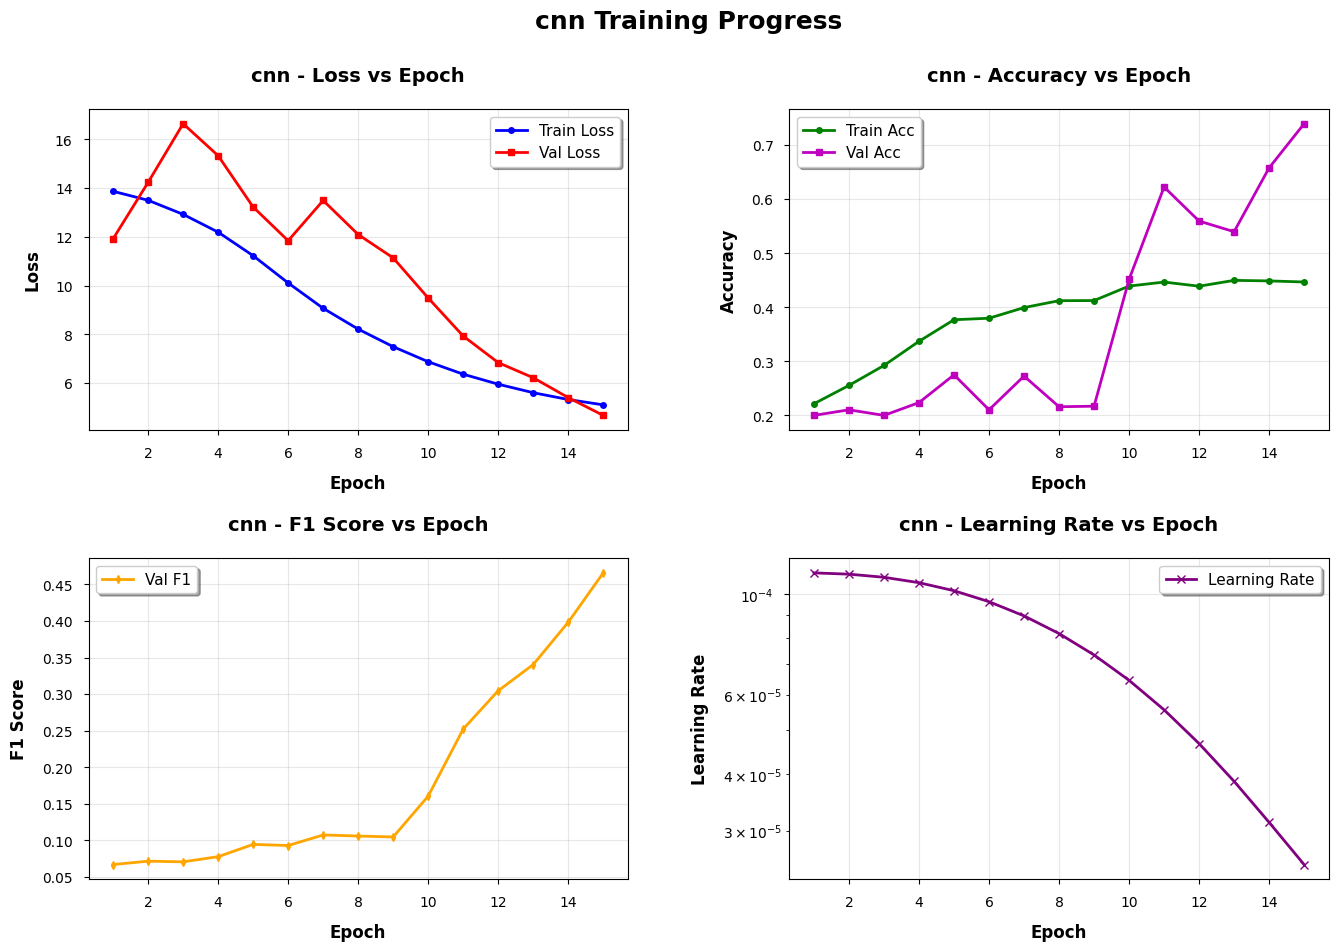

Individual training history saved: ./fish_classification_results/visualizations/cnn_individual_training_history.png
Training history plot generated for cnn


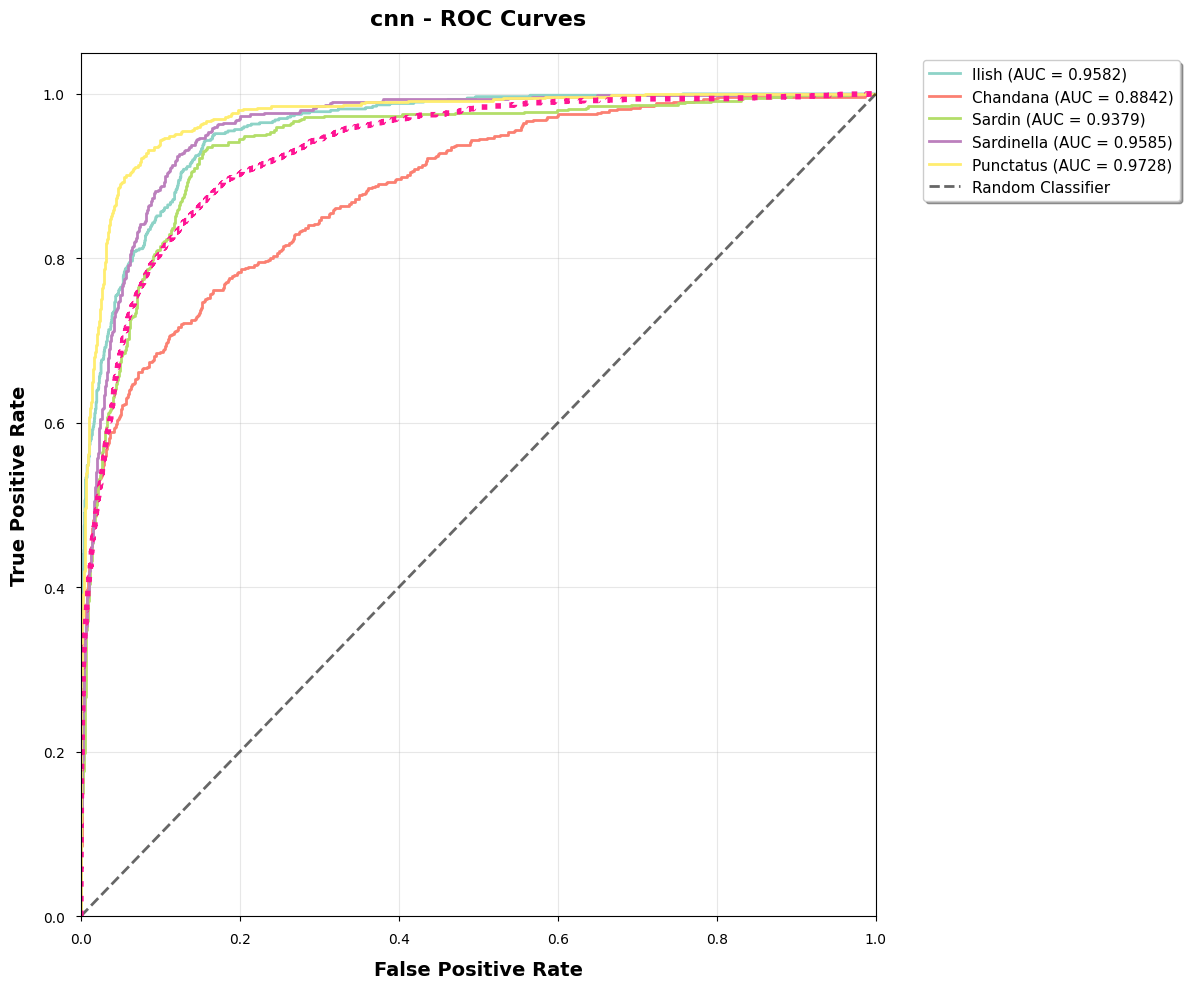

Enhanced ROC curves saved: ./fish_classification_results/visualizations/cnn_enhanced_roc_curves.png
ROC curves plot generated for cnn


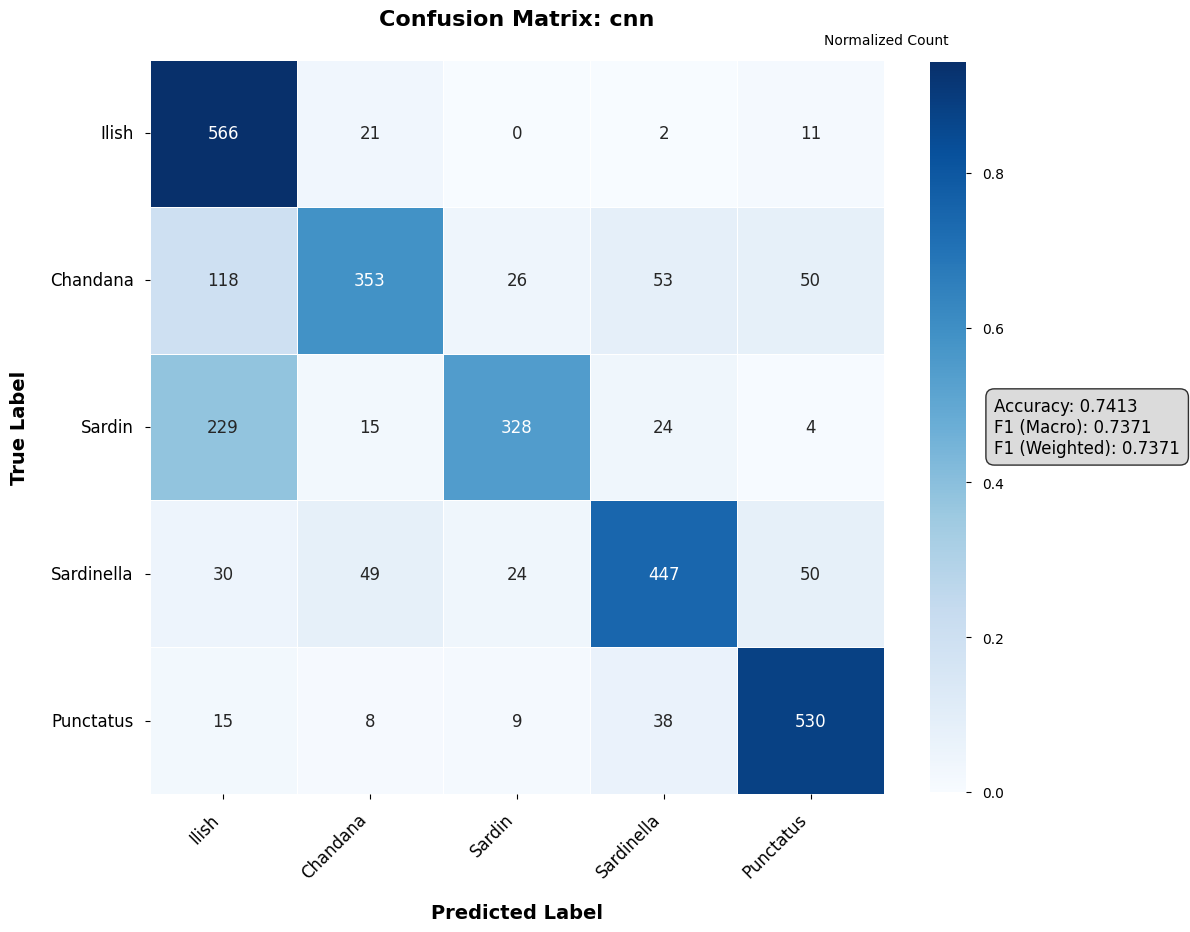

Enhanced confusion matrix saved: ./fish_classification_results/visualizations/cnn_enhanced_confusion_matrix.png
Confusion matrix plot generated for cnn
Misclassified images for cnn


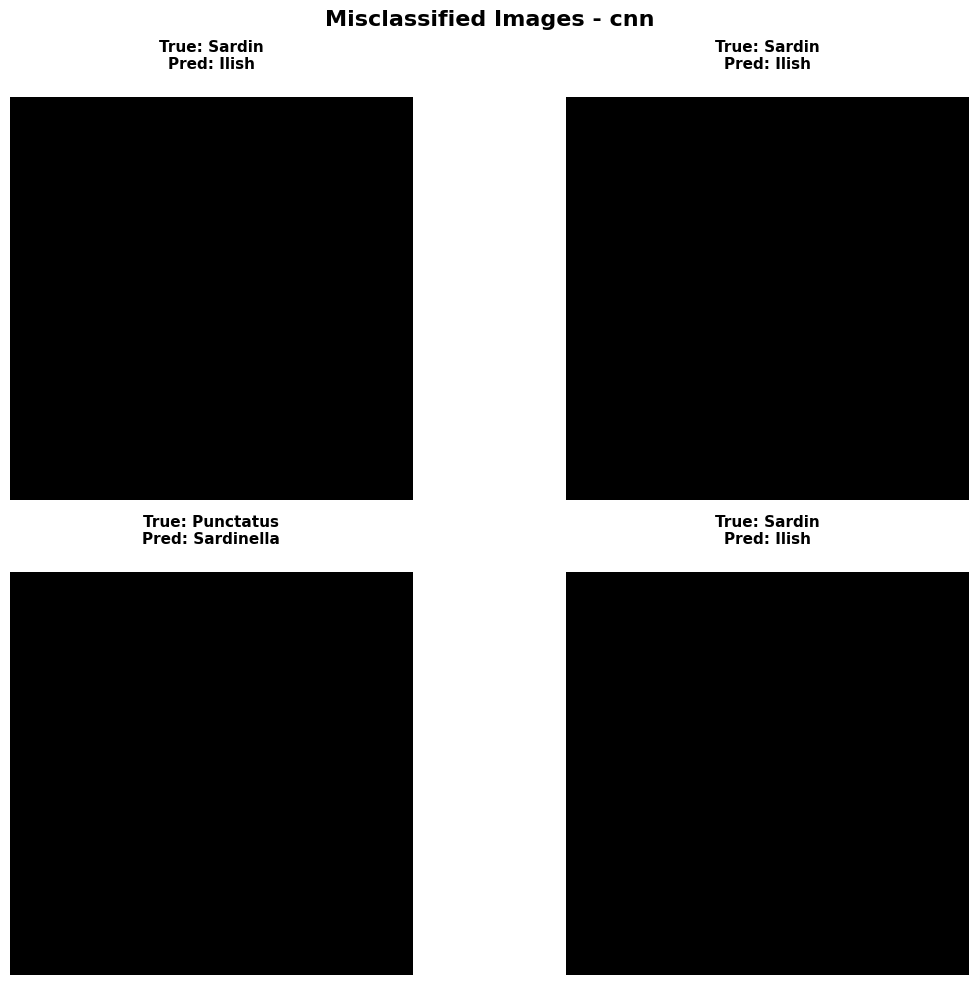

Saved misclassified images plot for cnn at ./fish_classification_results/visualizations/misclassified_cnn.png
Misclassified images plot generated for cnn
Generating XAI visualizations for cnn...


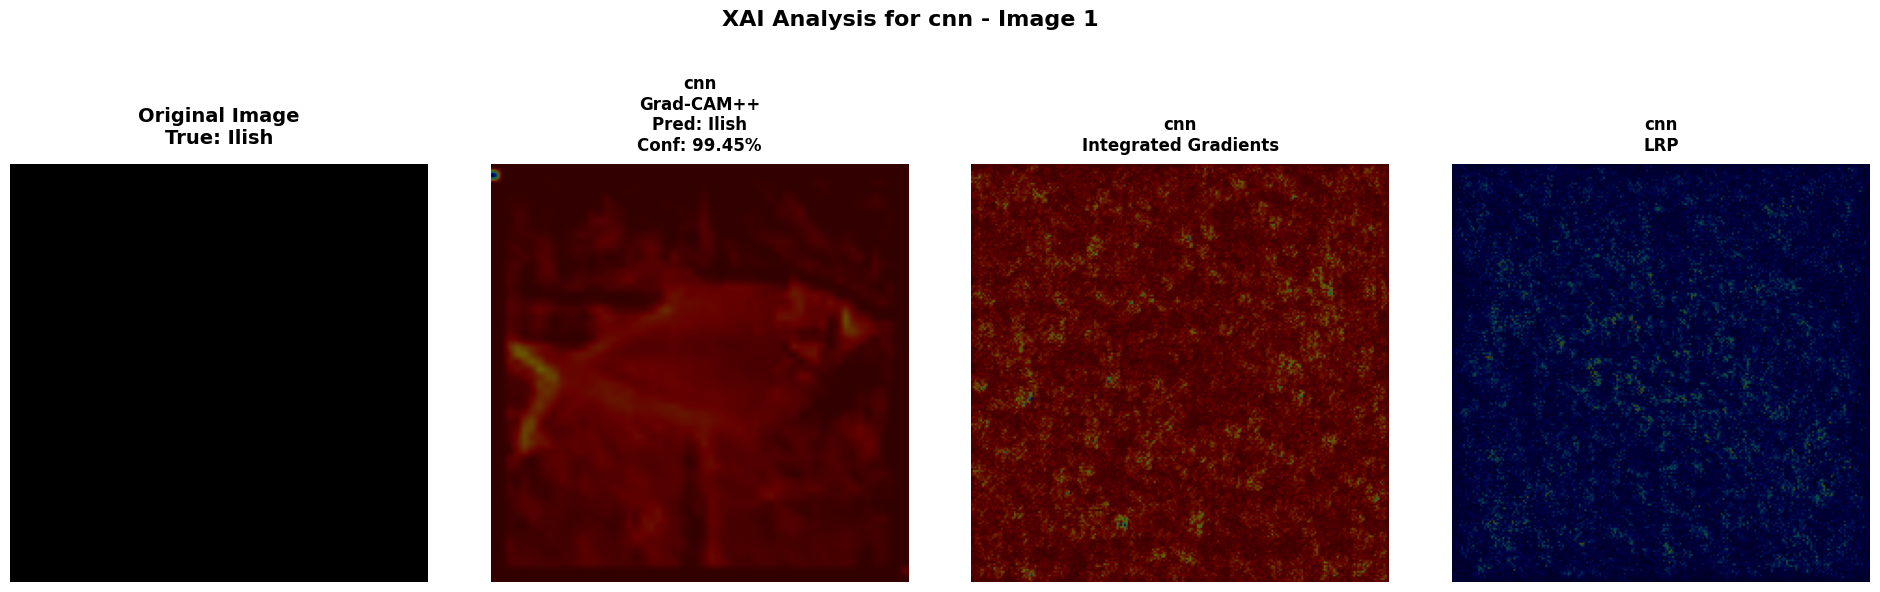

XAI visualization saved: ./fish_classification_results/visualizations/cnn_xai_image_1.png


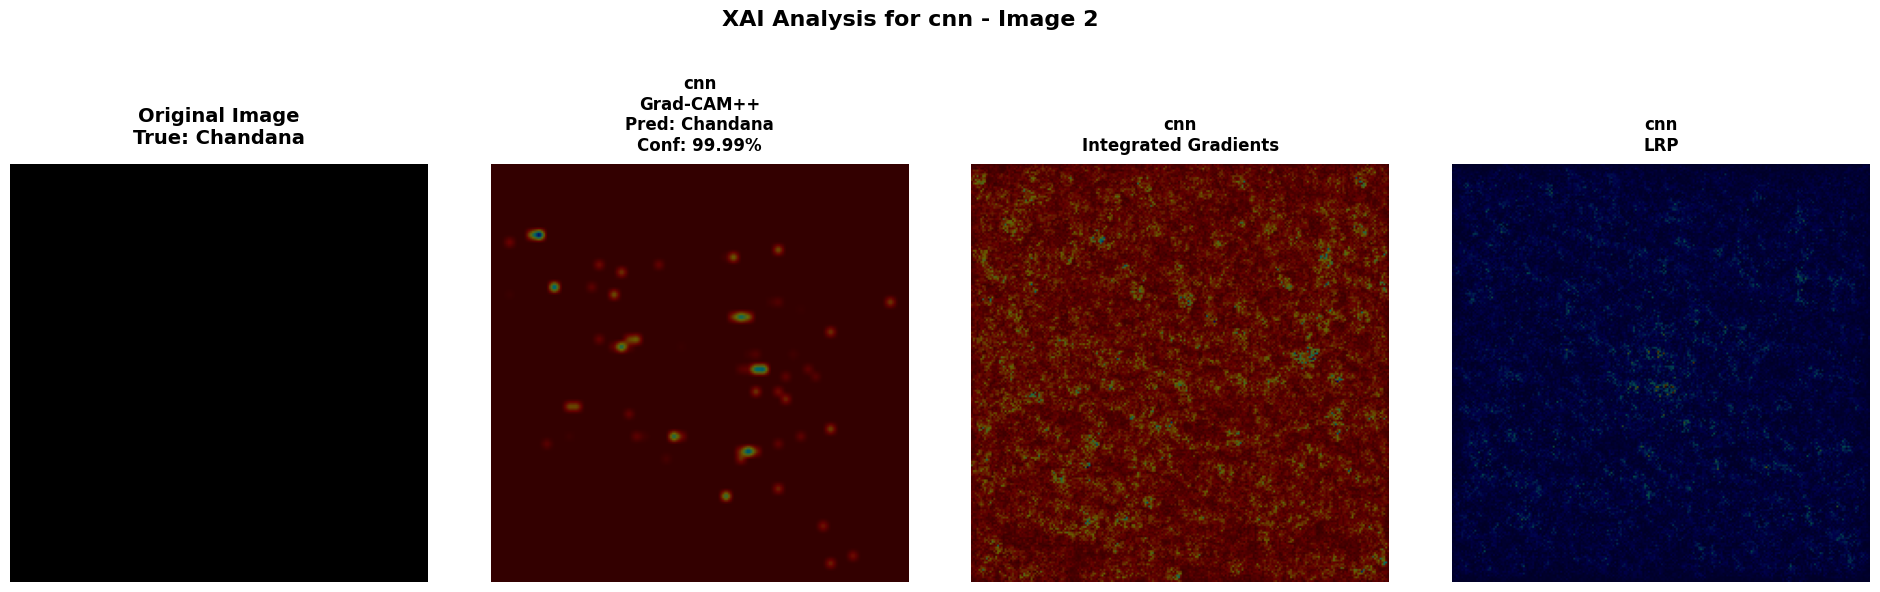

XAI visualization saved: ./fish_classification_results/visualizations/cnn_xai_image_2.png


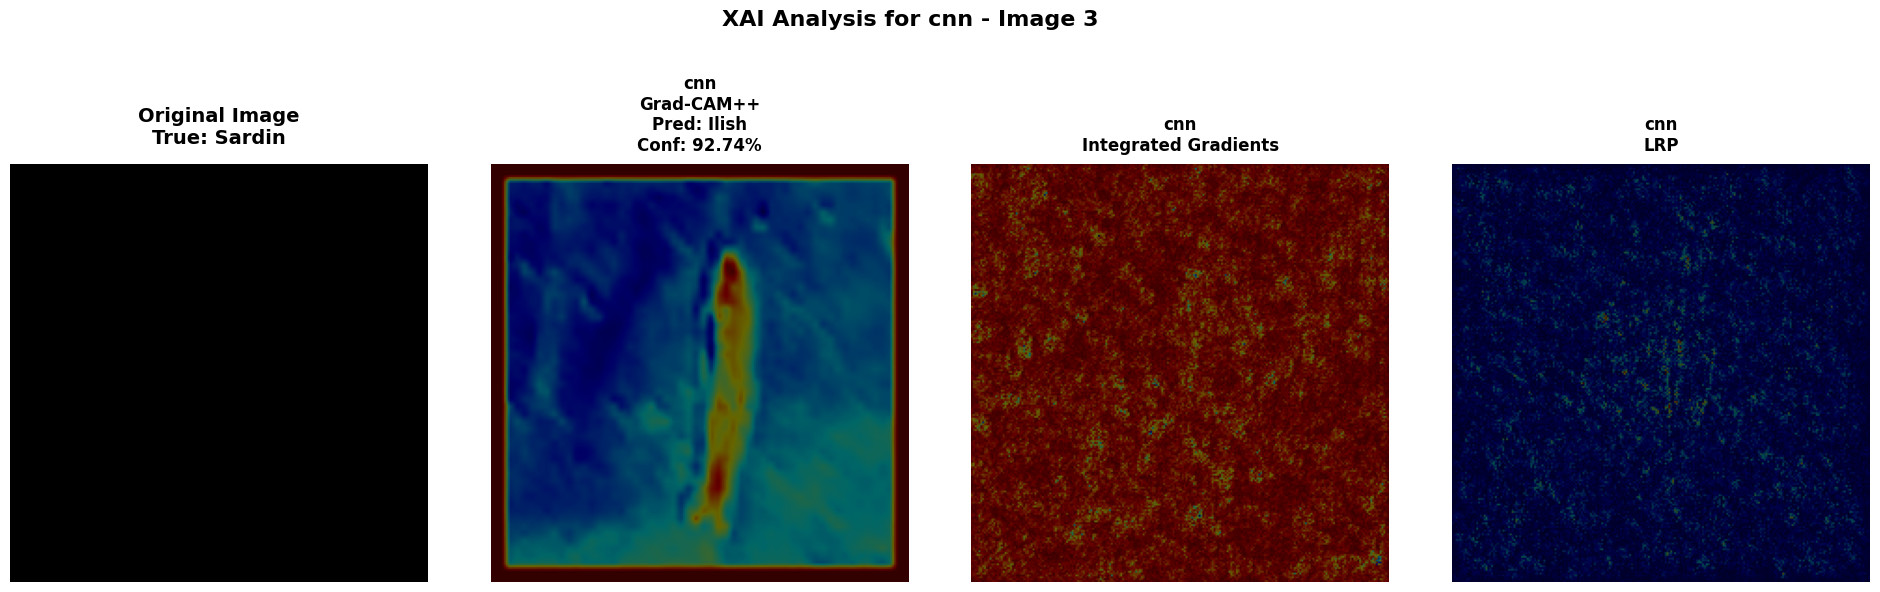

XAI visualization saved: ./fish_classification_results/visualizations/cnn_xai_image_3.png


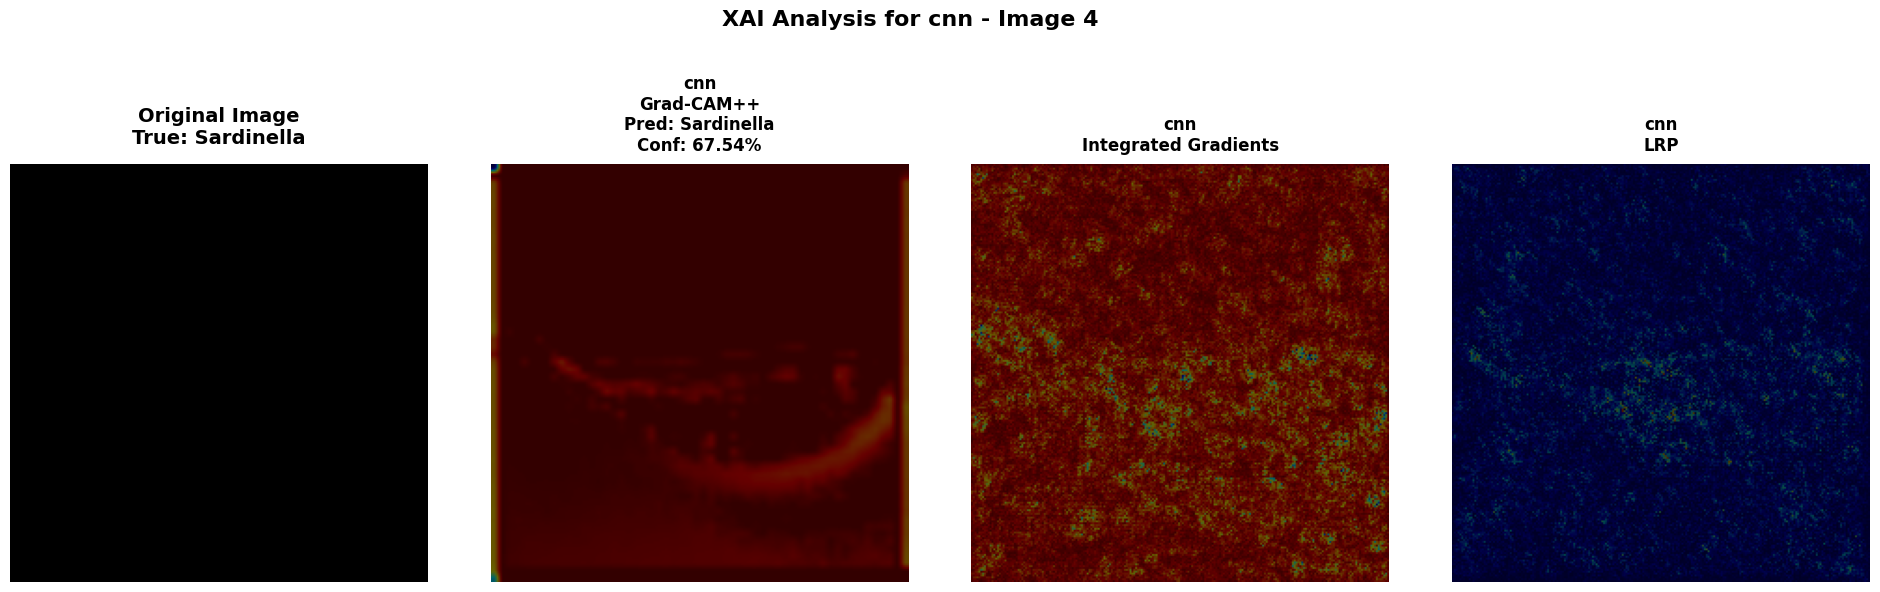

XAI visualization saved: ./fish_classification_results/visualizations/cnn_xai_image_4.png


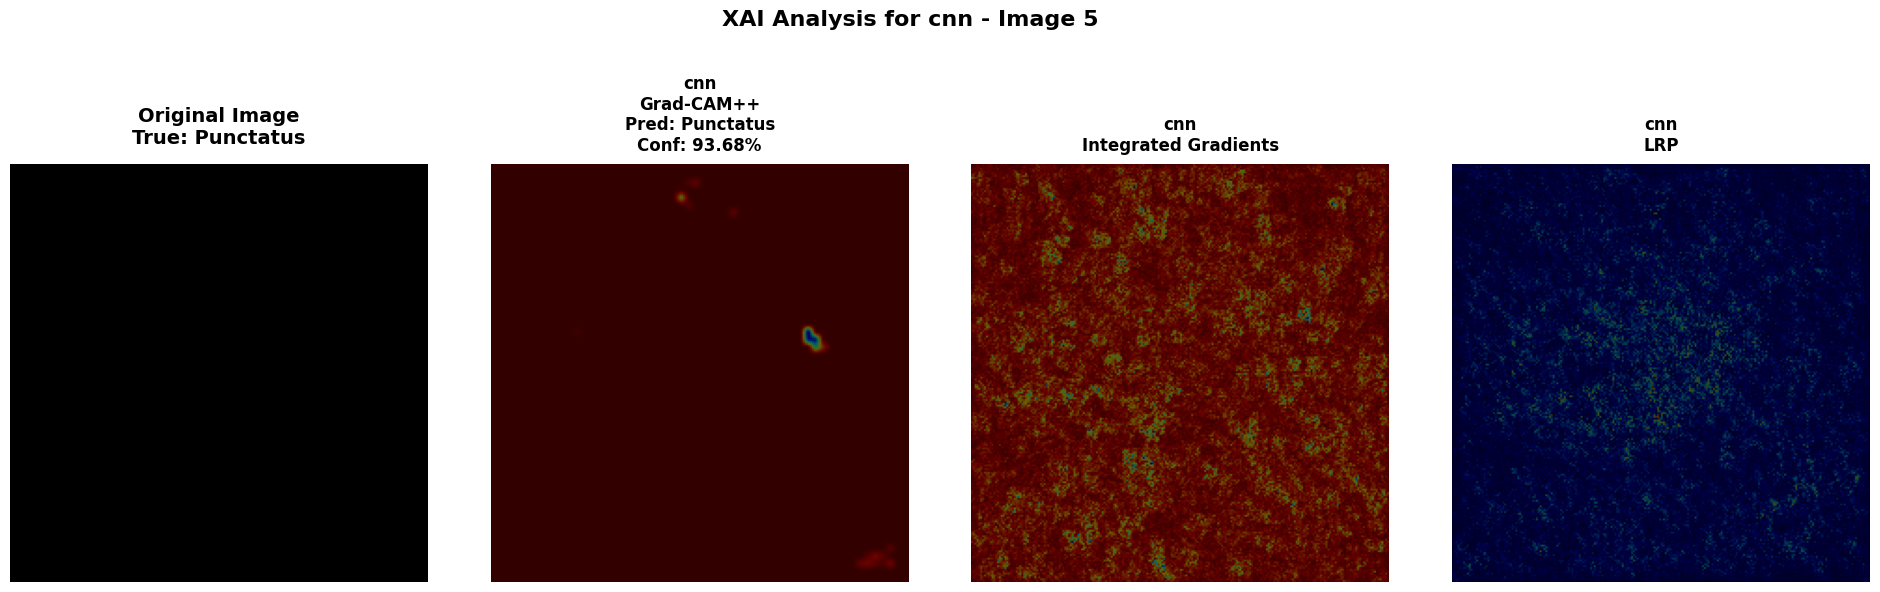

XAI visualization saved: ./fish_classification_results/visualizations/cnn_xai_image_5.png
XAI visualization generated for cnn


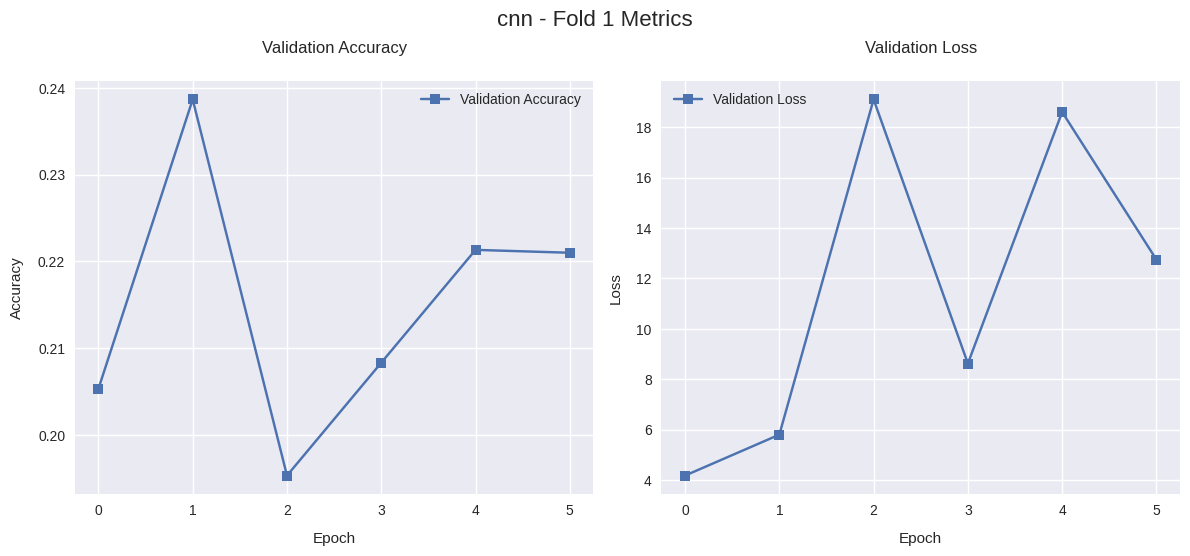

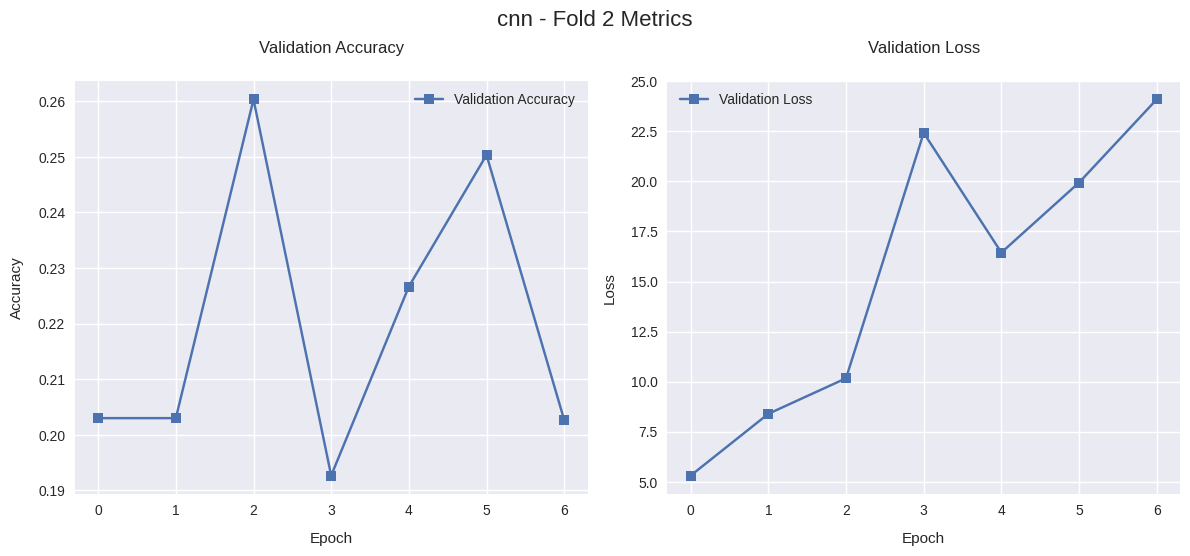

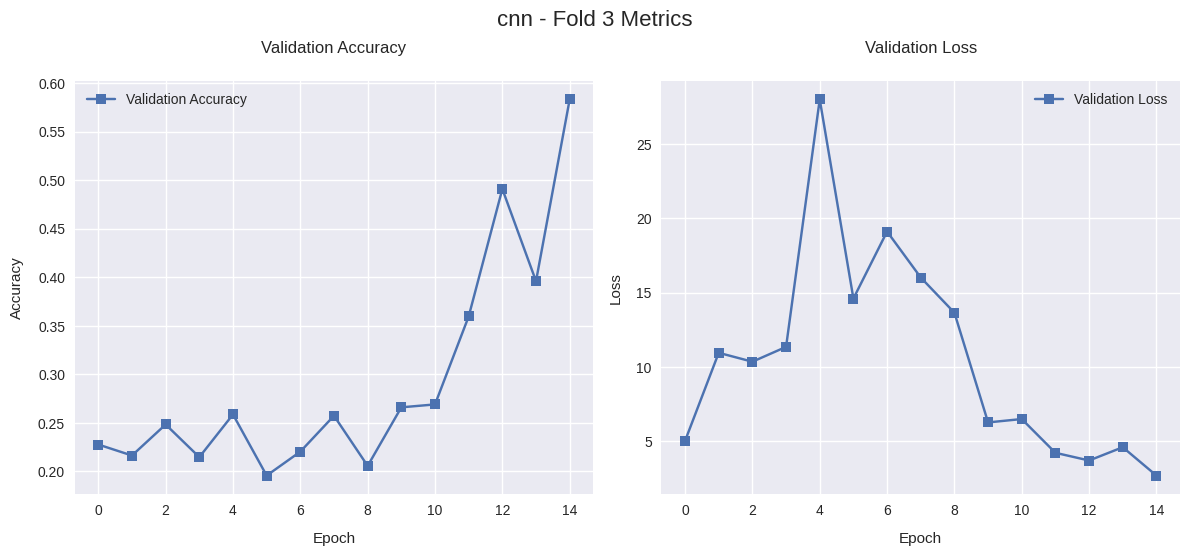

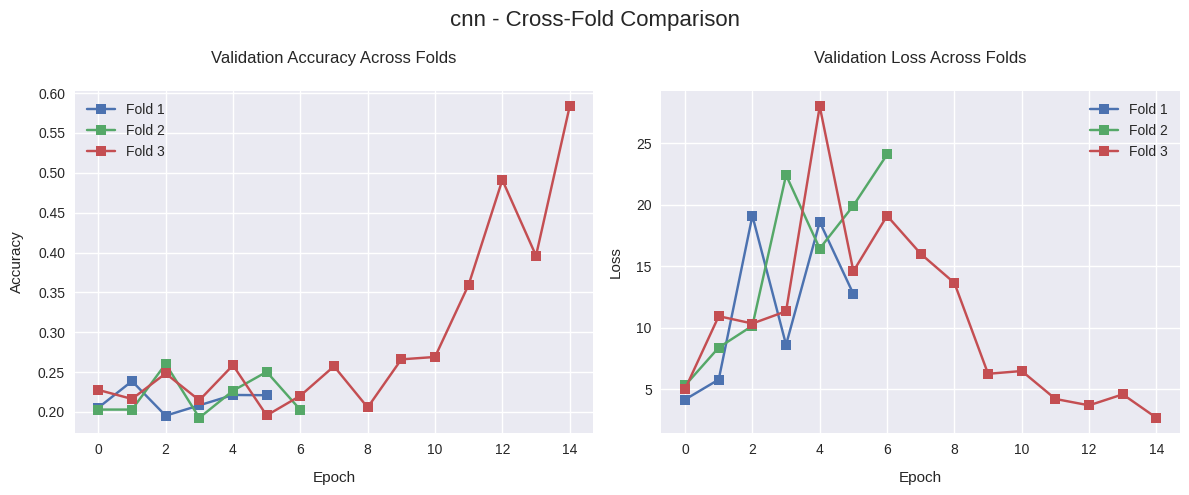

K-fold results plot generated for cnn
All visualizations completed for cnn

8. MEMORY CLEANUP FOR cnn
--------------------------------------------------
GPU Memory after cleanup: 8.27GB allocated
GPU Memory cached: 8.52GB cached
Memory cleanup completed for cnn

✓ cnn PROCESSING COMPLETED!


PROCESSING MODEL: resnet50

1. CREATING INITIAL DATA LOADERS FOR resnet50
--------------------------------------------------
Train loader: 9000 samples
Val loader: 3000 samples
Test loader: 3000 samples

2. HYPERPARAMETER OPTIMIZATION FOR resnet50
--------------------------------------------------
Train loader size: 9000 samples, 94 batches
Val loader size: 3000 samples, 32 batches
Optimizing hyperparameters for resnet50...

Trial 1/10 parameters for resnet50:
  lr: 0.0000
  weight_decay: 0.0000
  dropout: 0.1578
  hidden_dim_multiplier: 0.5922
  augmentation_strength: heavy
  batch_size: 96
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1644
Downloading: "https://download.py

100%|██████████| 97.8M/97.8M [00:00<00:00, 198MB/s]



Trial 1 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.402109, VL: 1.160742, TA: 0.4668, VA: 0.6683, VF1: 0.6523




Trial 1 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 1.183274, VL: 0.970231, TA: 0.6286, VA: 0.7853, VF1: 0.7839




Trial 1 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 1.102074, VL: 0.907906, TA: 0.6907, VA: 0.8220, VF1: 0.8212




Trial 1 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 1.040265, VL: 0.865440, TA: 0.7288, VA: 0.8497, VF1: 0.8489




Trial 1 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 1.012425, VL: 0.842463, TA: 0.7530, VA: 0.8647, VF1: 0.8641




Trial 1 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.989900, VL: 0.828217, TA: 0.7713, VA: 0.8783, VF1: 0.8777




Trial 1 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.958566, VL: 0.814348, TA: 0.7876, VA: 0.8863, VF1: 0.8855




Trial 1 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.958281, VL: 0.814928, TA: 0.7909, VA: 0.8813, VF1: 0.8802




Trial 1 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.948940, VL: 0.802462, TA: 0.7959, VA: 0.8917, VF1: 0.8910




Trial 1 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.948961, VL: 0.811100, TA: 0.7914, VA: 0.8867, VF1: 0.8857


This is the First Trial. So No Scope for Improvement Judgement.

Trial 2/10 parameters for resnet50:
  lr: 0.0000
  weight_decay: 0.0000
  dropout: 0.2386
  hidden_dim_multiplier: 0.2802
  augmentation_strength: light
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1738



Trial 2 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.407254, VL: 1.067365, TA: 0.4651, VA: 0.7413, VF1: 0.7357




Trial 2 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 1.190120, VL: 0.934468, TA: 0.6250, VA: 0.8210, VF1: 0.8147




Trial 2 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 1.080000, VL: 0.857377, TA: 0.7104, VA: 0.8723, VF1: 0.8705




Trial 2 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 1.013778, VL: 0.807709, TA: 0.7607, VA: 0.9073, VF1: 0.9069




Trial 2 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.974311, VL: 0.784627, TA: 0.7898, VA: 0.9210, VF1: 0.9206




Trial 2 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.956788, VL: 0.754469, TA: 0.7960, VA: 0.9380, VF1: 0.9379




Trial 2 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.930306, VL: 0.758961, TA: 0.8197, VA: 0.9393, VF1: 0.9394




Trial 2 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.928097, VL: 0.758034, TA: 0.8182, VA: 0.9400, VF1: 0.9401




Trial 2 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.908266, VL: 0.750612, TA: 0.8323, VA: 0.9467, VF1: 0.9468




Trial 2 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.909017, VL: 0.746149, TA: 0.8318, VA: 0.9497, VF1: 0.9498


New best result found for Trial 2
Validation Accuracy: 0.9497
Validation F1 Score: 0.9498

Trial 2 holds best result up to this:
  Validation Accuracy: 0.9497
  Validation F1 Score: 0.9498

Trial 3/10 parameters for resnet50:
  lr: 0.0001
  weight_decay: 0.0003
  dropout: 0.4223
  hidden_dim_multiplier: 0.7956
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1674



Trial 3 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.292827, VL: 0.949690, TA: 0.5581, VA: 0.7910, VF1: 0.7933




Trial 3 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 1.060452, VL: 0.815173, TA: 0.7298, VA: 0.9070, VF1: 0.9063




Trial 3 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 0.943957, VL: 0.744299, TA: 0.8094, VA: 0.9323, VF1: 0.9322




Trial 3 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 0.863368, VL: 0.682782, TA: 0.8536, VA: 0.9640, VF1: 0.9640




Trial 3 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.826527, VL: 0.696071, TA: 0.8734, VA: 0.9500, VF1: 0.9500




Trial 3 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.797138, VL: 0.661586, TA: 0.8901, VA: 0.9697, VF1: 0.9698




Trial 3 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.767326, VL: 0.648775, TA: 0.9053, VA: 0.9690, VF1: 0.9690




Trial 3 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.757569, VL: 0.653740, TA: 0.9078, VA: 0.9703, VF1: 0.9703




Trial 3 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.742606, VL: 0.646935, TA: 0.9207, VA: 0.9740, VF1: 0.9740




Trial 3 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.740886, VL: 0.643239, TA: 0.9210, VA: 0.9777, VF1: 0.9777


New best result found for Trial 3
Validation Accuracy: 0.9777
Validation F1 Score: 0.9777

Trial 3 holds best result up to this:
  Validation Accuracy: 0.9777
  Validation F1 Score: 0.9777

Trial 4/10 parameters for resnet50:
  lr: 0.0004
  weight_decay: 0.0000
  dropout: 0.2792
  hidden_dim_multiplier: 0.5466
  augmentation_strength: heavy
  batch_size: 96
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1252



Trial 4 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.115574, VL: 0.796025, TA: 0.6517, VA: 0.8487, VF1: 0.8502




Trial 4 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 0.835104, VL: 0.726654, TA: 0.8179, VA: 0.8843, VF1: 0.8824




Trial 4 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 0.741120, VL: 0.600152, TA: 0.8639, VA: 0.9433, VF1: 0.9435




Trial 4 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 0.677232, VL: 0.685693, TA: 0.9012, VA: 0.8827, VF1: 0.8782




Trial 4 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.642056, VL: 0.550319, TA: 0.9193, VA: 0.9647, VF1: 0.9647




Trial 4 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.614972, VL: 0.510050, TA: 0.9290, VA: 0.9840, VF1: 0.9840




Trial 4 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.596291, VL: 0.525839, TA: 0.9374, VA: 0.9800, VF1: 0.9801




Trial 4 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.591801, VL: 0.521267, TA: 0.9374, VA: 0.9763, VF1: 0.9763




Trial 4 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.564520, VL: 0.518557, TA: 0.9539, VA: 0.9790, VF1: 0.9790




Trial 4 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.558303, VL: 0.535651, TA: 0.9573, VA: 0.9640, VF1: 0.9638


Trial 4 did not improved the accuracy.

Trial 3 holds best result up to this:
  Validation Accuracy: 0.9777
  Validation F1 Score: 0.9777

Trial 5/10 parameters for resnet50:
  lr: 0.0001
  weight_decay: 0.0004
  dropout: 0.1403
  hidden_dim_multiplier: 0.8885
  augmentation_strength: light
  batch_size: 96
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1069



Trial 5 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.166965, VL: 0.797595, TA: 0.5984, VA: 0.8170, VF1: 0.8164




Trial 5 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 0.904880, VL: 0.641898, TA: 0.7561, VA: 0.9153, VF1: 0.9152




Trial 5 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 0.788237, VL: 0.661149, TA: 0.8251, VA: 0.9033, VF1: 0.9036




Trial 5 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 0.724917, VL: 0.599447, TA: 0.8562, VA: 0.9173, VF1: 0.9180




Trial 5 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.695725, VL: 0.559857, TA: 0.8731, VA: 0.9657, VF1: 0.9657




Trial 5 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.665724, VL: 0.565855, TA: 0.8851, VA: 0.9513, VF1: 0.9514




Trial 5 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.631942, VL: 0.560737, TA: 0.9019, VA: 0.9427, VF1: 0.9426




Trial 5 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.632245, VL: 0.536759, TA: 0.9029, VA: 0.9543, VF1: 0.9541




Trial 5 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.614626, VL: 0.536643, TA: 0.9116, VA: 0.9593, VF1: 0.9593




Trial 5 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.604268, VL: 0.547527, TA: 0.9193, VA: 0.9500, VF1: 0.9497


Trial 5 did not improved the accuracy.

Trial 3 holds best result up to this:
  Validation Accuracy: 0.9777
  Validation F1 Score: 0.9777

Trial 6/10 parameters for resnet50:
  lr: 0.0002
  weight_decay: 0.0000
  dropout: 0.4353
  hidden_dim_multiplier: 0.6765
  augmentation_strength: medium
  batch_size: 96
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1827



Trial 6 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.276799, VL: 0.933060, TA: 0.5973, VA: 0.8377, VF1: 0.8356




Trial 6 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 1.026223, VL: 0.814034, TA: 0.7746, VA: 0.9167, VF1: 0.9172




Trial 6 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 0.904992, VL: 0.765951, TA: 0.8468, VA: 0.9250, VF1: 0.9254




Trial 6 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 0.848500, VL: 0.694509, TA: 0.8768, VA: 0.9703, VF1: 0.9704




Trial 6 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.812029, VL: 0.694992, TA: 0.8966, VA: 0.9673, VF1: 0.9675




Trial 6 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.785365, VL: 0.691402, TA: 0.9138, VA: 0.9653, VF1: 0.9656




Trial 6 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.769386, VL: 0.678198, TA: 0.9210, VA: 0.9740, VF1: 0.9740




Trial 6 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.759082, VL: 0.672041, TA: 0.9270, VA: 0.9763, VF1: 0.9764




Trial 6 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.742514, VL: 0.660970, TA: 0.9379, VA: 0.9810, VF1: 0.9810




Trial 6 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.738171, VL: 0.675099, TA: 0.9414, VA: 0.9693, VF1: 0.9694


Trial 6 did not improved the accuracy.

Trial 3 holds best result up to this:
  Validation Accuracy: 0.9777
  Validation F1 Score: 0.9777

Trial 7/10 parameters for resnet50:
  lr: 0.0000
  weight_decay: 0.0000
  dropout: 0.2796
  hidden_dim_multiplier: 0.9135
  augmentation_strength: medium
  batch_size: 128
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1332



Trial 7 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.390406, VL: 1.365704, TA: 0.4576, VA: 0.4620, VF1: 0.3947




Trial 7 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 1.168304, VL: 0.879711, TA: 0.6169, VA: 0.8097, VF1: 0.8061




Trial 7 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 1.056949, VL: 0.791639, TA: 0.6832, VA: 0.8580, VF1: 0.8561




Trial 7 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 0.993138, VL: 0.773794, TA: 0.7264, VA: 0.8723, VF1: 0.8714




Trial 7 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.947606, VL: 0.725448, TA: 0.7594, VA: 0.9030, VF1: 0.9030




Trial 7 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.918113, VL: 0.719968, TA: 0.7759, VA: 0.9053, VF1: 0.9051




Trial 7 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.894775, VL: 0.713246, TA: 0.7922, VA: 0.9100, VF1: 0.9097




Trial 7 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.893046, VL: 0.712800, TA: 0.7954, VA: 0.9090, VF1: 0.9082




Trial 7 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.881062, VL: 0.700150, TA: 0.8000, VA: 0.9153, VF1: 0.9148




Trial 7 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.880868, VL: 0.701815, TA: 0.7952, VA: 0.9163, VF1: 0.9162


Trial 7 did not improved the accuracy.

Trial 3 holds best result up to this:
  Validation Accuracy: 0.9777
  Validation F1 Score: 0.9777

Trial 8/10 parameters for resnet50:
  lr: 0.0001
  weight_decay: 0.0005
  dropout: 0.2459
  hidden_dim_multiplier: 0.6930
  augmentation_strength: light
  batch_size: 96
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1521



Trial 8 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.306022, VL: 0.975761, TA: 0.5331, VA: 0.7643, VF1: 0.7611




Trial 8 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 1.072480, VL: 0.791199, TA: 0.6969, VA: 0.8923, VF1: 0.8918




Trial 8 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 0.959139, VL: 0.763786, TA: 0.7711, VA: 0.9093, VF1: 0.9099




Trial 8 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 0.889945, VL: 0.717008, TA: 0.8178, VA: 0.9357, VF1: 0.9358




Trial 8 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.855778, VL: 0.696439, TA: 0.8407, VA: 0.9383, VF1: 0.9382




Trial 8 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.829311, VL: 0.698525, TA: 0.8539, VA: 0.9367, VF1: 0.9369




Trial 8 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.810698, VL: 0.691506, TA: 0.8669, VA: 0.9353, VF1: 0.9349




Trial 8 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.798443, VL: 0.689160, TA: 0.8688, VA: 0.9377, VF1: 0.9376




Trial 8 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.785278, VL: 0.681162, TA: 0.8787, VA: 0.9417, VF1: 0.9416




Trial 8 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.791477, VL: 0.679066, TA: 0.8736, VA: 0.9417, VF1: 0.9415


Trial 8 did not improved the accuracy.

Trial 3 holds best result up to this:
  Validation Accuracy: 0.9777
  Validation F1 Score: 0.9777

Trial 9/10 parameters for resnet50:
  lr: 0.0000
  weight_decay: 0.0000
  dropout: 0.2622
  hidden_dim_multiplier: 0.6243
  augmentation_strength: heavy
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1005



Trial 9 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.318798, VL: 0.892387, TA: 0.4911, VA: 0.7760, VF1: 0.7714




Trial 9 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 1.042872, VL: 0.731579, TA: 0.6701, VA: 0.8480, VF1: 0.8458




Trial 9 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 0.925317, VL: 0.692624, TA: 0.7351, VA: 0.8687, VF1: 0.8686




Trial 9 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 0.857365, VL: 0.612553, TA: 0.7778, VA: 0.9147, VF1: 0.9146




Trial 9 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.799090, VL: 0.596111, TA: 0.8082, VA: 0.9203, VF1: 0.9201




Trial 9 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.772068, VL: 0.569492, TA: 0.8256, VA: 0.9337, VF1: 0.9336




Trial 9 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.745009, VL: 0.572808, TA: 0.8420, VA: 0.9317, VF1: 0.9314




Trial 9 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.756579, VL: 0.563056, TA: 0.8328, VA: 0.9403, VF1: 0.9401




Trial 9 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.740390, VL: 0.546451, TA: 0.8434, VA: 0.9487, VF1: 0.9486




Trial 9 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.739927, VL: 0.547683, TA: 0.8416, VA: 0.9457, VF1: 0.9456


Trial 9 did not improved the accuracy.

Trial 3 holds best result up to this:
  Validation Accuracy: 0.9777
  Validation F1 Score: 0.9777

Trial 10/10 parameters for resnet50:
  lr: 0.0000
  weight_decay: 0.0000
  dropout: 0.1146
  hidden_dim_multiplier: 0.3903
  augmentation_strength: light
  batch_size: 32
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1329



Trial 10 Optuna Epoch 1 completed for Model: resnet50
Optuna Epoch 1/10 Summary: TL: 1.337336, VL: 1.008129, TA: 0.4899, VA: 0.7123, VF1: 0.7099




Trial 10 Optuna Epoch 2 completed for Model: resnet50
Optuna Epoch 2/10 Summary: TL: 1.107471, VL: 0.827588, TA: 0.6518, VA: 0.8350, VF1: 0.8330




Trial 10 Optuna Epoch 3 completed for Model: resnet50
Optuna Epoch 3/10 Summary: TL: 1.008930, VL: 0.748447, TA: 0.7128, VA: 0.8830, VF1: 0.8824




Trial 10 Optuna Epoch 4 completed for Model: resnet50
Optuna Epoch 4/10 Summary: TL: 0.938463, VL: 0.719109, TA: 0.7628, VA: 0.9073, VF1: 0.9075




Trial 10 Optuna Epoch 5 completed for Model: resnet50
Optuna Epoch 5/10 Summary: TL: 0.898152, VL: 0.693151, TA: 0.7876, VA: 0.9190, VF1: 0.9189




Trial 10 Optuna Epoch 6 completed for Model: resnet50
Optuna Epoch 6/10 Summary: TL: 0.866396, VL: 0.675662, TA: 0.8096, VA: 0.9313, VF1: 0.9313




Trial 10 Optuna Epoch 7 completed for Model: resnet50
Optuna Epoch 7/10 Summary: TL: 0.846470, VL: 0.673032, TA: 0.8222, VA: 0.9327, VF1: 0.9328




Trial 10 Optuna Epoch 8 completed for Model: resnet50
Optuna Epoch 8/10 Summary: TL: 0.848600, VL: 0.682514, TA: 0.8209, VA: 0.9180, VF1: 0.9179




Trial 10 Optuna Epoch 9 completed for Model: resnet50
Optuna Epoch 9/10 Summary: TL: 0.842248, VL: 0.656382, TA: 0.8219, VA: 0.9430, VF1: 0.9432




Trial 10 Optuna Epoch 10 completed for Model: resnet50
Optuna Epoch 10/10 Summary: TL: 0.841539, VL: 0.661720, TA: 0.8241, VA: 0.9340, VF1: 0.9341


Trial 10 did not improved the accuracy.

Trial 3 holds best result up to this:
  Validation Accuracy: 0.9777
  Validation F1 Score: 0.9777

RESNET50 BEST PARAMETERS:
  lr: 0.0001
  weight_decay: 0.0003
  dropout: 0.4223
  hidden_dim_multiplier: 0.7956
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1674

3. RECREATING DATA LOADERS WITH OPTIMIZED PARAMETERS
--------------------------------------------------
Recreated - Train: 9000, Val: 3000, Test: 3000
Val data tuple: X=3000, Y=3000
Test data tuple: X=3000, Y=3000

4. MAIN MODEL TRAINING FOR resnet50
--------------------------------------------------
Training resnet50 with hyperparameters:
  lr: 0.0001
  weight_decay: 0.0003
  dropout: 0.4223
  hidden_dim_multiplier: 0.7956
  augmentation_strength: medium
  batch_size:

In [ ]:
# 1. IMPORTS AND INITIAL SETUP
# =============================================================================
# Purpose: Import all required libraries and set up warnings to suppress unnecessary messages.

!pip install pytorch-gradcam optuna captum  # Uncomment if running in a new environment
#!pip install --upgrade captum

from enum import auto

import subprocess
import threading
import time

from sklearn.preprocessing import label_binarize

# def monitor_resources():
#     while True:
print(subprocess.getoutput('nvidia-smi'))
print(subprocess.getoutput('free -h'))
time.sleep(30)  # Check every 30s

# monitor_thread = threading.Thread(target=monitor_resources, daemon=True)
# monitor_thread.start()

import gc
import random
import pynvml



import os
import sys
import warnings
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import cv2
from itertools import combinations
from tqdm import tqdm
import time
from datetime import datetime, timedelta

# Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.metrics import roc_curve, auc

# Machine Learning
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, f1_score,
                             accuracy_score, precision_score, recall_score)
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Augmentation
import albumentations as A
from albumentations.pytorch import ToTensorV2

from sklearn.preprocessing import label_binarize

import traceback
from tqdm import tqdm  # Import tqdm for reliable progress bar

# Hyperparameter optimization
try:
    import optuna
    OPTUNA_AVAILABLE = True
except ImportError:
    OPTUNA_AVAILABLE = False
    print("Warning: Optuna not available. Using default hyperparameters.")

# XAI dependencies
import torch.autograd as autograd

# from captum._utils.lrp_rules import EpsilonRule
# from captum.attr import EpsilonLRP
from captum.attr import LRP
import torch
import torch.nn as nn
import numpy as np
import cv2
import psutil
import pynvml

warnings.filterwarnings("ignore")

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, torch.Tensor):
            return obj.cpu().detach().numpy().tolist()  # Convert tensor to NumPy array, then to list
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)


# ---
# 2. CONFIGURATION
# =============================================================================
# Purpose: Define configuration settings and initialize the environment.

class Config:
    """Configuration settings"""
    # Paths - UPDATE THESE TO YOUR ACTUAL PATHS
    DATA_FILE = '/content/drive/MyDrive/Hilsha/X_data.npy'
    LABELS_FILE = '/content/drive/MyDrive/Hilsha/Y_labels.npy'
    OUTPUT_DIR = './fish_classification_results'

    # Dataset parameters
    NUM_CLASSES = 5
    CLASS_LABELS = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']
    INPUT_SIZE = 224

    # Training parameters
    BATCH_SIZE = 32 #64
    EPOCHS = 15
    DATALOADER_NUM_WORKERS = 4
    PIN_MEMORY = True
    USE_MIXED_PRECISION = True #True
    COMPILE_MODEL = True
    PATIENCE = 4 #15
    LEARNING_RATE = 1e-5  #1e-4
    WEIGHT_DECAY = 1e-4

    # Hyperparameter tuning
    OPTUNA_TRIALS = 10
    OPTUNA_EPOCHS = 10

    # Models to train
    MODELS = ['cnn','resnet50','efficientnet_b0','mobilenet_v3_large','vgg16', 'densenet121']

    # Ensemble methods
    ENSEMBLE_METHODS = ['simple_average', 'weighted_average', 'confidence_based', 'learnable_weighted']

    # Device
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    SEED = 42




def get_available_cpu_memory():
    """Get available CPU memory in GB."""
    mem = psutil.virtual_memory()
    return mem.available / 1024**3  # Convert bytes to GB

def get_available_gpu_memory():
    """Get available GPU memory in GB."""
    pynvml.nvmlInit()
    handle = pynvml.nvmlDeviceGetHandleByIndex(0)
    mem_info = pynvml.nvmlDeviceGetMemoryInfo(handle)
    return mem_info.free / 1024**3  # Convert bytes to GB

def adjust_batch_size_and_workers(base_batch_size, base_num_workers):
    gpu_memory = get_available_gpu_memory()

    # Prioritize GPU memory for batch size
    if gpu_memory > 24:  # High-end GPU
        batch_size = base_batch_size * 4
        num_workers = min(8, psutil.cpu_count())  # Use more workers for high GPU memory
    elif gpu_memory > 12:  # Mid-range GPU
        batch_size = base_batch_size * 2
        num_workers = min(4, psutil.cpu_count())  # Moderate workers
    elif gpu_memory > 6:  # Lower-end GPU
        batch_size = base_batch_size
        num_workers = min(2, psutil.cpu_count())  # Minimal workers
    else:  # Very low GPU memory
        batch_size = max(8, base_batch_size // 2)
        num_workers = 0  # Disable workers to minimize CPU load

    print(f"Adjusted batch_size: {batch_size}, num_workers: {num_workers} "
          f"(GPU memory: {gpu_memory:.2f} GB)")
    return batch_size, num_workers


def setup_environment():

    """Setup random seeds, directories, and dynamically adjust batch size and workers"""
    import random
    import os

    os.environ['PYTHONHASHSEED'] = str(Config.SEED)  # For hash seed reproducibility
    random.seed(Config.SEED)
    np.random.seed(Config.SEED)
    torch.manual_seed(Config.SEED)
    torch.cuda.manual_seed_all(Config.SEED)  # For multi-GPU if applicable
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False



    torch.manual_seed(Config.SEED)
    np.random.seed(Config.SEED)

    directories = [
        Config.OUTPUT_DIR,
        f"{Config.OUTPUT_DIR}/models",
        f"{Config.OUTPUT_DIR}/visualizations",
        f"{Config.OUTPUT_DIR}/reports",
        f"{Config.OUTPUT_DIR}/xai_visualizations"
    ]

    for directory in directories:
        Path(directory).mkdir(parents=True, exist_ok=True)

    # Dynamically adjust batch size and workers
    Config.BATCH_SIZE, Config.DATALOADER_NUM_WORKERS = adjust_batch_size_and_workers(
        Config.BATCH_SIZE, Config.DATALOADER_NUM_WORKERS
    )

    print(f"Using device: {Config.DEVICE}")
    print(f"PyTorch version: {torch.__version__}")
    print(f"Dynamic BATCH_SIZE: {Config.BATCH_SIZE}, DATALOADER_NUM_WORKERS: {Config.DATALOADER_NUM_WORKERS}")
    print("-" * 70)


def worker_init_fn(worker_id):
    np.random.seed(Config.SEED)# + worker_id)
    random.seed(Config.SEED)# + worker_id)


# ---
# 3. TRAINING PROGRESS TRACKER
# =============================================================================
# Purpose: Track and display training progress with progress bars and epoch summaries.

class TrainingProgressTracker:
    """Track and display detailed training progress"""

    def __init__(self, model_name, total_epochs, total_batches_per_epoch):
        self.model_name = model_name
        self.total_epochs = total_epochs
        self.total_batches_per_epoch = total_batches_per_epoch
        self.start_time = time.time()
        self.epoch_start_time = None
        self.batch_times = []

    def start_epoch(self, epoch):
        """Start tracking an epoch"""
        self.current_epoch = epoch
        self.epoch_start_time = time.time()
        self.batch_times = []
        print(f"\n{'='*60}")
        print(f"Model: {self.model_name.upper()} | Epoch: {epoch+1}/{self.total_epochs}")
        print(f"{'='*60}")



    def update_batch(self, batch_idx, batch_loss, batch_acc, is_training=True,total_batches=None):
        """Update progress for current batch"""
        batch_time = time.time()
        self.batch_times.append(batch_time)

        # Calculate timing estimates
        if len(self.batch_times) > 1:
            avg_batch_time = np.mean(np.diff(self.batch_times[-10:]))
        else:
            avg_batch_time = 1.0

        total_batches = total_batches if total_batches is not None else self.total_batches_per_epoch
        remaining_batches = total_batches - (batch_idx + 1)


        # remaining_batches = self.total_batches_per_epoch - (batch_idx + 1)
        eta_epoch = remaining_batches * avg_batch_time

        # Progress bar
        # progress_pct = (batch_idx + 1) / self.total_batches_per_epoch * 100
        progress_pct = (batch_idx + 1) / total_batches * 100
        bar_length = 30

        # filled_length = int(bar_length * (batch_idx + 1) // self.total_batches_per_epoch)
        filled_length = int(bar_length * (batch_idx + 1) // total_batches)
        bar = '█' * filled_length + '-' * (bar_length - filled_length)

        # Format time
        eta_str = str(timedelta(seconds=int(eta_epoch)))

        # Display progress
        mode = "TRAIN" if is_training else "VAL  "

        print(f"\r{mode} |{bar}| {progress_pct:5.1f}% | "
              f"Batch: {batch_idx+1:4d}/{total_batches} | "
              f"Loss: {batch_loss:.4f} | Acc: {batch_acc:.4f} | "
              f"ETA: {eta_str}", end='', flush=True)


    # def update_batch(self, batch_idx, batch_loss, batch_acc, is_training=True, total_batches=None):
    #     """Update progress for current batch without printing"""
    #     batch_time = time.time()
    #     self.batch_times.append(batch_time)

    #     # Store metrics for finish_epoch
    #     self.last_batch_loss = batch_loss
    #     self.last_batch_acc = batch_acc




    def finish_epoch(self, train_loss, train_acc, val_loss, val_acc, val_f1,
                    is_best=False, lr=None):
        """Finish epoch and display summary"""
        epoch_time = time.time() - self.epoch_start_time
        total_time = time.time() - self.start_time

        print(f"\n{'-'*60}")
        print(f"EPOCH SUMMARY:")
        print(f"  Train Loss: {train_loss:.6f} | Train Acc: {train_acc:.4f}")
        print(f"  Val Loss:   {val_loss:.6f} | Val Acc:   {val_acc:.4f}")
        print(f"  Val F1:     {val_f1:.4f} | Epoch Time: {epoch_time:.1f}s")
        if lr:
            print(f"  Learning Rate: {lr:.2e}")

        if is_best:
            print(f"  ★ NEW BEST MODEL! (F1: {val_f1:.4f})")

        print(f"  Total Time: {str(timedelta(seconds=int(total_time)))}")
        print(f"{'-'*60}")


# ---
# 4. DATA LOADING AND PREPROCESSING
# =============================================================================
# Purpose: Handle dataset creation, data loading, balancing with SMOTE, and data augmentation.


class FishDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = self._preprocess_images(images)
        self.labels = labels.astype(np.int64)
        self.transform = transform

    def _preprocess_images(self, images):
        """Preprocess images to ensure proper format and normalization"""
        if images.max() > 1.5:
            images = images.astype(np.float32) / 255.0
        if len(images.shape) == 4 and images.shape[1] == 3:
            images = np.transpose(images, (0, 2, 3, 1))
        return images.astype(np.float32)

    def __len__(self):
        """Return the total number of samples in the dataset"""
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image=image)['image']
        else:
            image = torch.from_numpy(image).permute(2, 0, 1)

        # Convert label to plain Python int to avoid CUDA tensor creation in workers
        if isinstance(label, np.ndarray):
            label = int(label.item())
        elif hasattr(label, 'item'):
            label = int(label.item())
        else:
            label = int(label)

        return image, label  # Plain Python int, not torch.tensor




class DataManager:
    @staticmethod
    def get_transforms(is_training=True, augmentation_strength='medium'):
        """Get data transforms with configurable augmentation strength"""
        if is_training:
            if augmentation_strength == 'light':
                return A.Compose([
                    A.Resize(Config.INPUT_SIZE, Config.INPUT_SIZE),
                    A.HorizontalFlip(p=0.3),
                    A.RandomRotate90(p=0.3),
                    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
                    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ToTensorV2()
                ])
            elif augmentation_strength == 'heavy':
                return A.Compose([
                    A.Resize(Config.INPUT_SIZE, Config.INPUT_SIZE),
                    A.HorizontalFlip(p=0.7),
                    A.VerticalFlip(p=0.5),
                    A.RandomRotate90(p=0.7),
                    # A.ShiftScaleRotate(shift_limit=0.3, scale_limit=0.3, rotate_limit=45, p=0.8),
                    # A.RandomBrightnessContrast(brightness_limit=0.4, contrast_limit=0.4, p=0.8),
                    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
                    A.RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=0.5),
                    A.HueSaturationValue(hue_shift_limit=30, sat_shift_limit=40, val_shift_limit=30, p=0.7),
                    A.GaussianBlur(blur_limit=(3, 9), p=0.5),
                    A.GaussNoise(var_limit=(10.0, 80.0), p=0.4),
                    A.CoarseDropout(max_holes=12, max_height=25, max_width=25, p=0.5),
                    A.ElasticTransform(p=0.3),
                    A.GridDistortion(p=0.3),
                    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

                    A.RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.3, p=0.3),
                    A.RandomRain(blur_value=3, p=0.2),
                    A.ColorJitter(hue=0.1, p=0.5),

                    ToTensorV2()
                ])
            else:  # medium
                return A.Compose([
                    A.Resize(Config.INPUT_SIZE, Config.INPUT_SIZE),
                    A.HorizontalFlip(p=0.5),
                    A.VerticalFlip(p=0.3),
                    A.RandomRotate90(p=0.5),
                    # A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.7),
                    # A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
                    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=10, p=0.1),
                    A.RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=0.5),
                    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.6),
                    A.GaussianBlur(blur_limit=(3, 7), p=0.4),
                    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
                    A.CoarseDropout(max_holes=8, max_height=20, max_width=20, p=0.4),
                    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ToTensorV2()
                ])
        else:
            return A.Compose([
                A.Resize(Config.INPUT_SIZE, Config.INPUT_SIZE),
                A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ToTensorV2()
            ])

    @staticmethod
    def load_and_balance_data():
        """Load data and apply SMOTE"""
        print("Loading and preprocessing data...")

        X = np.load(Config.DATA_FILE)
        Y = np.load(Config.LABELS_FILE)

        print(f"Original data shape: {X.shape}")
        print(f"Original class distribution: {np.bincount(Y)}")


        # print("Applying SMOTE for class balancing...")
        # X_flat = X.reshape(X.shape[0], -1)
        # smote = SMOTE(random_state=Config.SEED, k_neighbors=min(5, np.bincount(Y).min()-1))
        # X_balanced_flat, Y_balanced = smote.fit_resample(X_flat, Y)
        # X_balanced = X_balanced_flat.reshape(-1, *X.shape[1:])
        # print(f"Balanced data shape: {X_balanced.shape}")
        # print(f"Balanced class distribution: {np.bincount(Y_balanced)}")
        # return X_balanced, Y_balanced


        # # Remove SMOTE completely and use WeightedRandomSampler only
        # # Just return original data
        # print("Using WeightedRandomSampler for class balancing instead of SMOTE...")
        # return X, Y


        print("Applying SMOTE for class balancing...")
        # Apply SMOTE with reduced k_neighbors and combine with WeightedRandomSampler
        X_flat = X.reshape(X.shape[0], -1)
        smote = SMOTE(random_state=Config.SEED, k_neighbors=3, sampling_strategy='not majority')
        # smote = SMOTE(random_state=Config.SEED, k_neighbors=2, sampling_strategy= 'auto')
        X_balanced_flat, Y_balanced = smote.fit_resample(X_flat, Y)
        X_balanced = X_balanced_flat.reshape(-1, *X.shape[1:])
        # Ensure WeightedRandomSampler is still used in DataLoader
        print(f"Balanced data shape: {X_balanced.shape}")
        print(f"Balanced class distribution: {np.bincount(Y_balanced)}")
        return X_balanced, Y_balanced
        # Benefit: Using a smaller k_neighbors=3 reduces the risk of generating unnatural
        # image artifacts, while sampling_strategy='not majority' balances classes more conservatively.
        # Retaining WeightedRandomSampler in the DataLoader further ensures balanced sampling during
        # training, maintaining smoothness and preventing accuracy drops by avoiding over-reliance
        # on SMOTE-generated samples.


    @staticmethod
    def create_data_loaders(X, Y, test_size=0.2, batch_size=None, augmentation_strength='medium'):
        if batch_size is None:
            if torch.cuda.is_available():
                gpu_memory_gb = torch.cuda.get_device_properties(0).total_memory / (1024**3)
                if gpu_memory_gb >= 24:
                    batch_size = 128
                elif gpu_memory_gb >= 12:
                    batch_size = 96
                elif gpu_memory_gb >= 8:
                    batch_size = 64
                else:
                    batch_size = 48
            else:
                batch_size = Config.BATCH_SIZE

        X_temp, X_test, y_temp, y_test = train_test_split(
            X, Y, test_size=test_size, random_state=Config.SEED, stratify=Y
        )
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=0.25, random_state=Config.SEED, stratify=y_temp
        )

        # print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")
        # print(f"Using optimized batch size: {batch_size}")



        train_dataset = FishDataset(X_train, y_train,
                                  DataManager.get_transforms(True, augmentation_strength))
        val_dataset = FishDataset(X_val, y_val, DataManager.get_transforms(False))
        test_dataset = FishDataset(X_test, y_test, DataManager.get_transforms(False))

        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        sample_weights = [class_weights[y] for y in y_train]
        sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)


        # Conditionally set prefetch_factor based on num_workers
        prefetch_factor = 2 if Config.DATALOADER_NUM_WORKERS > 0 else None
        pin_memory=True if 'cuda' in Config.DEVICE else False
        num_workers = 2 if torch.cuda.is_available() else 0
        use_prefetch = num_workers > 0


        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            sampler=sampler,
            num_workers=num_workers,
            pin_memory=torch.cuda.is_available(),
            prefetch_factor=2 if use_prefetch else None,  # Only use prefetch_factor when num_workers > 0
            persistent_workers=Config.DATALOADER_NUM_WORKERS > 0,
            # persistent_workers=False,
            worker_init_fn=worker_init_fn  # Add this
        )
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            # shuffle=True,
            num_workers=num_workers,
            pin_memory=torch.cuda.is_available(),
            prefetch_factor=2 if use_prefetch else None,  # Only use prefetch_factor when num_workers > 0
            persistent_workers=Config.DATALOADER_NUM_WORKERS > 0,
            # persistent_workers=False,
            worker_init_fn=worker_init_fn  # Add this
        )
        test_loader = DataLoader(
            test_dataset,
            batch_size=batch_size,
            # shuffle=True,
            num_workers=num_workers,
            pin_memory=torch.cuda.is_available(),
            prefetch_factor=2 if use_prefetch else None,  # Only use prefetch_factor when num_workers > 0
            shuffle=False,
            persistent_workers=Config.DATALOADER_NUM_WORKERS > 0,
            # persistent_workers=False,
            worker_init_fn=worker_init_fn  # Add this
        )

        return train_loader, val_loader, test_loader, (X_val, y_val), (X_test, y_test)

# ---
# 5. MODEL FACTORY
# =============================================================================
# Purpose: Create different neural network models with customizable architectures.

class ModelFactory:
    @staticmethod
    def create_model(model_name, num_classes=Config.NUM_CLASSES, dropout_rate=0.5,
                    hidden_dim_multiplier=0.5):
        """Create model with configurable architecture"""

        if model_name == 'resnet50':
            model = models.resnet50(weights='IMAGENET1K_V2')
            # Partial unfreeze for better accuracy: unfreeze layer4 and fc
            for name, param in model.named_parameters():
                param.requires_grad = False
                # if "layer4" in name or "fc" in name:
                if "layer3" in name or "layer4" in name or "fc" in name:
                    param.requires_grad = True

            num_features = model.fc.in_features
            hidden_dim = int(num_features * hidden_dim_multiplier)
            model.fc = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(num_features, hidden_dim),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate / 2),
                nn.Linear(hidden_dim, num_classes)
            )

        elif model_name == 'efficientnet_b0':
            model = models.efficientnet_b0(weights='IMAGENET1K_V1')
            # Partial unfreeze: last blocks
            for name, param in model.named_parameters():
                param.requires_grad = False
                if "_blocks.15" in name or "_blocks.16" in name or "classifier" in name:
                    param.requires_grad = True
            num_features = model.classifier[1].in_features
            hidden_dim = int(num_features * hidden_dim_multiplier)
            model.classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(num_features, hidden_dim),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate / 2),
                nn.Linear(hidden_dim, num_classes)
            )

        elif model_name == 'mobilenet_v3_large':
            model = models.mobilenet_v3_large(weights='IMAGENET1K_V2')
            # Partial unfreeze: last features
            for name, param in model.named_parameters():
                param.requires_grad = False
                if "features.12" in name or "features.13" in name or "classifier" in name:
                    param.requires_grad = True
            num_features = 960
            hidden_dim = int(num_features * hidden_dim_multiplier)
            model.classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(num_features, hidden_dim),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate / 2),
                nn.Linear(hidden_dim, num_classes)
            )

        elif model_name == 'vgg16':
            model = models.vgg16(weights='IMAGENET1K_V1')
            # Partial unfreeze: classifier and last features
            for name, param in model.named_parameters():
                param.requires_grad = False
                if "classifier" in name or "features.28" in name:
                    param.requires_grad = True
            hidden_dim = int(4096 * hidden_dim_multiplier)
            model.classifier = nn.Sequential(
                nn.Linear(512 * 7 * 7, 4096),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(4096, hidden_dim),
                nn.ReLU(True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dim, num_classes)
            )

        elif model_name == 'densenet121':
            model = models.densenet121(weights='IMAGENET1K_V1')
            # Partial unfreeze: denseblock4 and classifier
            for name, param in model.named_parameters():
                param.requires_grad = False
                if "denseblock4" in name or "classifier" in name:
                    param.requires_grad = True
            num_features = model.classifier.in_features
            hidden_dim = int(num_features * hidden_dim_multiplier)
            model.classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(num_features, hidden_dim),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate / 2),
                nn.Linear(hidden_dim, num_classes)
            )

        # elif model_name == 'cnn':
        #     class SimpleCNN(nn.Module):
        #         def __init__(self, num_classes, dropout_rate=0.5):
        #             super(SimpleCNN, self).__init__()
        #             self.features = nn.Sequential(
        #                 nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
        #                 nn.BatchNorm2d(32),
        #                 nn.ReLU(inplace=True),
        #                 nn.MaxPool2d(2, 2),

        #                 nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        #                 nn.BatchNorm2d(64),
        #                 nn.ReLU(inplace=True),
        #                 nn.MaxPool2d(2, 2),

        #                 nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        #                 nn.BatchNorm2d(128),
        #                 nn.ReLU(inplace=True),
        #                 nn.MaxPool2d(2, 2)
        #             )
        #             self.classifier = nn.Sequential(
        #                 nn.Dropout(dropout_rate),
        #                 nn.Linear(128 * 28 * 28, 512),  # for 224x224 input
        #                 nn.ReLU(inplace=True),
        #                 nn.BatchNorm1d(512),
        #                 nn.Dropout(dropout_rate / 2),
        #                 nn.Linear(512, num_classes)
        #             )

        #         def forward(self, x):
        #             x = self.features(x)
        #             x = torch.flatten(x, 1)
        #             x = self.classifier(x)
        #             return x

        #     model = SimpleCNN(num_classes=num_classes, dropout_rate=dropout_rate)
        elif model_name == 'cnn':
            class SimpleCNN(nn.Module):
                def __init__(self, num_classes, dropout_rate=0.5, hidden_dim_multiplier=1.0):
                    super(SimpleCNN, self).__init__()
                    self.features = nn.Sequential(
                        nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
                        nn.BatchNorm2d(32),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2, 2),

                        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                        nn.BatchNorm2d(64),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2, 2),

                        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                        nn.BatchNorm2d(128),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2, 2)
                    )
                    hidden_dim = int(512 * hidden_dim_multiplier)
                    hidden_dim = max(64, min(hidden_dim, 1024))  # Clamp to reasonable range
                    self.classifier = nn.Sequential(
                        nn.Dropout(dropout_rate),
                        nn.Linear(128 * 28 * 28, hidden_dim),  # for 224x224 input
                        nn.ReLU(inplace=True),
                        nn.BatchNorm1d(hidden_dim),
                        nn.Dropout(dropout_rate / 2),
                        nn.Linear(hidden_dim, num_classes)
                    )
                    # Initialize weights
                    for m in self.modules():
                        if isinstance(m, nn.Conv2d):
                            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                            if m.bias is not None:
                                nn.init.zeros_(m.bias)
                        elif isinstance(m, nn.Linear):
                            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                            if m.bias is not None:
                                nn.init.zeros_(m.bias)
                        elif isinstance(m, nn.BatchNorm2d) or isinstance(m, nn.BatchNorm1d):
                            nn.init.ones_(m.weight)
                            nn.init.zeros_(m.bias)

                def forward(self, x):
                    x = self.features(x)
                    x = torch.flatten(x, 1)
                    x = self.classifier(x)
                    if torch.any(torch.isnan(x)) or torch.any(torch.isinf(x)):
                        x = torch.nan_to_num(x, nan=0.0, posinf=1.0, neginf=-1.0)
                    return x

            model = SimpleCNN(num_classes=num_classes, dropout_rate=dropout_rate, hidden_dim_multiplier=hidden_dim_multiplier)
            model = model.to(Config.DEVICE)  # Move to device right after creation

        else:
            raise ValueError(f"Unsupported model: {model_name}")

        return model



# ---
# 6. LEARNABLE WEIGHTED ENSEMBLE MODEL
# =============================================================================
# Purpose: Define a neural network for learning optimal ensemble weights.

# class LearnableWeightedEnsemble(nn.Module):
#     """Neural network for learning optimal ensemble weights"""
#     def __init__(self, num_models, num_classes, hidden_dim=64):
#         super(LearnableWeightedEnsemble, self).__init__()
#         self.num_models = num_models
#         self.num_classes = num_classes

#         self.weight_network = nn.Sequential(
#             nn.Linear(num_models * num_classes, hidden_dim),
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(hidden_dim, hidden_dim // 2),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(hidden_dim // 2, num_models),
#             nn.Softmax(dim=1)
#         )

#         self.prediction_head = nn.Sequential(
#             nn.Linear(num_classes, num_classes * 2),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(num_classes * 2, num_classes)
#         )

#     def forward(self, model_predictions):
#         batch_size = model_predictions.shape[0]

#         flattened_preds = model_predictions.view(batch_size, -1)

#         weights = self.weight_network(flattened_preds)

#         weighted_avg = torch.sum(model_predictions * weights.unsqueeze(-1), dim=1)

#         final_predictions = self.prediction_head(weighted_avg)

#         return final_predictions, weights


class LearnableWeightedEnsemble(nn.Module):
    """Ensemble model with per-class adaptive weights and attention"""
    def __init__(self, num_models, num_classes, hidden_dim=128, num_heads=4):
        super(LearnableWeightedEnsemble, self).__init__()
        self.num_models = num_models
        self.num_classes = num_classes

        # Attention mechanism to learn relations between model predictions
        self.attention = nn.MultiheadAttention(embed_dim=num_classes, num_heads=num_heads, batch_first=True)

        # Weight network outputs per-class weights for each model
        self.weight_network = nn.Sequential(
            nn.Linear(num_classes, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes),
            nn.Sigmoid()  # Per-class weight scaling
        )

        # Prediction head: combines weighted predictions + raw predictions
        self.prediction_head = nn.Sequential(
            nn.Linear(num_classes * (num_models + 1), hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes * 2),
            nn.ReLU(),
            nn.Linear(num_classes * 2, num_classes)
        )

    def forward(self, model_predictions):
        """
        model_predictions: (batch, num_models, num_classes)
        Returns:
            final_predictions: logits for classification
            weights: learned per-class weights for each model
        """
        batch_size = model_predictions.size(0)

        # --- Step 1: Attention over model predictions ---
        attn_output, _ = self.attention(model_predictions, model_predictions, model_predictions)
        # shape: (batch, num_models, num_classes)

        # --- Step 2: Per-class weights for each model ---
        weights = self.weight_network(attn_output)  # (batch, num_models, num_classes)
        weights = F.softmax(weights, dim=1)  # normalize over models

        # --- Step 3: Weighted average across models ---
        weighted_avg = torch.sum(model_predictions * weights, dim=1)  # (batch, num_classes)

        # --- Step 4: Residual connection with raw predictions ---
        flat_preds = model_predictions.view(batch_size, -1)  # (batch, num_models * num_classes)
        final_input = torch.cat([weighted_avg, flat_preds], dim=1)  # (batch, num_classes + num_models*num_classes)

        # --- Step 5: Final refined prediction ---
        final_predictions = self.prediction_head(final_input)  # (batch, num_classes)

        return final_predictions, weights

    def entropy_regularization(self, weights):
        """Encourage diverse weight usage (optional loss term)."""
        # weights: (batch, num_models, num_classes)
        entropy = -torch.sum(weights * torch.log(weights + 1e-8), dim=1)  # (batch, num_classes)
        return torch.mean(entropy)

# ======================================================
# Example usage
# ======================================================
# if __name__ == "__main__":
#     batch_size = 8
#     num_models = 3
#     num_classes = 5

#     # Dummy predictions from 3 base models
#     dummy_preds = torch.rand(batch_size, num_models, num_classes)

#     model = ImprovedWeightedEnsemble(num_models=num_models, num_classes=num_classes)

#     final_preds, weights = model(dummy_preds)

#     print("Final predictions shape:", final_preds.shape)  # (batch, num_classes)
#     print("Weights shape:", weights.shape)  # (batch, num_models, num_classes)

#     # Optional entropy regularization
#     entropy_loss = model.entropy_regularization(weights)
#     print("Entropy reg loss:", entropy_loss.item())



# ---
# 7. HYPERPARAMETER OPTIMIZATION
# =============================================================================
# Purpose: Tune model hyperparameters using Optuna.
import optuna.logging
import logging


class ExpandedHyperparameterOptimizer:
    def __init__(self, model_name, train_loader, val_loader):
        self.model_name = model_name
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.total_batches_per_epoch = len(train_loader)
        self.batch_times = []
        self.best_val_acc = 0.0
        self.best_val_f1 = 0.0
        self.best_trial = 0.0
        self.val_f1 = 0.0

        # self.history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'val_f1': [], 'learning_rates': []}

    def _update_progress(self, batch_idx, batch_loss, batch_acc, trial_params, is_training=True):
        """Display progress during hyperparameter tuning"""
        batch_time = time.time()
        self.batch_times.append(batch_time)

        if len(self.batch_times) > 1:
            avg_batch_time = np.mean(np.diff(self.batch_times[-10:]))
        else:
            avg_batch_time = 1.0

        remaining_batches = self.total_batches_per_epoch - (batch_idx + 1)
        eta_epoch = remaining_batches * avg_batch_time

        progress_pct = (batch_idx + 1) / self.total_batches_per_epoch * 100
        bar_length = 30
        filled_length = int(bar_length * (batch_idx + 1) // self.total_batches_per_epoch)
        bar = '█' * filled_length + '-' * (bar_length - filled_length)

        eta_str = str(timedelta(seconds=int(eta_epoch)))

        mode = "TRAIN" if is_training else "VAL  "
        print(f"\r{mode} |{bar}| {progress_pct:5.1f}% | "
              f"Batch: {batch_idx+1:4d}/{self.total_batches_per_epoch} | "
              f"Loss: {batch_loss:.4f} | Acc: {batch_acc:.4f} | "
              f"ETA: {eta_str} | Params: {self._format_params(trial_params)}", end='', flush=True)



    def _format_params(self, params):
        """Format hyperparameters for display"""
        formatted = []
        for key, value in params.items():
            if key in ['lr', 'weight_decay']:
                formatted.append(f"{key}: {value:.4f}")
            elif key in ['dropout', 'hidden_dim_multiplier', 'label_smoothing']:
                formatted.append(f"{key}: {value:.4f}")
            else:
                formatted.append(f"{key}: {value}")
        return ", ".join(formatted)


    # best_val_f1 = 0.0  # Track best F1 in this trial                        # Added
    # best_val_acc = 0.0  # Track corresponding acc for the best F1           # Added
    # patience_counter = 0  # Local patience for early stopping in trial      # Added



    def objective(self, trial):
        # """Optuna objective function with hyperparameters"""
        gpu_memory = get_available_gpu_memory()
        if gpu_memory > 24:
            batch_size_options = [32, 64, 96, 128]
        elif gpu_memory > 12:
            batch_size_options = [32, 64, 96]
        elif gpu_memory > 6:
            batch_size_options = [32, 64]
        else:
            batch_size_options = [16, 32]

        lr = trial.suggest_float('lr', 1e-5, 1e-3, log=True)
        weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True)
        dropout = trial.suggest_float('dropout', 0.1, 0.5)
        hidden_dim_multiplier = trial.suggest_float('hidden_dim_multiplier', 0.25, 1.0)
        augmentation_strength = trial.suggest_categorical('augmentation_strength', ['light', 'medium', 'heavy'])
        # batch_size = trial.suggest_categorical('batch_size', batch_size_options)  # Use dynamic options
        batch_size = trial.suggest_categorical('batch_size', [32, 64, 96, 128])
        optimizer_type = trial.suggest_categorical('optimizer_type', ['adamw'])#, 'adam', 'sgd'])
        scheduler_type = trial.suggest_categorical('scheduler_type',['cosine'])#, 'plateau', 'step', 'exponential'])
        label_smoothing = trial.suggest_float('label_smoothing', 0.1, 0.2)



        trial_params = {
            'lr': lr, 'weight_decay': weight_decay, 'dropout': dropout,
            'hidden_dim_multiplier': hidden_dim_multiplier, 'augmentation_strength': augmentation_strength,
            'batch_size': batch_size, 'optimizer_type': optimizer_type, 'scheduler_type': scheduler_type,
            'label_smoothing': label_smoothing
        }

        try:
            print(f"\nTrial {trial.number+1}/{Config.OPTUNA_TRIALS} parameters for {self.model_name}:")
            for key, value in trial_params.items():
                if key in ['lr', 'weight_decay']:
                    print(f"  {key}: {value:.4f}")
                elif key in ['dropout', 'hidden_dim_multiplier', 'label_smoothing']:
                    print(f"  {key}: {value:.4f}")
                else:
                    print(f"  {key}: {value}")


            # Conditionally set prefetch_factor based on num_workers
            prefetch_factor = 2 if Config.DATALOADER_NUM_WORKERS > 0 else None

            temp_train_loader = DataLoader(
                self.train_loader.dataset,
                batch_size=batch_size,
                sampler=self.train_loader.sampler,
                num_workers=Config.DATALOADER_NUM_WORKERS,
                pin_memory=Config.PIN_MEMORY,
                prefetch_factor=prefetch_factor,
                persistent_workers=Config.DATALOADER_NUM_WORKERS > 0,
                worker_init_fn=worker_init_fn  # Add this
            )
            temp_val_loader = DataLoader(
                self.val_loader.dataset,
                batch_size=batch_size,
                shuffle=False,
                num_workers=Config.DATALOADER_NUM_WORKERS,
                pin_memory=Config.PIN_MEMORY,
                prefetch_factor=prefetch_factor,
                persistent_workers=Config.DATALOADER_NUM_WORKERS > 0,
                worker_init_fn=worker_init_fn  # Add this
            )




            model = ModelFactory.create_model(
                self.model_name,
                dropout_rate=dropout,
                hidden_dim_multiplier=hidden_dim_multiplier
            )
            model = model.to(Config.DEVICE)



            if optimizer_type == 'adam':
                optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
            elif optimizer_type == 'adamw':
                optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
            else:
                optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay,
                                    momentum=0.9, nesterov=True)

            criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)


            if scheduler_type == 'cosine':
                scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=Config.OPTUNA_EPOCHS)
            elif scheduler_type == 'step':
                scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.7)
            else:
                scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)



            best_val_acc = 0.0  # Local variable for trial-specific best accuracy
            best_val_f1 = 0.0   # Local variable for trial-specific best F1 score
            patience_counter = 0.0

            for optuna_epoch in range(Config.OPTUNA_EPOCHS):
                self.batch_times = []
                model.train()


                train_correct = 0
                train_total = 0
                train_loss = 0

                train_pbar = tqdm(temp_train_loader, desc=f"Optuna Epoch {optuna_epoch+1}/{Config.OPTUNA_EPOCHS} Training", leave=False)


                # Corrected training loop in ExpandedHyperparameterOptimizer.objective
                for batch_idx, (images, labels) in enumerate(train_pbar):
                    images, labels = images.to(Config.DEVICE, non_blocking=True), labels.to(Config.DEVICE, non_blocking=True)
                    optimizer.zero_grad(set_to_none=True)
                    with torch.cuda.amp.autocast(enabled=Config.USE_MIXED_PRECISION):
                        outputs = model(images)
                        loss = criterion(outputs, labels)
                    loss.backward()
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    optimizer.step()

                    batch_loss = loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    train_total += labels.size(0)
                    train_correct += (predicted == labels).sum().item()
                    train_loss += batch_loss
                    batch_acc = train_correct / train_total

                    train_pbar.set_postfix({'loss': f'{batch_loss:.4f}', 'acc': f'{batch_acc:.4f}'})

                    # Memory cleanup
                    del images, labels, outputs, loss, predicted
                    if batch_idx % 10 == 0:
                        torch.cuda.empty_cache()

                model.eval()




                val_correct = 0
                val_total = 0
                val_loss = 0
                val_predictions = []
                val_labels = []

                val_pbar = tqdm(temp_val_loader, desc=f"Optuna Epoch {optuna_epoch+1}/{Config.OPTUNA_EPOCHS} Validation", total=len(temp_val_loader), leave=False)
                with torch.no_grad():
                    for batch_idx, (images, labels) in enumerate(val_pbar):
                        images, labels = images.to(Config.DEVICE), labels.to(Config.DEVICE)
                        outputs = model(images)
                        loss = criterion(outputs, labels)
                        batch_loss = loss.item()
                        val_loss += batch_loss
                        _, predicted = torch.max(outputs.data, 1)
                        val_total += labels.size(0)
                        val_correct += (predicted == labels).sum().item()
                        val_predictions.extend(predicted.cpu().numpy())
                        val_labels.extend(labels.cpu().numpy())

                        batch_acc = val_correct / val_total
                        val_pbar.set_postfix({'loss': f'{batch_loss:.4f}', 'acc': f'{batch_acc:.4f}'})

                train_acc = train_correct / train_total
                val_acc = val_correct / val_total
                val_f1 = f1_score(val_labels, val_predictions, average='macro')
                scheduler.step()



                print(f"\nTrial {trial.number+1} Optuna Epoch {optuna_epoch+1} completed for Model: {self.model_name}"
                      f"\nOptuna Epoch {optuna_epoch+1}/{Config.OPTUNA_EPOCHS} Summary: "
                      f"TL: {train_loss/len(temp_train_loader):.6f}, "
                      f"VL: {val_loss/len(temp_val_loader):.6f}, "
                      f"TA: {train_acc:.4f}, "
                      f"VA: {val_acc:.4f}, "
                      f"VF1: {val_f1:.4f}\n")



                is_best = False
                best_val_f1 = 0.0  # Local variable for trial-specific best F1 score
                best_val_acc = 0.0  # Local variable for trial-specific best accuracy
                patience_counter = 0.0  # Initialize patience counter
                if val_f1 >= self.best_val_f1 * 1.001:  # Use self.best_val_f1 for class-level tracking
                    # self.best_trial = trial.number + 1
                    best_val_f1 = val_f1
                    best_val_acc = val_acc
                    patience_counter = 0
                    is_best = True
                    # Optional: Save model checkpoint if needed
                    # torch.save(model.state_dict(), f"{Config.OUTPUT_DIR}/models/trial_{trial.number}_best.pt")
                else:
                    patience_counter += 1



                #Early stopping for Epoch Level
                if patience_counter >= Config.PATIENCE:
                    print(f"Early stopping at epoch {optuna_epoch + 1}: No improvement >= 0.1% in val_f1 for {Config.PATIENCE} validations")
                    break



                # #Early stopping for Trial Level
                # if optuna_epoch >= 4:
                #     trial.report(val_f1, optuna_epoch)
                #     if trial.should_prune():
                #         best_f1 = max([t.value for t in trial.study.trials if t.value is not None], default=val_f1)
                #         logging.info(
                #             f"Trial {trial.number + 1} (epoch {optuna_epoch + 1}) "
                #             f"val_f1={val_f1:.4f} is unpromising compared to best_f1={best_f1:.4f}. "
                #             f"Pruning trial to focus on better candidates."
                #         )
                #         raise optuna.exceptions.TrialPruned()


                # Early stopping / pruning for trial level
                import logging
                import optuna

                # Make sure logging is enabled
                logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

                # F1-based pruning (Optuna standard)
                if optuna_epoch >= 4:
                    trial.report(val_f1, optuna_epoch)

                    if trial.should_prune():
                        best_f1 = max([t.value for t in trial.study.trials if t.value is not None], default=val_f1)
                        msg = (f"⛔ Trial {trial.number + 1} stopped at epoch {optuna_epoch + 1}: "
                              f"val_f1={val_f1:.4f} is below best_f1={best_f1:.4f}.")
                        logging.info(msg)   # 👈 will print
                        trial.set_user_attr("pruned_reason", msg)
                        raise optuna.TrialPruned()
                # Custom accuracy-based stopping rule
                if optuna_epoch+1 >= 5 and val_acc < 0.70:
                    msg = (f"⛔ Trial {trial.number + 1} stopped at epoch {optuna_epoch + 1}: "
                          f"val_acc={val_acc:.4f} did not reach 70% after 5 epochs.")
                    logging.info(msg)       # 👈 will print
                    trial.set_user_attr("pruned_reason", msg)
                    raise optuna.TrialPruned()





            # Update class-level tracking
            if best_val_f1 > self.best_val_f1  :
                if (trial.number+1>1):
                    self.best_val_f1 = best_val_f1
                    self.best_val_acc = best_val_acc
                    self.best_trial = trial.number + 1

                    # print(f"\n\033[1;31mNew best result found for Trial {self.best_trial}:\033[0m")
                    print(f"\nNew best result found for Trial {self.best_trial}")
                    print(f"Validation Accuracy: {self.best_val_acc:.4f}")
                    print(f"Validation F1 Score: {self.best_val_f1:.4f}")
                else:
                    print(f"\n\033[1;31mThis is the First Trial. So No Scope for Improvement Judgement.\033[0m")
                    # print(f"\nThis is the First Trial.So No Scope for Improvement Judgement.")
            else:
                if (trial.number+1>1):
                    print(f"\nTrial {trial.number+1} did not improved the accuracy.") # overall best (Current best F1: {self.best_val_f1:.4f})")
                else:
                    print(f"\n\033[1;31mThis is the First Trial. So No Scope for Improvement Judgement.\033[0m")
                    #print(f"\nThis is the First Trial.So No Scope for Improvement Judgement.")


            if (trial.number+1>1):
                print(f"\n\033[1;31mTrial {self.best_trial} holds best result up to this:\033[0m")
                print(f"  Validation Accuracy: {self.best_val_acc:.4f}")
                print(f"  Validation F1 Score: {self.best_val_f1:.4f}")

            return val_f1  # Return the last epoch's F1 for Optuna to maximize


        except Exception as e:
            print(f"\nTrial {trial.number+1} failed with error: {str(e)}\n{traceback.format_exc()}")
            return 0.0






    def optimize(self):
        print(f"Optimizing hyperparameters for {self.model_name}...")

        if not OPTUNA_AVAILABLE:
            return {
                'lr': Config.LEARNING_RATE,
                'dropout': 0.5,
                'weight_decay': Config.WEIGHT_DECAY,
                'hidden_dim_multiplier': 0.5,
                'augmentation_strength': 'medium',
                'batch_size': Config.BATCH_SIZE,
                'optimizer_type': 'adamw',
                'scheduler_type': 'cosine',
                'label_smoothing': 0.1
            }



        study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(n_warmup_steps=20))
        # study = optuna.create_study(direction='maximize', pruner=optuna.pruners.SuccessiveHalvingPruner(min_resource=1, reduction_factor=4))
        optuna.logging.set_verbosity(optuna.logging.WARNING)  # Suppress info-level logs
        study.optimize(self.objective, n_trials=Config.OPTUNA_TRIALS, timeout=3600)#, callbacks=[callback])


        best_params = study.best_trial.params

        # print(f"\nBest params for {self.model_name}:")
        # for key, value in best_params.items():
        #     if key in ['lr', 'weight_decay']:
        #         print(f"  {key}: {value:.4f}")
        #     elif key in ['dropout', 'hidden_dim_multiplier', 'label_smoothing']:
        #         print(f"  {key}: {value:.6f}")
        #     else:
        #         print(f"  {key}: {value}")
        # print(f"Best validation accuracy: {study.best_trial.value:.4f}")

        return best_params



# ---
# 8. MODEL TRAINING
# =============================================================================
# Purpose: Train individual models with optimized hyperparameters.

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import numpy as np
import sys
import gc
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

class EnhancedModelTrainer:
    def __init__(self, model, model_name, hyperparameters):
        self.model = model.to(Config.DEVICE)
        self.model_name = model_name
        self.hyperparameters = hyperparameters
        self.best_val_acc = 0.0
        self.best_val_f1 = 0.0
        self.patience_counter = 0
        self.progress_tracker = None  # Ensure attribute exists

        os.makedirs(f"{Config.OUTPUT_DIR}/kfold_results", exist_ok=True)
        os.makedirs(f"{Config.OUTPUT_DIR}/models", exist_ok=True)
        self._setup_training_components()




    def _setup_training_components(self):
        allowed_keys = ['lr', 'weight_decay', 'dropout', 'hidden_dim_multiplier',
                       'augmentation_strength', 'batch_size', 'optimizer_type',
                       'scheduler_type', 'label_smoothing']
        self.hyperparameters = {k: v for k, v in self.hyperparameters.items() if k in allowed_keys}

        for key in ['dropout', 'hidden_dim_multiplier', 'augmentation_strength', 'batch_size']:
            if key not in self.hyperparameters:
                tqdm.write(f"Warning: {key} not found in hyperparameters, ensure it is handled elsewhere.")

        lr = self.hyperparameters.get('lr', Config.LEARNING_RATE)
        weight_decay = self.hyperparameters.get('weight_decay', Config.WEIGHT_DECAY)
        optimizer_type = self.hyperparameters.get('optimizer_type', 'adamw')

        if optimizer_type == 'adam':
            self.optimizer = optim.Adam(self.model.parameters(), lr=lr, weight_decay=weight_decay, fused=True)
        elif optimizer_type == 'adamw':
            self.optimizer = optim.AdamW(self.model.parameters(), lr=lr, weight_decay=weight_decay, fused=True)
        else:
            self.optimizer = optim.SGD(self.model.parameters(), lr=lr, weight_decay=weight_decay,
                                     momentum=0.9, nesterov=True)

        label_smoothing = self.hyperparameters.get('label_smoothing', 0.1)
        self.criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)

        scheduler_type = self.hyperparameters.get('scheduler_type', 'cosine')
        if scheduler_type == 'cosine':
            self.scheduler = optim.lr_scheduler.CosineAnnealingLR(
                self.optimizer, T_max=Config.EPOCHS, eta_min=1e-6)
        elif scheduler_type == 'plateau':
            self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
                self.optimizer, mode='min', factor=0.5, patience=5
            )
        else:
            self.scheduler = optim.lr_scheduler.ExponentialLR(self.optimizer, gamma=0.95)


    def train_epoch(self, train_loader, progress_tracker):
        """Train one epoch with proper progress tracking using tqdm"""
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        batch_losses = []
        batch_accuracies = []
        self.scaler = torch.cuda.amp.GradScaler(enabled=Config.USE_MIXED_PRECISION)
        self.progress_tracker = progress_tracker

        # Debug data loader
        tqdm.write(f"train_epoch: Starting for {self.model_name}, {len(train_loader)} batches, "
                   f"dataset size: {len(train_loader.dataset)}")

        try:
            with tqdm(train_loader,
                      desc=f"TRAIN {progress_tracker.current_epoch+1}/{progress_tracker.total_epochs}",
                      total=len(train_loader), leave=True, dynamic_ncols=True,
                      position=0, file=sys.stdout) as pbar:
                for batch_idx, (images, labels) in enumerate(pbar):
                    try:
                        images, labels = images.to(Config.DEVICE, non_blocking=True), labels.to(Config.DEVICE, non_blocking=True)
                        self.optimizer.zero_grad(set_to_none=True)
                        with torch.cuda.amp.autocast(enabled=Config.USE_MIXED_PRECISION):
                            outputs = self.model(images)
                            loss = self.criterion(outputs, labels)
                        self.scaler.scale(loss).backward()
                        self.scaler.unscale_(self.optimizer)
                        torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                        self.scaler.step(self.optimizer)
                        self.scaler.update()
                        _, predicted = torch.max(outputs, 1)
                        batch_acc = accuracy_score(labels.cpu().numpy(), predicted.cpu().numpy())
                        batch_loss = loss.item()

                        # Update progress tracker
                        self.progress_tracker.update_batch(batch_idx, batch_loss, batch_acc,
                                                         is_training=True, total_batches=len(train_loader))

                        batch_losses.append(batch_loss)
                        batch_accuracies.append(batch_acc)
                        total_loss += batch_loss * images.size(0)
                        total += images.size(0)
                        correct += (predicted == labels).sum().item()

                        # Update tqdm progress bar
                        # pbar.set_postfix({'Loss': f'{batch_loss:.4f}', 'Acc': f'{batch_acc:.4f}'}, refresh=True)

                        # Memory cleanup
                        del outputs, loss, predicted, images, labels

                    except Exception as e:
                        tqdm.write(f"Error in batch {batch_idx+1}/{len(train_loader)}: {str(e)}")
                        continue

            # Final memory cleanup
            torch.cuda.empty_cache()
            return total_loss / max(1, total), correct / max(1, total)

        except Exception as e:
            tqdm.write(f"Error in train_epoch for {self.model_name}: {str(e)}")
            torch.cuda.empty_cache()
            return float('inf'), 0.0



    def validate_epoch(self, val_loader, progress_tracker):
        """Validate one epoch with proper progress tracking using tqdm"""
        self.model.eval()
        total_loss = 0
        total_samples = 0
        all_predictions = []
        all_labels = []
        all_probs = []
        self.progress_tracker = progress_tracker

        # Debug data loader
        tqdm.write(f"validate_epoch: Starting for {self.model_name}, {len(val_loader)} batches, "
                   f"dataset size: {len(val_loader.dataset)}")

        try:
            with torch.no_grad():
                with tqdm(val_loader,
                          desc=f"VAL {progress_tracker.current_epoch+1}/{progress_tracker.total_epochs}",
                          total=len(val_loader), leave=True, dynamic_ncols=True,
                          position=0, file=sys.stdout) as pbar:
                    for batch_idx, (images, labels) in enumerate(pbar):
                        try:
                            images, labels = images.to(Config.DEVICE, non_blocking=True), labels.to(Config.DEVICE, non_blocking=True)
                            with torch.cuda.amp.autocast(enabled=Config.USE_MIXED_PRECISION):
                                outputs = self.model(images)
                                loss = self.criterion(outputs, labels)
                            _, predicted = torch.max(outputs, 1)
                            batch_acc = accuracy_score(labels.cpu().numpy(), predicted.cpu().numpy())
                            batch_f1 = f1_score(labels.cpu().numpy(), predicted.cpu().numpy(), average='macro', zero_division=0)
                            batch_loss = loss.item()
                            total_loss += batch_loss * images.size(0)
                            total_samples += images.size(0)
                            all_predictions.extend(predicted.cpu().numpy())
                            all_labels.extend(labels.cpu().numpy())
                            all_probs.append(torch.softmax(outputs, dim=1).cpu().numpy())
                            self.progress_tracker.update_batch(batch_idx, batch_loss, batch_acc,
                                                             is_training=False, total_batches=len(val_loader))

                            # Update tqdm progress bar
                            # pbar.set_postfix({'Loss': f'{batch_loss:.4f}', 'Acc': f'{batch_acc:.4f}'}, refresh=True)

                            # Memory cleanup
                            del outputs, loss, predicted, images, labels

                        except Exception as e:
                            tqdm.write(f"Error in batch {batch_idx+1}/{len(val_loader)}: {str(e)}")
                            continue

            # Final memory cleanup
            torch.cuda.empty_cache()
            all_probs = np.concatenate(all_probs, axis=0) if all_probs else np.array([])
            return total_loss / max(1, total_samples), accuracy_score(all_labels, all_predictions), f1_score(all_labels, all_predictions, average='macro', zero_division=0), all_predictions, all_labels, all_probs

        except Exception as e:
            tqdm.write(f"Error in validate_epoch for {self.model_name}: {str(e)}")
            torch.cuda.empty_cache()
            return float('inf'), 0.0, 0.0, [], [], np.array([])




    def validate_every_n_epochs(self):
        """Return the number of epochs between validations."""
        return 1



    def train_main_model(self, train_loader, val_loader, test_loader=None):
        """Train main model only and save results"""
        if train_loader is None or len(train_loader.dataset) == 0:
            tqdm.write(f"Skipping {self.model_name}: No training data available")
            return None, None

        if val_loader is None or len(val_loader.dataset) == 0:
            tqdm.write(f"Skipping {self.model_name}: No validation data available")
            return None, None

        tqdm.write(f"Training {self.model_name} with hyperparameters:")
        for key, value in self.hyperparameters.items():
            if key in ['lr', 'weight_decay', 'dropout', 'hidden_dim_multiplier', 'label_smoothing']:
                tqdm.write(f"  {key}: {value:.4f}")
            else:
                tqdm.write(f"  {key}: {value}")

        # Initialize history and tracking
        self.history = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': [], 'val_f1': [],
            'learning_rates': []
        }
        self.best_val_f1 = 0.0
        self.best_val_acc = 0.0
        self.patience_counter = 0





        # Setup training components with GPU optimizations
        self.model = self.model.to(Config.DEVICE, memory_format=torch.channels_last)
        torch.backends.cudnn.benchmark = True
        torch.backends.cudnn.deterministic = False

        self._setup_training_components()




        # Main training loop
        tqdm.write(f"\nTraining main model: {self.model_name}")
        progress_tracker = TrainingProgressTracker(self.model_name, Config.EPOCHS, len(train_loader))

        last_val_loss, last_val_acc, last_val_f1 = float('inf'), 0.0, 0.0
        for epoch in range(Config.EPOCHS):
            progress_tracker.start_epoch(epoch)
            train_loss, train_acc = self.train_epoch(train_loader, progress_tracker)

            if epoch % self.validate_every_n_epochs() == 0 or epoch == Config.EPOCHS - 1:
                val_loss, val_acc, val_f1, all_predictions, all_labels, all_probs = self.validate_epoch(val_loader, progress_tracker)
                last_val_loss, last_val_acc, last_val_f1 = val_loss, val_acc, val_f1



                # Update progress tracker with epoch-level metrics
                is_best = val_f1 > self.best_val_f1 * 1.001  # Strict improvement
                progress_tracker.finish_epoch(
                    train_loss, train_acc, val_loss, val_acc, val_f1,
                    is_best=is_best,
                    lr=self.optimizer.param_groups[0]['lr']
                )

                if isinstance(self.scheduler, optim.lr_scheduler.ReduceLROnPlateau):
                    self.scheduler.step(val_loss)
                else:
                    self.scheduler.step()
            else:
                val_loss, val_acc, val_f1 = last_val_loss, last_val_acc, last_val_f1

            tqdm.write(f"Epoch {epoch + 1}: Val F1: {val_f1:.4f}, Val Acc: {val_acc:.4f}")

            current_lr = self.optimizer.param_groups[0]['lr']
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['learning_rates'].append(current_lr)




            # Early stopping
            if val_f1 > self.best_val_f1 * 1.001:  # Strict improvement
                self.best_val_f1 = val_f1
                self.best_val_acc = val_acc
                self.patience_counter = 0
                torch.save(self.model.state_dict(), f"{Config.OUTPUT_DIR}/models/{self.model_name}_best.pt")
                tqdm.write(f"New best model saved with Val F1: {val_f1:.4f}")
            else:
                self.patience_counter += 1

            if self.patience_counter >= Config.PATIENCE:
                tqdm.write(f"Early stopping at epoch {epoch + 1}: No improvement >= 0.1% in val_f1 for {Config.PATIENCE} validations")
                break




        # Load best model
        model_path = f"{Config.OUTPUT_DIR}/models/{self.model_name}_best.pt"
        if os.path.exists(model_path):
            self.model.load_state_dict(torch.load(model_path, map_location=Config.DEVICE))
        else:
            tqdm.write(f"Warning: Best model weights {model_path} not found. Using current model state.")

        # Model evaluation
        evaluator = ModelEvaluator()
        eval_loader = test_loader if test_loader is not None else val_loader
        with torch.no_grad():
            result = evaluator.evaluate_model(self.model, eval_loader, self.model_name)

        # Save results with proper tensor handling
        result_to_save = {
            'history': {
                'train_loss': torch.tensor(self.history['train_loss'], dtype=torch.float32),
                'train_acc': torch.tensor(self.history['train_acc'], dtype=torch.float32),
                'val_loss': torch.tensor(self.history['val_loss'], dtype=torch.float32),
                'val_acc': torch.tensor(self.history['val_acc'], dtype=torch.float32),
                'val_f1': torch.tensor(self.history['val_f1'], dtype=torch.float32),
                'learning_rates': torch.tensor(self.history['learning_rates'], dtype=torch.float32)
            },
            'result': {
                'accuracy': torch.tensor(result.get('accuracy', 0.0), dtype=torch.float32),
                'f1': torch.tensor(result.get('f1_macro', 0.0), dtype=torch.float32),
                'conf_matrix': torch.tensor(result.get('conf_matrix', np.array([[]])), dtype=torch.int64),
                'true_labels': torch.tensor(result.get('true_labels', []), dtype=torch.int64),
                'predictions': torch.tensor(result.get('predictions', []), dtype=torch.int64),
                'probabilities': torch.tensor(result.get('probabilities', np.zeros((0, Config.NUM_CLASSES))), dtype=torch.float32),
                'misclassified': [{'image': item['image'].cpu(), 'true_label': item['true_label'], 'pred_label': item['pred_label']}
                                for item in result.get('misclassified', [])] if result.get('misclassified') else []
            }
        }

        # Save main model results
        main_result_path = f"{Config.OUTPUT_DIR}/kfold_results/{self.model_name}_main_results.pt"
        torch.save(result_to_save, main_result_path)
        tqdm.write(f"Saved main model results to {main_result_path}")

        return self.history, result





    def train_kfold(self, train_loader, val_loader, n_folds=3):
        """Perform k-fold cross-validation separately"""
        if n_folds == 0:
            tqdm.write(f"\033[1;31mSkipping k-fold cross-validation for {self.model_name}\033[0m")
            return []

        dataset = train_loader.dataset
        train_size = len(dataset)

        if train_size < n_folds * 50:  # Need at least 50 samples per fold
            tqdm.write(f"Insufficient data for {n_folds}-fold CV. Using {max(1, train_size // 50)} folds")
            n_folds = max(1, train_size // 50)

        val_size = train_size // n_folds
        fold_indices = []
        for i in range(n_folds):
            val_start = i * val_size
            val_end = min(val_start + val_size, train_size)
            val_idx = list(range(val_start, val_end))
            train_idx = list(range(0, val_start)) + list(range(val_end, train_size))
            fold_indices.append((train_idx, val_idx))

        tqdm.write(f"Computed {n_folds} folds, train_size={train_size}, val_size={val_size}")
        tqdm.write(f"\n\033[1;31mStarting {n_folds}-fold cross-validation for {self.model_name}\033[0m")

        fold_results = []
        for fold, (train_idx, val_idx) in enumerate(fold_indices, 1):
            tqdm.write(f"\nTraining Fold {fold}/{n_folds}")

            # Create fold-specific DataLoaders with GPU optimizations
            fold_batch_size = min(128, max(32, self.hyperparameters.get('batch_size', Config.BATCH_SIZE)))  # Larger batches for GPU
            train_subsampler = SubsetRandomSampler(train_idx)
            val_subsampler = SubsetRandomSampler(val_idx)

            train_loader_fold = DataLoader(
                dataset,
                batch_size=fold_batch_size,
                sampler=train_subsampler,
                num_workers=2,  # Reduced workers
                pin_memory=True,
                persistent_workers=False,
                prefetch_factor=2
            )
            val_loader_fold = DataLoader(
                dataset,
                batch_size=fold_batch_size,
                sampler=val_subsampler,
                num_workers=2,
                pin_memory=True,
                persistent_workers=False,
                prefetch_factor=2
            )

            # Initialize model for this fold
            fold_model = ModelFactory.create_model(
                self.model_name,
                num_classes=Config.NUM_CLASSES,
                dropout_rate=self.hyperparameters.get('dropout', 0.5),
                hidden_dim_multiplier=self.hyperparameters.get('hidden_dim_multiplier', 0.5)
            ).to(Config.DEVICE, memory_format=torch.channels_last)

            fold_trainer = EnhancedModelTrainer(fold_model, self.model_name, self.hyperparameters)

            # Train the fold
            fold_history, fold_result = fold_trainer.train_main_model(
                train_loader_fold, val_loader_fold, test_loader=None
            )

            if fold_history is None or fold_result is None:
                tqdm.write(f"Fold {fold} training failed, skipping...")
                continue

            # Store fold results
            fold_results.append({
                'history': {
                    'val_loss': fold_history['val_loss'],
                    'val_acc': fold_history['val_acc']
                },
                'result': {
                    'accuracy': torch.tensor(fold_result.get('accuracy', 0.0), dtype=torch.float32),
                    'f1': torch.tensor(fold_result.get('f1_macro', 0.0), dtype=torch.float32),
                    'conf_matrix': torch.tensor(fold_result.get('conf_matrix', np.array([[]])), dtype=torch.int64),
                    'true_labels': torch.tensor(fold_result.get('true_labels', []), dtype=torch.int64),
                    'predictions': torch.tensor(fold_result.get('predictions', []), dtype=torch.int64),
                    'probabilities': torch.tensor(fold_result.get('probabilities', np.zeros((0, Config.NUM_CLASSES))), dtype=torch.float32),
                    'misclassified': [{'image': item['image'].cpu(), 'true_label': item['true_label'], 'pred_label': item['pred_label']}
                                    for item in fold_result.get('misclassified', [])] if fold_result.get('misclassified') else []
                }
            })

            # Save fold results
            fold_result_to_save = {
                'history': {
                    'val_loss': torch.tensor(fold_history['val_loss'], dtype=torch.float32),
                    'val_acc': torch.tensor(fold_history['val_acc'], dtype=torch.float32)
                },
                'result': {
                    'accuracy': torch.tensor(fold_result.get('accuracy', 0.0), dtype=torch.float32),
                    'f1': torch.tensor(fold_result.get('f1_macro', 0.0), dtype=torch.float32),
                    'conf_matrix': torch.tensor(fold_result.get('conf_matrix', np.array([[]])), dtype=torch.int64),
                    'true_labels': torch.tensor(fold_result.get('true_labels', []), dtype=torch.int64),
                    'predictions': torch.tensor(fold_result.get('predictions', []), dtype=torch.int64),
                    'probabilities': torch.tensor(fold_result.get('probabilities', np.zeros((0, Config.NUM_CLASSES))), dtype=torch.float32),
                    'misclassified': [{'image': item['image'].cpu(), 'true_label': item['true_label'], 'pred_label': item['pred_label']}
                                    for item in fold_result.get('misclassified', [])] if fold_result.get('misclassified') else []
                }
            }

            fold_result_path = f"{Config.OUTPUT_DIR}/kfold_results/{self.model_name}_fold_{fold}_results.pt"
            torch.save(fold_result_to_save, fold_result_path)
            tqdm.write(f"Saved fold {fold} results to {fold_result_path}")

            # Aggressive cleanup after fold
            del fold_history, fold_result, fold_model, fold_trainer
            del train_loader_fold, val_loader_fold, train_subsampler, val_subsampler
            torch.cuda.empty_cache()
            torch.cuda.synchronize()
            gc.collect()

        return fold_results

    def train(self, train_loader, val_loader, test_loader=None, visualizer=None, n_folds=3):
        """Original train method preserved for compatibility"""
        history, result = self.train_main_model(train_loader, val_loader, test_loader)
        fold_results = self.train_kfold(train_loader, val_loader, n_folds)
        return history, result, self.model, fold_results


# ---
# 9. MODEL EVALUATION (FIXED)
# =============================================================================

class ModelEvaluator:
    def evaluate_model(self, model, test_loader, model_name):
        print(f"Evaluating {model_name}...")
        model.eval()
        model.to(Config.DEVICE)

        all_preds = []
        all_labels = []
        all_probs = []
        misclassified = []
        total_loss = 0
        criterion = nn.CrossEntropyLoss()

        # Check if test_loader is valid
        if test_loader is None or len(test_loader.dataset) == 0:
            print(f"Warning: No test data available for {model_name}")
            return self._create_empty_result(model_name)

        with torch.no_grad(), torch.cuda.amp.autocast(enabled=Config.USE_MIXED_PRECISION):
            for batch_idx, (images, labels) in enumerate(test_loader):
                images, labels = images.to(Config.DEVICE, non_blocking=True), labels.to(Config.DEVICE, non_blocking=True)
                outputs = model(images)
                loss = criterion(outputs, labels)

                probabilities = torch.softmax(outputs, dim=1)
                _, predicted = torch.max(outputs.data, 1)

                # Collect batch results
                batch_loss = loss.item()
                total_loss += batch_loss

                # FIXED: Proper data collection
                batch_preds = predicted.cpu().numpy()
                batch_labels = labels.cpu().numpy()
                batch_probs = probabilities.cpu().numpy()

                all_preds.extend(batch_preds)
                all_labels.extend(batch_labels)
                all_probs.append(batch_probs)

                # Identify misclassified images
                incorrect_mask = predicted != labels
                if incorrect_mask.any():
                    incorrect_images = images[incorrect_mask].cpu()
                    incorrect_labels = labels[incorrect_mask].cpu().numpy()
                    incorrect_preds = predicted[incorrect_mask].cpu().numpy()
                    for img, true_label, pred_label in zip(incorrect_images, incorrect_labels, incorrect_preds):
                        misclassified.append({
                            'image': img,
                            'true_label': int(true_label),  # Ensure int type
                            'pred_label': int(pred_label)   # Ensure int type
                        })

                # Memory cleanup
                del outputs, loss, predicted, probabilities
                torch.cuda.empty_cache()

        # FIXED: Better validation of collected data
        if not all_labels or not all_preds:
            print(f"Warning: No test data processed for {model_name}")
            return self._create_empty_result(model_name)

        if len(all_labels) != len(all_preds):
            print(f"Error: Data mismatch for {model_name} - labels: {len(all_labels)}, predictions: {len(all_preds)}")
            return self._create_empty_result(model_name)

        # Convert to numpy arrays
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        all_probs = np.vstack(all_probs) if all_probs else np.zeros((0, Config.NUM_CLASSES))

        # Compute metrics
        accuracy = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(test_loader)

        try:
            f1_macro = f1_score(all_labels, all_preds, average='macro', zero_division=0)
            f1_weighted = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
            precision_macro = precision_score(all_labels, all_preds, average='macro', zero_division=0)
            recall_macro = recall_score(all_labels, all_preds, average='macro', zero_division=0)
            f1_per_class = f1_score(all_labels, all_preds, average=None, zero_division=0)
            precision_per_class = precision_score(all_labels, all_preds, average=None, zero_division=0)
            recall_per_class = recall_score(all_labels, all_preds, average=None, zero_division=0)

            # Create confusion matrix
            conf_matrix = confusion_matrix(all_labels, all_preds)

        except Exception as e:
            print(f"Warning: Metrics computation failed for {model_name}: {e}")
            f1_macro = f1_weighted = precision_macro = recall_macro = 0.0
            f1_per_class = precision_per_class = recall_per_class = np.zeros(Config.NUM_CLASSES)
            conf_matrix = np.zeros((Config.NUM_CLASSES, Config.NUM_CLASSES))

        print(f"{model_name} Evaluation: Acc = {accuracy:.4f}, F1 (Macro) = {f1_macro:.4f}, Loss = {avg_loss:.4f}")
        print(f"Data shapes - Labels: {all_labels.shape}, Predictions: {all_preds.shape}, Probabilities: {all_probs.shape}")

        return {
            'model_name': model_name,
            'accuracy': accuracy,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'precision_macro': precision_macro,
            'recall_macro': recall_macro,
            'f1_per_class': f1_per_class,
            'precision_per_class': precision_per_class,
            'recall_per_class': recall_per_class,
            'predictions': all_preds,      # FIXED: Return numpy array directly
            'true_labels': all_labels,     # FIXED: Return numpy array directly
            'probabilities': all_probs,    # FIXED: Return numpy array directly
            'conf_matrix': conf_matrix,    # FIXED: Added confusion matrix
            'loss': avg_loss,
            'misclassified': misclassified
        }

    def _create_empty_result(self, model_name):
        """Helper method to create consistent empty results"""
        return {
            'model_name': model_name,
            'accuracy': 0.0,
            'f1_macro': 0.0,
            'f1_weighted': 0.0,
            'precision_macro': 0.0,
            'recall_macro': 0.0,
            'f1_per_class': np.zeros(Config.NUM_CLASSES),
            'precision_per_class': np.zeros(Config.NUM_CLASSES),
            'recall_per_class': np.zeros(Config.NUM_CLASSES),
            'predictions': np.array([]),
            'true_labels': np.array([]),
            'probabilities': np.zeros((0, Config.NUM_CLASSES)),
            'conf_matrix': np.zeros((Config.NUM_CLASSES, Config.NUM_CLASSES)),
            'loss': float('inf'),
            'misclassified': []
        }


# ---
# 10. ENSEMBLE METHODS
# =============================================================================
# Purpose: Implement ensemble methods (simple, weighted, confidence-based, learnable).

class EnsembleManager:
    def __init__(self, models_dict, val_data):
        self.models = models_dict
        self.X_val, self.y_val = val_data
        self.model_predictions = self._get_predictions()
        self.histories = {}

    def _get_predictions(self):
        print("Getting model predictions for ensemble...")
        predictions = {}

        val_dataset = FishDataset(self.X_val, self.y_val, DataManager.get_transforms(False))
        val_loader = DataLoader(val_dataset, batch_size=Config.BATCH_SIZE, shuffle=False)

        for name, model in self.models.items():
            model.eval()
            all_preds = []
            all_probs = []
            all_losses = []
            all_labels = []
            total = 0
            correct = 0
            criterion = nn.CrossEntropyLoss()

            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(Config.DEVICE), labels.to(Config.DEVICE)
                    outputs = model(images)
                    probabilities = torch.softmax(outputs, dim=1)
                    loss = criterion(outputs, labels).item()

                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                    all_preds.extend(predicted.cpu().numpy())
                    all_probs.extend(probabilities.cpu().numpy())
                    all_losses.append(loss)
                    all_labels.extend(labels.cpu().numpy())

            accuracy = correct / total
            f1 = f1_score(self.y_val, all_preds, average='macro')
            avg_loss = np.mean(all_losses)

            predictions[name] = {
                'predictions': np.array(all_preds),
                'probabilities': np.array(all_probs),
                'loss': avg_loss,
                'accuracy': accuracy,
                'f1': f1,
                'true_labels': np.array(all_labels)
            }

            print(f"  {name}: F1 = {f1:.4f}, Acc = {accuracy:.4f}, Loss = {avg_loss:.4f}")

        return predictions

    def simple_average_ensemble(self, model_combo):
        selected_probs = [self.model_predictions[name]['probabilities'] for name in model_combo]
        avg_probs = np.mean(selected_probs, axis=0)
        predictions = np.argmax(avg_probs, axis=1)

        accuracy = accuracy_score(self.y_val, predictions)
        f1 = f1_score(self.y_val, predictions, average='macro')
        loss = np.mean([self.model_predictions[name]['loss'] for name in model_combo])

        avg_probs = np.mean(selected_probs, axis=0) if selected_probs else np.zeros((len(self.y_val), Config.NUM_CLASSES))

        return {
            'accuracy': accuracy,
            'f1': f1,
            'loss': loss,
            'predictions': predictions,
            'models': model_combo,
            # 'probabilities': avg_probs,
            'probabilities': avg_probs if avg_probs.ndim == 2 else np.zeros((0, Config.NUM_CLASSES)),
            'true_labels': self.y_val
        }

    def weighted_average_ensemble(self, model_combo):
        weights = []
        selected_probs = []

        for name in model_combo:
            f1 = self.model_predictions[name]['f1']
            weights.append(f1)
            selected_probs.append(self.model_predictions[name]['probabilities'])

        weights = np.array(weights) / np.sum(weights)
        weighted_probs = np.average(selected_probs, axis=0, weights=weights)
        predictions = np.argmax(weighted_probs, axis=1)

        accuracy = accuracy_score(self.y_val, predictions)
        f1 = f1_score(self.y_val, predictions, average='macro')
        loss = np.average([self.model_predictions[name]['loss'] for name in model_combo], weights=weights)

        return {
            'accuracy': accuracy,
            'f1': f1,
            'loss': loss,
            'predictions': predictions,
            'weights': weights,
            'models': model_combo,
            'probabilities': weighted_probs,
            'true_labels': self.y_val
        }

    def confidence_based_ensemble(self, model_combo):
        final_predictions = []
        all_probs = []

        for i in range(len(self.y_val)):
            confidences = []
            probs = []

            for name in model_combo:
                prob = self.model_predictions[name]['probabilities'][i]
                confidence = np.max(prob)
                confidences.append(confidence)
                probs.append(prob)

            confidences = np.array(confidences)
            weights = confidences / np.sum(confidences) if np.sum(confidences) > 0 else np.ones(len(confidences)) / len(confidences)

            final_prob = np.average(probs, axis=0, weights=weights)
            final_predictions.append(np.argmax(final_prob))
            all_probs.append(final_prob)

        predictions = np.array(final_predictions)
        accuracy = accuracy_score(self.y_val, predictions)
        f1 = f1_score(self.y_val, predictions, average='macro')
        loss = np.mean([self.model_predictions[name]['loss'] for name in model_combo])

        return {
            'accuracy': accuracy,
            'f1': f1,
            'loss': loss,
            'predictions': predictions,
            'models': model_combo,
            'probabilities': np.array(all_probs),
            'true_labels': self.y_val
        }

    def learnable_weighted_ensemble(self, model_combo, epochs=30):
        print(f"Training learnable weighted ensemble with {len(model_combo)} models...")

        selected_probs = []
        for name in model_combo:
            selected_probs.append(self.model_predictions[name]['probabilities'])

        ensemble_input = np.stack(selected_probs, axis=1)

        X_ensemble = torch.FloatTensor(ensemble_input).to(Config.DEVICE)
        y_ensemble = torch.LongTensor(self.y_val).to(Config.DEVICE)

        ensemble_model = LearnableWeightedEnsemble(
            num_models=len(model_combo),
            num_classes=Config.NUM_CLASSES
        ).to(Config.DEVICE)

        optimizer = optim.AdamW(ensemble_model.parameters(), lr=1e-3, weight_decay=1e-4)
        criterion = nn.CrossEntropyLoss()
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

        history = {'train_loss': [], 'train_acc': [], 'val_f1': []}
        best_loss = float('inf')

        for epoch in range(epochs):
            ensemble_model.train()
            optimizer.zero_grad()
            predictions, weights = ensemble_model(X_ensemble)
            loss = criterion(predictions, y_ensemble)
            loss.backward()
            optimizer.step()
            scheduler.step()

            accuracy = accuracy_score(y_ensemble.cpu().numpy(), predictions.argmax(dim=1).cpu().numpy())
            f1 = f1_score(y_ensemble.cpu().numpy(), predictions.argmax(dim=1).cpu().numpy(), average='macro')

            history['train_loss'].append(loss.item())
            history['train_acc'].append(accuracy)
            history['val_f1'].append(f1)

            print(f"Ensemble Epoch {epoch+1}/{epochs}: Loss = {loss.item():.4f}, "
                  f"Acc = {accuracy:.4f}, F1 = {f1:.4f}")

            if loss.item() < best_loss:
                best_loss = loss.item()
                torch.save(ensemble_model.state_dict(), f"{Config.OUTPUT_DIR}/models/learnable_ensemble_{'+'.join(model_combo)}.pt")

        ensemble_model.load_state_dict(torch.load(f"{Config.OUTPUT_DIR}/models/learnable_ensemble_{'+'.join(model_combo)}.pt"))
        ensemble_model.eval()
        with torch.no_grad():
            final_predictions, learned_weights = ensemble_model(X_ensemble)
            predictions = final_predictions.argmax(dim=1).cpu().numpy()
            probabilities = torch.softmax(final_predictions, dim=1).cpu().numpy()
            avg_weights = learned_weights.mean(dim=0).cpu().numpy()

        accuracy = accuracy_score(self.y_val, predictions)
        f1 = f1_score(self.y_val, predictions, average='macro')
        loss = np.mean([self.model_predictions[name]['loss'] for name in model_combo])

        self.histories[f"learnable_weighted_{'+'.join(model_combo)}"] = history

        return {
            'accuracy': accuracy,
            'f1': f1,
            'loss': loss,
            'predictions': predictions,
            'models': model_combo,
            'learned_weights': avg_weights,
            'probabilities': probabilities,
            'true_labels': self.y_val
        }

    def test_ensemble_combinations(self):
        print("Testing ensemble combinations...")

        model_names = list(self.models.keys())
        all_results = {}
        best_result = None
        best_score = 0

        for size in range(2, min(len(model_names) + 1, 5)):
            print(f"Testing {size}-model combinations...")

            for combo in list(combinations(model_names, size))[:5]:
                combo_name = f"combo_{size}_{'+'.join(combo)}"

                for method_name in Config.ENSEMBLE_METHODS:
                    full_name = f"{combo_name}_{method_name}"

                    try:
                        if method_name == 'simple_average':
                            result = self.simple_average_ensemble(combo)
                        elif method_name == 'weighted_average':
                            result = self.weighted_average_ensemble(combo)
                        elif method_name == 'confidence_based':
                            result = self.confidence_based_ensemble(combo)
                        elif method_name == 'learnable_weighted':
                            result = self.learnable_weighted_ensemble(combo)

                        # Verify result contains required keys
                        required_keys = ['accuracy', 'f1', 'loss', 'predictions', 'models', 'probabilities', 'true_labels']
                        if not all(key in result for key in required_keys):
                            missing = [key for key in required_keys if key not in result]
                            print(f"  {full_name}: Missing keys {missing}")
                            continue
                        # Ensure probabilities is 2D
                        if 'probabilities' in result and (result['probabilities'].ndim != 2 or result['probabilities'].shape[1] != Config.NUM_CLASSES):
                            result['probabilities'] = np.zeros((len(result['true_labels']), Config.NUM_CLASSES))

                        all_results[full_name] = result
                        print(f"  {full_name}: F1 = {result['f1']:.4f}, Acc = {result['accuracy']:.4f}, "
                              f"Loss = {result['loss']:.4f}, True Labels Shape = {result['true_labels'].shape}")

                        if result['f1'] > best_score:
                            best_score = result['f1']
                            best_result = (full_name, result)

                    except Exception as e:
                        print(f"  {full_name}: FAILED - {str(e)}")

        if best_result:
            print(f"\n✓ Best ensemble: {best_result[0]} (F1: {best_result[1]['f1']:.4f})")
        else:
            print("\nNo valid ensemble results generated.")

        return all_results, best_result


# ---
# 11. ENHANCED VISUALIZATIONS
# =============================================================================
# Purpose: Generate visualizations for training history, ROC curves, confusion matrices, model comparisons, and XAI visualizations.

class EnhancedVisualizations:
    def __init__(self):
        self.viz_dir = f"{Config.OUTPUT_DIR}/visualizations"
        Path(self.viz_dir).mkdir(parents=True, exist_ok=True)
        # Set better matplotlib parameters for spacing
        plt.rcParams.update({
            'figure.autolayout': True,
            'axes.titlepad': 20,
            'axes.labelpad': 10,
            'xtick.major.pad': 8,
            'ytick.major.pad': 8
        })


    def plot_single_model_history(self, history, model_name, alpha=0.2):  # (range: 0.1–0.3; lower = smoother, higher = more responsive)
        """Plot training history for individual model with better spacing"""
        if not history['train_loss']:
            print(f"Skipping {model_name}: No training data available")
            return

        def smooth_ema(values, alpha):
            """Apply exponential moving average (EMA) smoothing to a list of values."""
            if not values:
                return values
            smoothed = [values[0]]
            for val in values[1:]:
                smoothed.append(alpha * val + (1 - alpha) * smoothed[-1])
            return smoothed

        epochs = range(1, len(history['train_loss']) + 1)

        # Create subplot with more space
        fig = plt.figure(figsize=(16, 10))
        gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

        # Loss plot
        ax1 = fig.add_subplot(gs[0, 0])
        smoothed_train_loss = smooth_ema(history['train_loss'], alpha)
        smoothed_val_loss = smooth_ema(history.get('val_loss', []), alpha)
        ax1.plot(epochs, smoothed_train_loss, 'b-', linewidth=2, label='Train Loss', marker='o', markersize=4)
        if smoothed_val_loss:
            ax1.plot(epochs, smoothed_val_loss, 'r-', linewidth=2, label='Val Loss', marker='s', markersize=4)
        ax1.set_title(f'{model_name} - Loss vs Epoch', fontsize=14, fontweight='bold', pad=20)
        ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
        ax1.legend(frameon=True, shadow=True, fontsize=11)
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(labelsize=10)

        # Accuracy plot
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(epochs, history['train_acc'], 'g-', linewidth=2, label='Train Acc', marker='o', markersize=4)
        if history.get('val_acc', []):
            ax2.plot(epochs, history['val_acc'], 'm-', linewidth=2, label='Val Acc', marker='s', markersize=4)
        ax2.set_title(f'{model_name} - Accuracy vs Epoch', fontsize=14, fontweight='bold', pad=20)
        ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
        ax2.legend(frameon=True, shadow=True, fontsize=11)
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(labelsize=10)

        # F1 Score plot
        ax3 = fig.add_subplot(gs[1, 0])
        smoothed_val_f1 = smooth_ema(history.get('val_f1', []), alpha)
        if smoothed_val_f1:
            ax3.plot(epochs, smoothed_val_f1, 'orange', linewidth=2, label='Val F1', marker='d', markersize=4)
            ax3.set_title(f'{model_name} - F1 Score vs Epoch', fontsize=14, fontweight='bold', pad=20)
            ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
            ax3.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
            ax3.legend(frameon=True, shadow=True, fontsize=11)
            ax3.grid(True, alpha=0.3)
            ax3.tick_params(labelsize=10)

        # Learning Rate plot
        ax4 = fig.add_subplot(gs[1, 1])
        smoothed_lr = smooth_ema(history.get('learning_rates', []), alpha)
        if smoothed_lr:
            ax4.plot(epochs, smoothed_lr, 'purple', linewidth=2, label='Learning Rate', marker='x', markersize=6)
            ax4.set_title(f'{model_name} - Learning Rate vs Epoch', fontsize=14, fontweight='bold', pad=20)
            ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
            ax4.set_ylabel('Learning Rate', fontsize=12, fontweight='bold')
            ax4.legend(frameon=True, shadow=True, fontsize=11)
            ax4.grid(True, alpha=0.3)
            ax4.tick_params(labelsize=10)
            ax4.set_yscale('log')

        plt.suptitle(f'{model_name} Training Progress', fontsize=18, fontweight='bold', y=0.98)
        save_path = f"{self.viz_dir}/{model_name}_individual_training_history.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
        plt.show()
        print(f"Individual training history saved: {save_path}")



    def plot_single_model_xai(self, model, model_name, test_loader, max_images=5):
        """Generate XAI visualizations for a single model using Grad-CAM++, Integrated Gradients, and LRP"""
        print(f"Generating XAI visualizations for {model_name}...")
        xai_visualizer = XAIVisualizer()

        # # Get sample images
        # sample_images, sample_labels = next(iter(test_loader))
        # sample_images = sample_images[:max_images].to(Config.DEVICE)
        # sample_labels = sample_labels[:max_images].numpy()

        # Get sample images
        sample_images = []
        sample_labels = []
        for i in range(Config.NUM_CLASSES):
            class_mask = np.where(test_loader.dataset.labels == i)[0]
            if len(class_mask) > 0:
                idx = np.random.choice(class_mask)
                image, label = test_loader.dataset[idx]
                if image.dim() == 4:
                    image = image.squeeze(0)
                sample_images.append(image.to(Config.DEVICE))
                sample_labels.append(label)


        for idx, (image, true_label) in enumerate(zip(sample_images, sample_labels)):
            try:
                # Create figure with larger size for clearer images
                fig = plt.figure(figsize=(24, 8))  # Standard size for clear visualization
                gs = fig.add_gridspec(1, 4, wspace=0.15, hspace=0.2)  # 4 columns: Original, Grad-CAM++, Integrated Gradients, LRP

                # Prepare original image
                image_np = image.detach().permute(1, 2, 0).cpu().numpy()
                image_np = image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
                image_np = np.clip(image_np, 0, 1)
                image_np = (image_np * 255).astype(np.uint8)

                # Plot original image
                ax_orig = fig.add_subplot(gs[0, 0])
                ax_orig.imshow(image_np)
                ax_orig.set_title(f'Original Image\nTrue: {Config.CLASS_LABELS[true_label]}',
                                 fontsize=14, fontweight='bold', pad=15)
                ax_orig.axis('off')

                # Forward pass for prediction
                model.eval()
                with torch.no_grad():
                    outputs = model(image.unsqueeze(0))
                    probabilities = torch.softmax(outputs, dim=1)
                    predicted_class = outputs.argmax(dim=1).item()
                    confidence = probabilities[0, predicted_class].item()
                    predicted_label = Config.CLASS_LABELS[predicted_class]

                # Generate Grad-CAM++ visualization
                gradcam_img, _ = xai_visualizer.grad_cam_plus_plus(model, image, predicted_class)
                ax_gradcam = fig.add_subplot(gs[0, 1])
                ax_gradcam.imshow(gradcam_img)
                ax_gradcam.set_title(f'{model_name}\nGrad-CAM++\nPred: {predicted_label}\nConf: {confidence:.2%}',
                                    fontsize=12, fontweight='bold', pad=10)
                ax_gradcam.axis('off')

                # Generate Integrated Gradients visualization
                ig_img, _ = xai_visualizer.integrated_gradients(model, image, predicted_class)
                ax_ig = fig.add_subplot(gs[0, 2])
                ax_ig.imshow(ig_img)
                ax_ig.set_title(f'{model_name}\nIntegrated Gradients', fontsize=12, fontweight='bold', pad=10)
                ax_ig.axis('off')

                # Generate LRP visualization
                lrp_img, _ = xai_visualizer.layer_wise_relevance_propagation(model, image, predicted_class)
                ax_lrp = fig.add_subplot(gs[0, 3])
                # ax_lrp.imshow(lrp_img)
                ax_lrp.imshow(cv2.cvtColor(lrp_img, cv2.COLOR_BGR2RGB))
                ax_lrp.set_title(f'{model_name}\nLRP', fontsize=12, fontweight='bold', pad=10)
                ax_lrp.axis('off')

                plt.suptitle(f'XAI Analysis for {model_name} - Image {idx+1}', fontsize=16, fontweight='bold', y=0.95)
                save_path = f"{self.viz_dir}/{model_name}_xai_image_{idx+1}.png"
                plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
                plt.show()
                print(f"XAI visualization saved: {save_path}")

            except Exception as e:
                print(f"Error generating XAI for {model_name}, image {idx+1}: {e}")
                continue

    def plot_confusion_matrix(self, results, model_name):
        """Enhanced confusion matrix with better spacing"""
        if 'true_labels' not in results or 'predictions' not in results:
            print(f"Error: Missing 'true_labels' or 'predictions' in results for {model_name}")
            return

        cm = confusion_matrix(results['true_labels'], results['predictions'])
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Create figure with better spacing
        fig, ax = plt.subplots(figsize=(12, 10))

        # Use better color scheme and formatting
        sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='Blues',
                    xticklabels=Config.CLASS_LABELS, yticklabels=Config.CLASS_LABELS,
                    cbar_kws={'label': 'Normalized Count', 'shrink': 0.8},
                    square=True, linewidths=0.5, annot_kws={'size': 12})

        # === Move colorbar label to the top ===
        cbar = ax.collections[0].colorbar
        cbar.ax.yaxis.set_label_position('left')   # keep label aligned left of bar
        cbar.set_label("Normalized Count", rotation=0, labelpad=15)
        cbar.ax.yaxis.set_label_coords(-1.2, 1.02)  # fine-tune position (x, y)

        ax.set_title(f'Confusion Matrix: {model_name}', fontsize=16, fontweight='bold', pad=25)
        ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold', labelpad=15)
        ax.set_ylabel('True Label', fontsize=14, fontweight='bold', labelpad=15)

        # Rotate labels for better readability
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(rotation=0, fontsize=12)

        # Add performance metrics as text
        accuracy = accuracy_score(results['true_labels'], results['predictions'])
        f1_macro = f1_score(results['true_labels'], results['predictions'], average='macro')
        f1_weighted = f1_score(results['true_labels'], results['predictions'], average='weighted')

        metrics_text = f'Accuracy: {accuracy:.4f}\nF1 (Macro): {f1_macro:.4f}\nF1 (Weighted): {f1_weighted:.4f}'
        ax.text(1.15, 0.5, metrics_text, transform=ax.transAxes, fontsize=12,
                verticalalignment='center', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

        save_path = f"{self.viz_dir}/{model_name}_enhanced_confusion_matrix.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
        plt.show()
        print(f"Enhanced confusion matrix saved: {save_path}")





    def plot_roc_curves(self, results, model_name):
        """Plot ROC curves for multi-class classification."""
        import numpy as np
        """Enhanced ROC curves with better spacing and styling for multiclass"""
        if 'true_labels' not in results or 'probabilities' not in results:
            print(f"Error: Missing 'true_labels' or 'probabilities' in results for {model_name}")
            return

        fig, ax = plt.subplots(figsize=(12, 10))
        colors = plt.cm.Set3(np.linspace(0, 1, Config.NUM_CLASSES))
        probabilities = np.array(results['probabilities'])
        if len(results['true_labels']) == 0 or probabilities.size == 0 or probabilities.ndim != 2 or probabilities.shape[1] != Config.NUM_CLASSES:
            print(f"Warning: Invalid or empty probabilities shape {probabilities.shape} for {model_name}. Skipping ROC plot.")
            ax.text(0.5, 0.5, 'No data available for ROC', horizontalalignment='center', verticalalignment='center', fontsize=12)
            return
        colors = plt.cm.Set3(np.linspace(0, 1, Config.NUM_CLASSES))
        for i in range(Config.NUM_CLASSES):
            y_true_bin = (np.array(results['true_labels']) == i).astype(int)
            y_score = probabilities[:, i]

            fpr, tpr, _ = roc_curve(y_true_bin, y_score)
            roc_auc = auc(fpr, tpr)
            ax.plot(fpr, tpr, color=colors[i], linewidth=2,
                    label=f'{Config.CLASS_LABELS[i]} (AUC = {roc_auc:.4f})')

        # Diagonal line
        ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Random Classifier')

        ax.set_title(f'{model_name} - ROC Curves', fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('False Positive Rate', fontsize=14, fontweight='bold', labelpad=10)
        ax.set_ylabel('True Positive Rate', fontsize=14, fontweight='bold', labelpad=10)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, shadow=True, fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])

        # Compute micro-average ROC curve
        y_true_bin = label_binarize(results['true_labels'], classes=range(Config.NUM_CLASSES))
        fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), results['probabilities'].ravel())
        roc_auc_micro = auc(fpr_micro, tpr_micro)
        ax.plot(fpr_micro, tpr_micro, 'deeppink', linestyle=':', linewidth=4,
                label=f'Micro-average (AUC = {roc_auc_micro:.4f})')

        save_path = f"{self.viz_dir}/{model_name}_enhanced_roc_curves.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
        plt.show()
        print(f"Enhanced ROC curves saved: {save_path}")




    def plot_misclassified_images(self, misclassified, model_name):
            """Plot up to 4 misclassified images in a 2x2 grid."""
            if not misclassified:
                print(f"No misclassified images for {model_name}")
                return

            # Select up to 4 misclassified images
            misclassified = misclassified[:4]
            fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # Larger size for clarity
            axes = axes.flatten() if len(misclassified) > 1 else [axes]

            for idx, item in enumerate(misclassified):
                if idx >= 4:
                    break

                image = item['image'].permute(1, 2, 0).numpy()  # Convert CHW to HWC
                print(f"Image shape: {image.shape}, min: {image.min()}, max: {image.max()}")  # Debug values
                # Normalize to [0, 1] based on data range (handles uint8 or float inputs)
                if image.max() > 1.0:  # Likely uint8 (0-255)
                    image = image / 255.0
                else:  # Already float, but ensure [0, 1] if not normalized
                    image = (image - image.min()) / (image.max() - image.min() + 1e-8)
                image = np.clip(image, 0, 1)  # Ensure values in [0, 1]

                if image.shape[2] == 1:  # Handle grayscale images
                    image = image.squeeze()
                    axes[idx].imshow(image, cmap='gray')
                else:
                    # Convert from BGR to RGB if colors appear swapped (common if OpenCV was involved, but adjust based on PIL RGB loading)
                    # Since preprocessing uses PIL (RGB), but if colors are swapped in display, enable this:
                    # image = image[..., [2, 1, 0]]  # Uncomment if colors still appear incorrect (red-blue swap)
                    axes[idx].imshow(image)

                axes[idx].set_title(f"True: {Config.CLASS_LABELS[item['true_label']]}\nPred: {Config.CLASS_LABELS[item['pred_label']]}",
                                    fontsize=12, fontweight='bold', pad=15)  # Added padding for better spacing
                axes[idx].axis('off')

            # Turn off unused axes
            for idx in range(len(misclassified), 4):
                axes[idx].axis('off')

            plt.suptitle(f"Misclassified Images for {model_name}", fontsize=16, fontweight='bold', y=0.98)
            plt.tight_layout()
            save_path = f"{self.viz_dir}/misclassified_{model_name}.png"
            plt.savefig(save_path, bbox_inches='tight', dpi=300, facecolor='white', edgecolor='none')
            plt.show()  # Show the plot immediately after training
            plt.close()
            print(f"Saved misclassified images plot for {model_name} at {save_path}")



    # # Alternative simpler version if the above still has issues
    # def plot_misclassified_images_simple(self, misclassified, model_name):
    #     """Simplified version with basic image processing."""
    #     if not misclassified:
    #         print(f"No misclassified images for {model_name}")
    #         return

    #     misclassified = misclassified[:4]
    #     fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    #     axes = axes.flatten()

    #     for idx, item in enumerate(misclassified):
    #         if idx >= 4:
    #             break

    #         # Get image tensor
    #         image = item['image'].cpu().detach().numpy()

    #         # Handle different tensor formats
    #         if len(image.shape) == 3:
    #             if image.shape[0] <= 3:  # Channels first (C, H, W)
    #                 image = np.transpose(image, (1, 2, 0))

    #         # Simple normalization to [0, 1]
    #         image = (image - image.min()) / (image.max() - image.min() + 1e-8)

    #         # Display
    #         if len(image.shape) == 3 and image.shape[2] == 1:
    #             axes[idx].imshow(image.squeeze(), cmap='gray')
    #         else:
    #             axes[idx].imshow(image, cmap='gray' if len(image.shape) == 2 else None)

    #         axes[idx].set_title(f"True: {item['true_label']}\nPred: {item['pred_label']}")
    #         axes[idx].axis('off')

    #     # Hide unused subplots
    #     for idx in range(len(misclassified), 4):
    #         axes[idx].axis('off')

    #     plt.suptitle(f"Misclassified Images - {model_name}")
    #     plt.tight_layout()
    #     plt.show()
    #     plt.close()



    def plot_kfold_results(self, fold_results, model_name, test_loader):
        """Plot k-fold results: 2x2 grid per fold and 1x2 comparison across folds."""
        n_folds = len(fold_results)
        plt.style.use('seaborn-v0_8')  # Use modern Seaborn style

        # 2x2 Grid Plot for Each Fold
        for fold in range(n_folds):
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f'{model_name} - Fold {fold+1} Metrics', fontsize=16)
            history = fold_results[fold]['history']

            # Plot Validation Accuracy
            axes[0, 0].plot(history['val_acc'], label='Validation Accuracy', marker='s')
            axes[0, 0].set_title('Validation Accuracy')
            axes[0, 0].set_xlabel('Epoch')
            axes[0, 0].set_ylabel('Accuracy')
            axes[0, 0].legend()
            axes[0, 0].grid(True)

            # Plot Validation Loss
            axes[0, 1].plot(history['val_loss'], label='Validation Loss', marker='s')
            axes[0, 1].set_title('Validation Loss')
            axes[0, 1].set_xlabel('Epoch')
            axes[0, 1].set_ylabel('Loss')
            axes[0, 1].legend()
            axes[0, 1].grid(True)

            # Hide unused subplots
            axes[1, 0].set_visible(False)
            axes[1, 1].set_visible(False)

            plt.tight_layout()
            plt.show()

        # 1x2 Comparison Plot Across Folds
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(f'{model_name} - Cross-Fold Comparison', fontsize=16)

        # Plot Validation Accuracy Across Folds
        for fold in range(n_folds):
            history = fold_results[fold]['history']
            axes[0].plot(history['val_acc'], label=f'Fold {fold+1}', marker='s')
        axes[0].set_title('Validation Accuracy Across Folds')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy')
        axes[0].legend()
        axes[0].grid(True)

        # Plot Validation Loss Across Folds
        for fold in range(n_folds):
            history = fold_results[fold]['history']
            axes[1].plot(history['val_loss'], label=f'Fold {fold+1}', marker='s')
        axes[1].set_title('Validation Loss Across Folds')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Loss')
        axes[1].legend()
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()


    def plot_model_results(self, model_name, fold_results, test_loader):
        """Plot model results: ROC curves, confusion matrix, misclassified images, XAI, and k-fold results."""
        print(f"Generating plots for {model_name}")

        # Plot single-model results using first fold's result
        first_result = fold_results[0]['result']
        self.plot_roc_curves(first_result, model_name)
        self.plot_confusion_matrix(first_result, model_name)
        self.plot_misclassified_images(first_result['misclassified'], model_name)

        # Recreate model for XAI plotting
        model = ModelFactory.create_model(
            model_name,
            num_classes=Config.NUM_CLASSES,
            dropout_rate=0.5,  # Use default or pass from hyperparameters
            hidden_dim_multiplier=0.5
        ).to(Config.DEVICE)
        self.plot_single_model_xai(model, model_name, test_loader)

        # Plot k-fold results
        self.plot_kfold_results(fold_results, model_name, test_loader)

        print("Completed plotting k-fold results")

        # Clean up
        del model, fold_results, first_result
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        gc.collect()
        # print(f"Plotting memory cleared: {torch.cuda.memory_summary()}")






    def generate_comprehensive_report(self, single_results, ensemble_results, best_ensemble):
        """Generate a comprehensive visual report"""
        # fig = plt.figure(figsize=(24, 16))
        fig = plt.figure(figsize=(30, 20))
        gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.3, top=0.92, bottom=0.08, left=0.05, right=0.95)

        # Title
        fig.suptitle('Fish Species Classification - Comprehensive Analysis Report',
                    fontsize=24, fontweight='bold', y=0.96)

        # 1. Model Performance Comparison
        ax1 = fig.add_subplot(gs[0, :2])
        model_names = list(single_results.keys())
        accuracies = [single_results[name]['accuracy'] for name in model_names]
        f1_scores = [single_results[name]['f1_macro'] for name in model_names]

        x = np.arange(len(model_names))
        width = 0.35

        bars1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8, color='skyblue')
        bars2 = ax1.bar(x + width/2, f1_scores, width, label='F1 Score', alpha=0.8, color='lightcoral')

        ax1.set_xlabel('Models', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Score', fontweight='bold', fontsize=12)
        ax1.set_title('Individual Model Performance', fontweight='bold', fontsize=14, pad=15)
        ax1.set_xticks(x)
        ax1.set_xticklabels(model_names, rotation=45, ha='right')
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0, 1.1)

        # Add value labels on bars
        for bar in bars1 + bars2:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=9)

        # 2. Best vs Worst Model Comparison
        ax2 = fig.add_subplot(gs[0, 2:])
        if ensemble_results and best_ensemble:
            best_single_f1 = max(f1_scores)
            worst_single_f1 = min(f1_scores)
            best_ensemble_f1 = best_ensemble[1]['f1']

            categories = ['Worst Single', 'Best Single', 'Best Ensemble']
            values = [worst_single_f1, best_single_f1, best_ensemble_f1]
            colors = ['lightcoral', 'lightblue', 'gold']

            bars = ax2.bar(categories, values, color=colors, alpha=0.8)
            ax2.set_ylabel('F1 Score', fontweight='bold', fontsize=12)
            ax2.set_title('Performance Comparison', fontweight='bold', fontsize=14, pad=15)
            ax2.grid(True, alpha=0.3)
            ax2.set_ylim(0, max(values) * 1.1)

            for bar, value in zip(bars, values):
                ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

        # 3. Per-class Performance Heatmap
        ax3 = fig.add_subplot(gs[1, :2])
        per_class_f1 = []
        for model_name in model_names:
            per_class_f1.append(single_results[model_name]['f1_per_class'])

        per_class_f1 = np.array(per_class_f1)
        im = ax3.imshow(per_class_f1, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

        ax3.set_xticks(range(len(Config.CLASS_LABELS)))
        ax3.set_xticklabels(Config.CLASS_LABELS, rotation=45, ha='right')
        ax3.set_yticks(range(len(model_names)))
        ax3.set_yticklabels(model_names)
        ax3.set_title('Per-Class F1 Scores Heatmap', fontweight='bold', fontsize=14, pad=15)

        # Add colorbar
        cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
        cbar.set_label('F1 Score', rotation=270, labelpad=15)

        # Add text annotations
        for i in range(len(model_names)):
            for j in range(len(Config.CLASS_LABELS)):
                text_color = 'white' if per_class_f1[i, j] < 0.5 else 'black'
                ax3.text(j, i, f'{per_class_f1[i, j]:.2f}',
                        ha="center", va="center", color=text_color, fontsize=8, fontweight='bold')

        # 4. Ensemble Methods Performance
        ax4 = fig.add_subplot(gs[1, 2:])
        if ensemble_results:
            ensemble_items = list(ensemble_results.items())
            ensemble_items.sort(key=lambda x: x[1]['f1'], reverse=True)
            top_ensembles = ensemble_items[:8]

            ensemble_names = [name.split('_')[-1] for name, _ in top_ensembles]
            ensemble_f1s = [result['f1'] for _, result in top_ensembles]

            bars = ax4.barh(range(len(ensemble_names)), ensemble_f1s, alpha=0.8, color='lightgreen')
            ax4.set_yticks(range(len(ensemble_names)))
            ax4.set_yticklabels(ensemble_names)
            ax4.set_xlabel('F1 Score', fontweight='bold', fontsize=12)
            ax4.set_title('Top Ensemble Methods', fontweight='bold', fontsize=14, pad=15)
            ax4.grid(True, alpha=0.3)

            for bar, value in zip(bars, ensemble_f1s):
                ax4.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
                        f'{value:.4f}', ha='left', va='center', fontsize=9, fontweight='bold')

        # 5. Summary Statistics Table
        ax5 = fig.add_subplot(gs[2, :])
        ax5.axis('off')

        # Create summary data
        summary_data = []
        for model_name in model_names:
            result = single_results[model_name]
            summary_data.append([
                model_name,
                f"{result['accuracy']:.4f}",
                f"{result['f1_macro']:.4f}",
                f"{result['f1_weighted']:.4f}",
                f"{result['precision_macro']:.4f}",
                f"{result['recall_macro']:.4f}"
            ])

        if ensemble_results and best_ensemble:
            best_result = best_ensemble[1]
            summary_data.append([
                f"Best Ensemble\n({best_ensemble[0]})",
                f"{best_result['accuracy']:.4f}",
                f"{best_result['f1']:.4f}",
                "N/A",
                "N/A",
                "N/A"
            ])

        columns = ['Model', 'Accuracy', 'F1 (Macro)', 'F1 (Weighted)', 'Precision', 'Recall']

        table = ax5.table(cellText=summary_data, colLabels=columns, loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 2)

        # Style the table
        for i in range(len(columns)):
            table[(0, i)].set_facecolor('#4CAF50')
            table[(0, i)].set_text_props(weight='bold', color='white')

        for i in range(1, len(summary_data) + 1):
            for j in range(len(columns)):
                if i % 2 == 0:
                    table[(i, j)].set_facecolor('#f0f0f0')
                else:
                    table[(i, j)].set_facecolor('white')

        ax5.set_title('Model Performance Summary', fontweight='bold', fontsize=16, pad=20)

        save_path = f"{self.viz_dir}/comprehensive_report.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
        plt.show()
        print(f"Comprehensive report saved: {save_path}")
        return save_path



    def plot_model_comparison(self, single_results, ensemble_results):
        """Enhanced model comparison with better spacing"""
        # fig = plt.figure(figsize=(20, 16))
        fig = plt.figure(figsize=(30, 20))
        gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3, top=0.92, bottom=0.08)

        model_names = list(single_results.keys())
        accuracies = [single_results[name]['accuracy'] for name in model_names]
        f1_scores = [single_results[name]['f1_macro'] for name in model_names]
        f1_weighted = [single_results[name]['f1_weighted'] for name in model_names]
        losses = [single_results[name]['loss'] for name in model_names]

        x = np.arange(len(model_names))
        width = 0.2

        ax1 = fig.add_subplot(gs[0, 0])
        bars1 = ax1.bar(x - width*1.5, accuracies, width, label='Accuracy', alpha=0.8, color='skyblue')
        bars2 = ax1.bar(x - width/2, f1_scores, width, label='F1 (Macro)', alpha=0.8, color='lightcoral')
        bars3 = ax1.bar(x + width/2, f1_weighted, width, label='F1 (Weighted)', alpha=0.8, color='lightgreen')
        bars4 = ax1.bar(x + width*1.5, losses, width, label='Loss', alpha=0.8, color='salmon')

        ax1.set_xlabel('Models', fontweight='bold', fontsize=12)
        ax1.set_ylabel('Score', fontweight='bold', fontsize=12)
        ax1.set_title('Individual Model Performance', fontweight='bold', fontsize=14, pad=20)
        ax1.set_xticks(x)
        ax1.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0, max(max(accuracies), max(f1_scores), max(f1_weighted), max(losses)) * 1.1)

        if ensemble_results:
            ensemble_items = list(ensemble_results.items())
            ensemble_items.sort(key=lambda x: x[1]['f1'], reverse=True)
            top_ensembles = ensemble_items[:10]

            ensemble_names = [name.split('_')[-1] for name, _ in top_ensembles]
            ensemble_f1s = [result['f1'] for _, result in top_ensembles]
            ensemble_accs = [result['accuracy'] for _, result in top_ensembles]
            ensemble_losses = [result['loss'] for _, result in top_ensembles]

            x = np.arange(len(ensemble_names))
            ax2 = fig.add_subplot(gs[0, 1])
            ax2.bar(x - width, ensemble_accs, width, label='Accuracy', alpha=0.8, color='skyblue')
            ax2.bar(x, ensemble_f1s, width, label='F1 (Macro)', alpha=0.8, color='lightcoral')
            ax2.bar(x + width, ensemble_losses, width, label='Loss', alpha=0.8, color='salmon')

            ax2.set_xticks(x)
            ax2.set_xticklabels([f"{name}" for name in ensemble_names], rotation=45, ha='right', fontsize=10)
            ax2.set_xlabel('Ensemble Methods', fontweight='bold', fontsize=12)
            ax2.set_ylabel('Score', fontweight='bold', fontsize=12)
            ax2.set_title('Top Ensemble Methods', fontweight='bold', fontsize=14, pad=20)
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
            ax2.grid(True, alpha=0.3)
            ax2.set_ylim(0, max(max(ensemble_accs), max(ensemble_f1s), max(ensemble_losses)) * 1.1)

        if single_results:
            per_class_f1 = []
            for model_name in model_names:
                per_class_f1.append(single_results[model_name]['f1_per_class'])

            per_class_f1 = np.array(per_class_f1)
            ax3 = fig.add_subplot(gs[1, 0])
            im = ax3.imshow(per_class_f1, cmap='RdYlBu_r', aspect='auto', vmin=0, vmax=1)

            ax3.set_xticks(range(len(Config.CLASS_LABELS)))
            ax3.set_xticklabels(Config.CLASS_LABELS, rotation=45, ha='right', fontsize=10)
            ax3.set_yticks(range(len(model_names)))
            ax3.set_yticklabels(model_names, fontsize=10)
            ax3.set_title('Per-Class F1 Scores', fontweight='bold', fontsize=14, pad=20)

            cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
            cbar.set_label('F1 Score', rotation=270, labelpad=15)

            for i in range(len(model_names)):
                for j in range(len(Config.CLASS_LABELS)):
                    text_color = 'white' if per_class_f1[i, j] < 0.5 else 'black'
                    ax3.text(j, i, f'{per_class_f1[i, j]:.2f}',
                            ha="center", va="center", color=text_color, fontsize=8)

        if ensemble_results:
            best_single_f1 = max(f1_scores)
            best_single_name = model_names[f1_scores.index(best_single_f1)]
            best_ensemble_f1 = max([result['f1'] for result in ensemble_results.values()])
            best_ensemble_name = max(ensemble_results.items(), key=lambda x: x[1]['f1'])[0]

            ax4 = fig.add_subplot(gs[1, 1])
            categories = ['Best Single\nModel', 'Best Ensemble']
            values = [best_single_f1, best_ensemble_f1]
            colors = ['lightblue', 'gold']

            bars = ax4.bar(categories, values, color=colors, alpha=0.8, width=0.6)
            ax4.set_ylabel('F1 Score', fontweight='bold', fontsize=12)
            ax4.set_title('Single vs Ensemble Comparison', fontweight='bold', fontsize=14, pad=20)
            ax4.grid(True, alpha=0.3)
            ax4.set_ylim(0, 1)

            for bar, value in zip(bars, values):
                ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                        f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

            improvement = ((best_ensemble_f1 - best_single_f1) / best_single_f1) * 100
            ax4.text(0.5, 0.5, f'Improvement:\n{improvement:.2f}%',
                    transform=ax4.transAxes, ha='center', va='center',
                    fontsize=14, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8))

        plt.suptitle('Fish Species Classification - Model Comparison Analysis',
                    fontsize=18, fontweight='bold', y=0.96)
        save_path = f"{self.viz_dir}/enhanced_model_comparison.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
        plt.show()
        print(f"Enhanced model comparison saved: {save_path}")
        return save_path




    def plot_lrp_grid(self, single_models, test_loader):
        print("Generating LRP grid visualization for TP, TN, FP, FN...")
        xai_visualizer = XAIVisualizer()

        # Compute predictions and confusion matrix
        model = list(single_models.values())[0]
        model.eval()
        true_labels = []
        pred_labels = []
        with torch.no_grad():
            for batch in test_loader:
                # images, labels = batch['image'].to(Config.DEVICE), batch['label'].to(Config.DEVICE)
                images, labels = batch[0].to(Config.DEVICE), batch[1].to(Config.DEVICE)  # Access tuple elements
                outputs = model(images)
                preds = outputs.argmax(dim=1) if outputs.dim() > 1 else (outputs > 0.5).float()
                true_labels.extend(labels.cpu().numpy())
                pred_labels.extend(preds.cpu().numpy())

        cm = confusion_matrix(true_labels, pred_labels)
        classes = Config.CLASS_LABELS
        tp = np.diag(cm)
        fp = cm.sum(axis=0) - tp
        fn = cm.sum(axis=1) - tp
        tn = cm.sum() - (fp + fn + tp)
        metrics = [tp, tn, fp, fn]

        # Collect one image per class per category (TP, TN, FP, FN)
        sample_images = {cls: {"TP": None, "TN": None, "FP": None, "FN": None} for cls in range(5)}
        with torch.no_grad():
            for batch in test_loader:
                # images, labels = batch['image'].to(Config.DEVICE), batch['label'].to(Config.DEVICE)
                images, labels = batch[0].to(Config.DEVICE), batch[1].to(Config.DEVICE)  # Access tuple elements
                outputs = model(images)
                preds = outputs.argmax(dim=1) if outputs.dim() > 1 else (outputs > 0.5).float()
                for img, true, pred in zip(images, labels, preds):
                    cls = int(true.item())
                    pred_cls = int(pred.item())
                    for i in range(5):  # Check for each class
                        category = {
                            (1, 1): "TP",  # Predicted class i, true class i
                            (0, 0): "TN",  # Predicted not i, true not i
                            (1, 0): "FP",  # Predicted i, true not i
                            (0, 1): "FN"   # Predicted not i, true i
                        }[(1 if pred_cls == i else 0, 1 if cls == i else 0)]
                        if sample_images[cls][category] is None:
                            sample_images[cls][category] = (img, true)
                    if all(sample_images[c][cat] is not None for c in range(5) for cat in ["TP", "TN", "FP", "FN"]):
                        break
                if all(sample_images[c][cat] is not None for c in range(5) for cat in ["TP", "TN", "FP", "FN"]):
                    break

        # Visualization
        fig, axes = plt.subplots(5, 4, figsize=(30, 35))  # Large figure for clarity
        for i in range(5):  # Classes
            for j, category in enumerate(["TP", "TN", "FP", "FN"]):
                ax = axes[i, j]
                if sample_images[i][category] is not None:
                    img, true = sample_images[i][category]
                    img = img.squeeze().cpu()
                    lrp_img, _ = xai_visualizer.layer_wise_relevance_propagation(model, img, i)
                    img = img.permute(1, 2, 0).numpy()
                    img = np.clip(img, 0, 1)
                    img = img[..., [2, 1, 0]] if img.shape[2] == 3 else img  # Convert BGR to RGB
                    img = (img * 255).astype(np.uint8)
                    ax.imshow(img)
                    lrp_img = (lrp_img - lrp_img.min()) / (lrp_img.max() - lrp_img.min() + 1e-8)  # Normalize heatmap
                    ax.imshow(lrp_img, cmap='jet', alpha=0.4, vmin=0, vmax=np.percentile(lrp_img, 95))
                    ax.set_title(f'{classes[i]} - {category}: {metrics[j][i]}', fontsize=16, fontweight='bold', pad=10)
                ax.axis('off')

        plt.tight_layout()
        save_path = f"{self.viz_dir}/lrp_fish_metrics_grid.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
        plt.show()
        print(f"LRP grid visualization saved: {save_path}")




    def plot_comparative_xai(self, single_models, ensemble_results, test_loader, max_images=5):
        """Generate comparative XAI visualizations with Grad-CAM++, Integrated Gradients, and LRP in the same row"""
        print(f"Generating comparative XAI visualizations for {max_images} images...")
        xai_visualizer = XAIVisualizer()

        # Get sample images
        # sample_images, sample_labels = next(iter(test_loader))
        # sample_images = sample_images[:max_images].to(Config.DEVICE)
        # sample_labels = sample_labels[:max_images].numpy()
        sample_images = []
        sample_labels = []
        for i in range(Config.NUM_CLASSES):
            class_mask = np.where(test_loader.dataset.labels == i)[0]
            if len(class_mask) > 0:
                idx = np.random.choice(class_mask)
                image, label = test_loader.dataset[idx]
                if image.dim() == 4:
                    image = image.squeeze(0)
                sample_images.append(image.to(Config.DEVICE))
                sample_labels.append(label)
        sample_images = sample_images[:max_images]
        sample_labels = sample_labels[:max_images]

        # Get best ensemble if available
        best_ensemble_name = max(ensemble_results.items(), key=lambda x: x[1]['f1'])[0] if ensemble_results else None
        best_ensemble = ensemble_results.get(best_ensemble_name, None) if best_ensemble_name else None

        for idx, (image, true_label) in enumerate(zip(sample_images, sample_labels)):
            try:
                # Adjusted figure size with more height per row to prevent text cropping
                num_rows = len(single_models) + (1 if best_ensemble else 0)
                fig = plt.figure(figsize=(36, 14 * num_rows))  # Increased width and height per row
                gs = fig.add_gridspec(num_rows, 4, wspace=0.3, hspace=0.5)  # Increased wspace and hspace for better spacing

                # Prepare original image
                image_np = image.detach().permute(1, 2, 0).cpu().numpy()
                image_np = image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
                image_np = np.clip(image_np, 0, 1)
                image_np = (image_np * 255).astype(np.uint8)

                # Plot original image spanning all rows in first column
                ax_orig = fig.add_subplot(gs[:, 0])
                ax_orig.imshow(image_np)
                ax_orig.set_title(f'Original Image\nTrue: {Config.CLASS_LABELS[true_label]}',
                                fontsize=16, fontweight='bold', pad=30)  # Increased pad for title
                ax_orig.axis('off')

                # Plot XAI for single models
                for row, (model_name, model) in enumerate(single_models.items()):
                    model.eval()
                    with torch.no_grad():
                        outputs = model(image.unsqueeze(0))
                        probabilities = torch.softmax(outputs, dim=1)
                        predicted_class = outputs.argmax(dim=1).item()
                        confidence = probabilities[0, predicted_class].item()
                        predicted_label = Config.CLASS_LABELS[predicted_class]

                    # Generate Grad-CAM++ visualization
                    gradcam_img, _ = xai_visualizer.grad_cam_plus_plus(model, image, predicted_class)

                    # Plot Grad-CAM++ in second column
                    ax_gradcam = fig.add_subplot(gs[row, 1])
                    ax_gradcam.imshow(gradcam_img)
                    ax_gradcam.set_title(f'{model_name}\nGrad-CAM++\nPred: {predicted_label}\nConf: {confidence:.2%}',
                                        fontsize=14, fontweight='bold', pad=30)  # Increased pad
                    ax_gradcam.axis('off')

                    # Generate Integrated Gradients visualization
                    ig_img, _ = xai_visualizer.integrated_gradients(model, image, predicted_class)

                    # Plot Integrated Gradients in third column
                    ax_ig = fig.add_subplot(gs[row, 2])
                    ax_ig.imshow(ig_img)
                    ax_ig.set_title(f'{model_name}\nIntegrated Gradients', fontsize=14, fontweight='bold', pad=30)
                    ax_ig.axis('off')

                    # Generate LRP visualization
                    lrp_img, _ = xai_visualizer.layer_wise_relevance_propagation(model, image, predicted_class)

                    # Plot LRP in fourth column
                    ax_lrp = fig.add_subplot(gs[row, 3])
                    # ax_lrp.imshow(lrp_img)
                    ax_lrp.imshow(cv2.cvtColor(lrp_img, cv2.COLOR_BGR2RGB))
                    ax_lrp.set_title(f'{model_name}\nLRP', fontsize=14, fontweight='bold', pad=30)
                    ax_lrp.axis('off')

                # Plot XAI for best ensemble (if available)
                if best_ensemble:
                    ensemble_models = best_ensemble['models']
                    with torch.no_grad():
                        model_probs = []
                        for model_name in ensemble_models:
                            model = single_models[model_name]
                            outputs = model(image.unsqueeze(0))
                            probs = torch.softmax(outputs, dim=1)
                            model_probs.append(probs)
                        model_probs = torch.stack(model_probs, dim=1)

                        # Load learnable ensemble model if applicable
                        if 'learnable_weighted' in best_ensemble_name:
                            ensemble_model = LearnableWeightedEnsemble(
                                num_models=len(ensemble_models),
                                num_classes=Config.NUM_CLASSES
                            ).to(Config.DEVICE)
                            ensemble_model.load_state_dict(
                                torch.load(f"{Config.OUTPUT_DIR}/models/learnable_ensemble_{'+'.join(ensemble_models)}.pt")
                            )
                            ensemble_model.eval()
                            outputs, _ = ensemble_model(model_probs)
                        else:
                            weights = best_ensemble.get('weights', np.ones(len(ensemble_models)) / len(ensemble_models))
                            outputs = torch.sum(model_probs * torch.tensor(weights, device=Config.DEVICE).view(1, -1, 1), dim=1)

                        predicted_class = outputs.argmax(dim=1).item()
                        confidence = torch.softmax(outputs, dim=1)[0, predicted_class].item()
                        predicted_label = Config.CLASS_LABELS[predicted_class]

                    # Approximate ensemble Grad-CAM++ by averaging
                    gradcam_imgs = []
                    for model_name in ensemble_models:
                        gradcam_img, _ = xai_visualizer.grad_cam_plus_plus(single_models[model_name], image, predicted_class)
                        gradcam_imgs.append(gradcam_img)
                    ensemble_gradcam = np.mean(gradcam_imgs, axis=0).astype(np.uint8)

                    # Plot ensemble Grad-CAM++ in second column
                    ax_gradcam = fig.add_subplot(gs[num_rows-1, 1])
                    ax_gradcam.imshow(ensemble_gradcam)
                    ax_gradcam.set_title(f'Best Ensemble ({best_ensemble_name.split("_")[-1]})\nGrad-CAM++\nPred: {predicted_label}\nConf: {confidence:.2%}',
                                        fontsize=14, fontweight='bold', pad=30)
                    ax_gradcam.axis('off')

                    # Approximate ensemble Integrated Gradients by averaging
                    ig_imgs = []
                    for model_name in ensemble_models:
                        ig_img, _ = xai_visualizer.integrated_gradients(single_models[model_name], image, predicted_class)
                        ig_imgs.append(ig_img)
                    ensemble_ig = np.mean(ig_imgs, axis=0).astype(np.uint8)

                    # Plot ensemble Integrated Gradients in third column
                    ax_ig = fig.add_subplot(gs[num_rows-1, 2])
                    ax_ig.imshow(ensemble_ig)
                    ax_ig.set_title(f'Best Ensemble ({best_ensemble_name.split("_")[-1]})\nIntegrated Gradients', fontsize=14, fontweight='bold', pad=30)
                    ax_ig.axis('off')

                    # Approximate ensemble LRP by averaging
                    lrp_imgs = []
                    for model_name in ensemble_models:
                        lrp_img, _ = xai_visualizer.layer_wise_relevance_propagation(single_models[model_name], image, predicted_class)
                        lrp_imgs.append(lrp_img)
                    ensemble_lrp = np.mean(lrp_imgs, axis=0).astype(np.uint8)

                    # Plot ensemble LRP in fourth column
                    ax_lrp = fig.add_subplot(gs[num_rows-1, 3])
                    ax_lrp.imshow(ensemble_lrp)
                    ax_lrp.set_title(f'Best Ensemble ({best_ensemble_name.split("_")[-1]})\nLRP', fontsize=14, fontweight='bold', pad=30)
                    ax_lrp.axis('off')

                # Adjusted suptitle with increased padding
                plt.suptitle(f'Comparative XAI Analysis - Image {idx+1}', fontsize=18, fontweight='bold', y=0.97)
                plt.tight_layout(rect=[0, 0, 1, 0.95])  # Added rect to ensure suptitle is not cropped
                save_path = f"{self.viz_dir}/comparative_xai_image_{idx+1}.png"
                plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
                plt.show()
                print(f"Comparative XAI visualization saved: {save_path}")

            except Exception as e:
                print(f"Error generating comparative XAI for image {idx+1}: {e}")
                continue



# ---
# 12. FULLY FIXED XAI VISUALIZATIONS
# =============================================================================
# Purpose: Implement corrected Grad-CAM++ and LRP with proper tensor handling.

class XAIVisualizer:
    @staticmethod
    def grad_cam_plus_plus(model, image, target_class):
        """Implement Grad-CAM++ for visualizing important image regions."""
        if image.dim() == 4:
            image = image.squeeze(0)  # Normalize to (C, H, W)

        model.eval()

        # Find the last convolutional layer
        target_layer = None
        for name, module in model.named_modules():  # Corrected: removed redundant reversed
            if isinstance(module, nn.Conv2d):
                target_layer = module

        if target_layer is None:
            raise ValueError("No convolutional layer found in the model")

        # Hook to capture gradients and activations
        gradients = []
        activations = []

        def forward_hook(module, input, output):
            activations.append(output.detach())

        def backward_hook(module, grad_input, grad_output):
            gradients.append(grad_output[0].detach())

        # Register hooks
        forward_handle = target_layer.register_forward_hook(forward_hook)
        backward_handle = target_layer.register_backward_hook(backward_hook)

        try:
            # Forward pass
            image_tensor = image.unsqueeze(0).requires_grad_(True)
            output = model(image_tensor)

            # Backward pass
            model.zero_grad()
            score = output[0, target_class]
            score.backward()

            # Get gradients and activations
            if not gradients or not activations:
                raise ValueError("No gradients or activations captured")

            grad = gradients[0]  # Shape: (1, C, H, W)
            act = activations[0]  # Shape: (1, C, H, W)

            # Grad-CAM++ calculations
            alpha_num = grad.pow(2)
            alpha_denom = 2.0 * grad.pow(2) + (act * grad.pow(3)).sum(dim=(2, 3), keepdim=True)
            alpha_denom = torch.where(alpha_denom != 0, alpha_denom, torch.ones_like(alpha_denom))
            alpha = alpha_num / alpha_denom

            weights = (alpha * F.relu(grad)).sum(dim=(2, 3))  # Shape: (1, C)
            cam = (weights.unsqueeze(-1).unsqueeze(-1) * act).sum(dim=1, keepdim=True)  # Shape: (1, 1, H, W)
            cam = F.relu(cam)

            # Normalize
            cam = cam - cam.min()
            cam = cam / (cam.max() + 1e-8)

            # Resize to input image size
            cam = F.interpolate(cam, size=(224, 224), mode='bilinear', align_corners=False)
            cam = cam.squeeze().detach().cpu().numpy()

            # Apply colormap
            cam = (cam * 255).astype(np.uint8)
            heatmap = cv2.applyColorMap(cam, cv2.COLORMAP_JET)

            # Convert original image for visualization
            image_np = image.detach().permute(1, 2, 0).cpu().numpy()
            image_np = image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            image_np = np.clip(image_np, 0, 1)
            image_np = (image_np * 255).astype(np.uint8)

            # Superimpose heatmap
            superimposed_img = cv2.addWeighted(image_np, 0.6, heatmap, 0.4, 0)
            # superimposed_img = cv2.addWeighted(image_np[:, :, ::-1], 0.6, heatmap, 0.4, 0)  # Convert image_np to BGR for cv2
            # superimposed_img = superimposed_img[:, :, ::-1]  # Back to RGB for display

        finally:
            # Remove hooks
            forward_handle.remove()
            backward_handle.remove()

        return superimposed_img, heatmap

    @staticmethod
    def integrated_gradients(model, image, target_class):
        """Integrated Gradients implementation."""
        if image.dim() == 4:
            image = image.squeeze(0)  # Normalize to (C, H, W)


        model.eval()

        # Detach the image first to avoid gradient issues
        image_detached = image.detach()

        # Create baseline (black image)
        baseline = torch.zeros_like(image_detached)

        # Generate path from baseline to image
        num_steps = 30
        alphas = torch.linspace(0, 1, num_steps).to(image_detached.device)

        gradients = []
        for alpha in alphas:
            interpolated = baseline + alpha * (image_detached - baseline)
            interpolated = interpolated.requires_grad_(True)

            output = model(interpolated.unsqueeze(0))
            score = output[0, target_class]

            # Clear gradients
            model.zero_grad()
            if interpolated.grad is not None:
                interpolated.grad.zero_()

            score.backward()

            # Detach gradient before storing
            if interpolated.grad is not None:
                gradients.append(interpolated.grad.detach().clone())

            # Clear the gradient to free memory
            interpolated.grad = None

        if not gradients:
            # Fallback: simple gradient
            image_grad = image_detached.requires_grad_(True)
            output = model(image_grad.unsqueeze(0))
            score = output[0, target_class]
            model.zero_grad()
            score.backward()
            gradients = [image_grad.grad.detach().clone()]

        # Average gradients
        avg_gradients = torch.stack(gradients).mean(dim=0)

        # Compute integrated gradients
        integrated_gradients = (image_detached - baseline) * avg_gradients

        # Sum across color channels
        relevance = integrated_gradients.abs().sum(dim=0).cpu().numpy()

        # Normalize
        relevance = relevance / (relevance.max() + 1e-8)

        # Apply colormap
        relevance = (relevance * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(relevance, cv2.COLORMAP_JET)

        # Convert original image for visualization
        image_np = image_detached.permute(1, 2, 0).cpu().numpy()
        image_np = image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image_np = np.clip(image_np, 0, 1)
        image_np = (image_np * 255).astype(np.uint8)

        # Superimpose heatmap
        superimposed_img = cv2.addWeighted(image_np, 0.6, heatmap, 0.4, 0)

        return superimposed_img, heatmap


    @staticmethod
    def layer_wise_relevance_propagation(model, image, target_class, epsilon=1e-6):
        """Layer-wise Relevance Propagation (LRP) using Captum with robust fallback."""
        import torch
        import numpy as np
        import cv2

        model.eval()

        # Validate and prepare input tensor
        if image.dim() == 4:
            image = image.squeeze(0)
        if image.dim() != 3:
            raise ValueError(f"Expected 3D image tensor (C, H, W), got shape {image.shape}")
        image_tensor = image.unsqueeze(0).requires_grad_(True).to(Config.DEVICE)

        # Determine target class if not provided
        if target_class is None:
            with torch.no_grad():
                output = model(image_tensor)
                target_class = output.argmax(dim=1).item()

        # Attempt Captum LRP
        try:
            from captum.attr import LRP

            lrp = LRP(model)

            # Compute LRP attributions
            attributions = lrp.attribute(
                image_tensor,
                target=target_class,
                additional_forward_args=None,
                return_convergence_delta=False
            )
            if attributions is None:
                raise ValueError("LRP attribution returned None")

            # Process attributions
            relevance = attributions.detach().cpu().squeeze(0)  # Shape: (C, H, W)
            if relevance.dim() == 3:
                relevance = relevance.sum(dim=0)  # Shape: (H, W)
            relevance = relevance.clamp(min=0)  # Clip negative relevance
            relevance = relevance / (relevance.max() + epsilon)  # Normalize to [0, 1]

            # Convert to numpy for visualization
            relevance_map = relevance.numpy()

            # Resize to match input image size if needed
            if relevance_map.shape != (Config.INPUT_SIZE, Config.INPUT_SIZE):
                relevance_map = cv2.resize(relevance_map, (Config.INPUT_SIZE, Config.INPUT_SIZE))

            # Apply colormap
            relevance_map = (relevance_map * 255).astype(np.uint8)
            heatmap = cv2.applyColorMap(relevance_map, cv2.COLORMAP_JET)

            # Prepare original image for visualization
            image_np = image_tensor.detach().squeeze(0).permute(1, 2, 0).cpu().numpy()
            image_np = image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            image_np = np.clip(image_np, 0, 1)
            image_np = (image_np * 255).astype(np.uint8)

            # Superimpose heatmap
            superimposed_img = cv2.addWeighted(image_np, 0.7, heatmap, 0.3, 0.0)

            return superimposed_img, heatmap

        except Exception as e:
            # print(f"Captum LRP failed: {str(e)}")
            # print("Falling back to gradient-based relevance propagation...")

            # Fallback: Gradient-based relevance propagation
            try:
                # Ensure model is in a state to compute gradients
                model.zero_grad()
                image_tensor.grad = None  # Clear any existing gradients
                image_tensor = image_tensor.detach().requires_grad_(True)

                # Check if model parameters allow gradients
                if not any(p.requires_grad for p in model.parameters()):
                    raise ValueError("No model parameters have requires_grad=True; gradient computation not possible")

                # Forward pass
                output = model(image_tensor)
                if output.shape[0] != 1:
                    raise ValueError(f"Expected batch size of 1, got {output.shape[0]}")
                target_score = output[0, target_class]

                # Backward pass to compute gradients
                target_score.backward()
                if image_tensor.grad is None:
                    raise ValueError(f"Gradient computation failed during LRP fallback. Output shape: {output.shape}, Target class: {target_class}")

                # Use positive gradients for relevance
                relevance_input = image_tensor.grad.detach().cpu().squeeze(0)
                relevance_input = relevance_input.clamp(min=0)  # Keep positive contributions
                if relevance_input.dim() == 3:
                    relevance_input = relevance_input.sum(dim=0)  # Sum across channels

                # Normalize
                relevance_map = relevance_input.numpy()
                if relevance_map.max() > 0:
                    relevance_map = relevance_map / (relevance_map.max() + epsilon)

                # Resize if necessary
                if relevance_map.shape != (Config.INPUT_SIZE, Config.INPUT_SIZE):
                    relevance_map = cv2.resize(relevance_map, (Config.INPUT_SIZE, Config.INPUT_SIZE))

                # Apply colormap
                relevance_map = (relevance_map * 255).astype(np.uint8)
                heatmap = cv2.applyColorMap(relevance_map, cv2.COLORMAP_JET)

                # Prepare original image
                image_np = image_tensor.detach().squeeze(0).permute(1, 2, 0).cpu().numpy()
                image_np = image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
                image_np = np.clip(image_np, 0, 1)
                image_np = (image_np * 255).astype(np.uint8)

                # Superimpose heatmap
                superimposed_img = cv2.addWeighted(image_np, 0.7, heatmap, 0.3, 0.0)

                return superimposed_img, heatmap

            except Exception as fallback_e:
                print(f"Fallback LRP also failed: {str(fallback_e)}")
                print(f"Debug info: Input shape: {image_tensor.shape}, Target class: {target_class}")
                # Last resort: Return original image with blank heatmap
                image_np = image_tensor.detach().squeeze(0).permute(1, 2, 0).cpu().numpy()
                image_np = image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
                image_np = np.clip(image_np, 0, 1)
                image_np = (image_np * 255).astype(np.uint8)
                heatmap = np.zeros_like(image_np, dtype=np.uint8)
                return image_np, heatmap

# ---
# MAIN EXECUTION
# =============================================================================
# Purpose: Orchestrate the entire pipeline: data loading, model training, ensemble creation, evaluation, and visualization.

def main():
    print("Starting Fish Species Classification Pipeline...")
    print("="*70)

    # Clear cached files and setup
    import matplotlib
    matplotlib.use('Agg')  # Use non-interactive backend for better GPU performance
    os.system('find . -name "*.pyc" -delete')
    os.system('find . -name "__pycache__" -type d -exec rm -rf {} +')

    setup_environment()
    %matplotlib inline




    # Ensure all output directories exist
    os.makedirs(f"{Config.OUTPUT_DIR}/models", exist_ok=True)
    os.makedirs(f"{Config.OUTPUT_DIR}/kfold_results", exist_ok=True)
    os.makedirs(f"{Config.OUTPUT_DIR}/visualizations", exist_ok=True)





    # Load and balance data (only once)
    print("Loading and balancing data...")
    X, Y = DataManager.load_and_balance_data()
    print(f"Total samples after balancing: {len(X)}, Labels: {len(Y)}")

    # Validate data consistency
    if len(X) != len(Y):
        raise ValueError(f"Inconsistent data: X has {len(X)} samples, Y has {len(Y)} labels")
    if len(X) == 0:
        raise ValueError("No data available after loading and balancing")

    # Initialize components
    visualizer = EnhancedVisualizations()
    single_models = {}
    single_results = {}
    histories = {}





    # Process each model individually
    for model_name in Config.MODELS:
        print(f"\n{'='*70}")
        print(f"PROCESSING MODEL: {model_name}")
        print(f"{'='*70}")

        try:
            # Step 1: Create initial data loaders for hyperparameter optimization
            print(f"\n1. CREATING INITIAL DATA LOADERS FOR {model_name}")
            print("-"*50)

            train_loader, val_loader, test_loader, val_data, test_data = DataManager.create_data_loaders(X, Y)

            # Validate data loaders
            print(f"Train loader: {len(train_loader.dataset) if train_loader else 0} samples")
            print(f"Val loader: {len(val_loader.dataset) if val_loader else 0} samples")
            print(f"Test loader: {len(test_loader.dataset) if test_loader else 0} samples")

            if not train_loader or len(train_loader.dataset) == 0:
                print(f"Skipping {model_name}: No training data available")
                continue
            if not val_loader or len(val_loader.dataset) == 0:
                print(f"Skipping {model_name}: No validation data available")
                continue

            # # Step 2: Optimize hyperparameters
            # print(f"\n2. HYPERPARAMETER OPTIMIZATION FOR {model_name}")
            # print("-"*50)

            # import optuna
            # optuna.logging.set_verbosity(optuna.logging.WARNING)
            # torch.serialization.add_safe_globals([np.core.multiarray.scalar])
            # torch.set_num_threads(2)  # Reduce CPU threads for GPU workload

            # optimizer = ExpandedHyperparameterOptimizer(model_name, train_loader, val_loader)
            # best_params = optimizer.optimize()
            # Step 2: Optimize hyperparameters
            # Step 2: Optimize hyperparameters
            print(f"\n2. HYPERPARAMETER OPTIMIZATION FOR {model_name}")
            print("-"*50)

            import optuna
            optuna.logging.set_verbosity(optuna.logging.WARNING)
            torch.serialization.add_safe_globals([np.core.multiarray.scalar])
            torch.set_num_threads(2)  # Reduce CPU threads for GPU workload

            # Debug data loader sizes
            print(f"Train loader size: {len(train_loader.dataset)} samples, {len(train_loader)} batches")
            print(f"Val loader size: {len(val_loader.dataset)} samples, {len(val_loader)} batches")

            try:
                optimizer = ExpandedHyperparameterOptimizer(model_name, train_loader, val_loader)
                best_params = optimizer.optimize()
            except Exception as e:
                print(f"Error in hyperparameter optimization for {model_name}: {str(e)}")
                import traceback
                traceback.print_exc()
                best_params = {}  # Fallback to default hyperparameters



            print(f"\n\033[1;31m{'='*70}\033[0m")
            print(f"\033[1;31m{model_name.upper()} BEST PARAMETERS:\033[0m")
            for key, value in best_params.items():
                if key in ['lr', 'weight_decay', 'dropout', 'hidden_dim_multiplier', 'label_smoothing']:
                    print(f"\033[1;31m  {key}: {value:.4f}\033[0m")
                else:
                    print(f"\033[1;31m  {key}: {value}\033[0m")
            print(f"\033[1;31m{'='*70}\033[0m")






            # Step 3: Create data loaders with optimized parameters
            print(f"\n3. RECREATING DATA LOADERS WITH OPTIMIZED PARAMETERS")
            print("-"*50)

            # Clear previous loaders
            del train_loader, val_loader, test_loader
            torch.cuda.empty_cache()
            gc.collect()

            # Recreate with optimized batch size and GPU-optimized settings
            train_loader, val_loader, test_loader, val_data, test_data = DataManager.create_data_loaders(
                X, Y,
                test_size=0.2,
                batch_size=min(128, max(32, best_params.get('batch_size', Config.BATCH_SIZE))),  # Larger batches
                augmentation_strength=best_params.get('augmentation_strength', 'medium')
            )

            # Optimize data loaders for GPU
            for loader in [train_loader, val_loader, test_loader]:
                if loader:
                    loader.pin_memory = True
                    # if hasattr(loader, 'persistent_workers'):
                    #     loader.persistent_workers = False

            # Validate recreated data loaders
            print(f"Recreated - Train: {len(train_loader.dataset)}, Val: {len(val_loader.dataset)}, Test: {len(test_loader.dataset)}")

            # Additional validation for val_data and test_data tuples
            if val_data is not None and len(val_data) == 2:
                print(f"Val data tuple: X={len(val_data[0])}, Y={len(val_data[1])}")
                if len(val_data[0]) != len(val_data[1]):
                    print(f"WARNING: Validation data inconsistency: {len(val_data[0])} samples vs {len(val_data[1])} labels")

            if test_data is not None and len(test_data) == 2:
                print(f"Test data tuple: X={len(test_data[0])}, Y={len(test_data[1])}")
                if len(test_data[0]) != len(test_data[1]):
                    print(f"WARNING: Test data inconsistency: {len(test_data[0])} samples vs {len(test_data[1])} labels")






            # Step 4: Train main model
            print(f"\n4. MAIN MODEL TRAINING FOR {model_name}")
            print("-"*50)

            model = ModelFactory.create_model(
                model_name,
                num_classes=Config.NUM_CLASSES,
                dropout_rate=best_params.get('dropout', 0.5),
                hidden_dim_multiplier=best_params.get('hidden_dim_multiplier', 0.5)
            ).to(Config.DEVICE, memory_format=torch.channels_last)  # GPU optimization

            # Additional GPU optimizations
            torch.backends.cudnn.benchmark = True
            torch.backends.cudnn.deterministic = False

            trainer = EnhancedModelTrainer(model, model_name, best_params)
            history, result = trainer.train_main_model(train_loader, val_loader, test_loader)

            if history is None or result is None:
                print(f"Training failed for {model_name}, skipping...")
                continue

            print(f"Main model training completed for {model_name}")

            # Store results
            histories[model_name] = history
            single_results[model_name] = result







            # Step 5: K-fold cross-validation
            print(f"\n5. K-FOLD CROSS-VALIDATION FOR {model_name}")
            print("-"*50)

            # Ensure we have sufficient data for k-fold
            min_samples_per_fold = 500
            max_folds = len(train_loader.dataset) // min_samples_per_fold
            n_folds = min(3, max_folds) if max_folds > 1 else 0

            if n_folds > 1:
                print(f"Performing {n_folds}-fold cross-validation...")
                fold_results = trainer.train_kfold(train_loader, val_loader, n_folds=n_folds)
                print(f"K-fold validation completed for {model_name}")
            else:
                print(f"Skipping k-fold validation for {model_name}: insufficient data (need >{min_samples_per_fold*2} samples)")
                fold_results = []






            # Step 6: Load saved results for plotting
            print(f"\n6. LOADING RESULTS AND GENERATING PLOTS FOR {model_name}")
            print("-"*50)

            main_result_path = f"{Config.OUTPUT_DIR}/kfold_results/{model_name}_main_results.pt"

            try:
                # Use current result data for visualization
                history_for_viz = history
                result_for_viz = result

                print(f"Using current results for {model_name} visualization")
                print(f"Result keys: {list(result_for_viz.keys()) if result_for_viz else 'None'}")

                # Validate result data
                true_labels = result_for_viz.get('true_labels', np.array([]))
                predictions = result_for_viz.get('predictions', np.array([]))
                probabilities = result_for_viz.get('probabilities', np.array([]))

                print(f"Data validation for {model_name}:")
                print(f"  true_labels: {type(true_labels)}, shape: {getattr(true_labels, 'shape', len(true_labels) if hasattr(true_labels, '__len__') else 'scalar')}")
                print(f"  predictions: {type(predictions)}, shape: {getattr(predictions, 'shape', len(predictions) if hasattr(predictions, '__len__') else 'scalar')}")
                print(f"  probabilities: {type(probabilities)}, shape: {getattr(probabilities, 'shape', 'unknown')}")

                # Check if we have valid data for plotting
                if (len(true_labels) > 0 and len(predictions) > 0 and len(true_labels) == len(predictions)):

                    # Step 7: Generate all plots for this model
                    print(f"\n7. GENERATING VISUALIZATIONS FOR {model_name}")
                    print("-"*50)

                    # Training history plot
                    if history_for_viz.get('train_loss') and len(history_for_viz['train_loss']) > 0:
                        try:
                            visualizer.plot_single_model_history(history_for_viz, model_name)
                            plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/{model_name}_history.png", dpi=150, bbox_inches='tight')
                            plt.close('all')
                            print(f"Training history plot generated for {model_name}")
                        except Exception as e:
                            print(f"Error plotting training history for {model_name}: {e}")

                    try:
                        # ROC Curves
                        visualizer.plot_roc_curves(result_for_viz, model_name)
                        plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/{model_name}_roc.png", dpi=150, bbox_inches='tight')
                        plt.close('all')
                        print(f"ROC curves plot generated for {model_name}")

                        # Confusion Matrix
                        visualizer.plot_confusion_matrix(result_for_viz, model_name)
                        plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/{model_name}_confusion.png", dpi=150, bbox_inches='tight')
                        plt.close('all')
                        print(f"Confusion matrix plot generated for {model_name}")

                        # Misclassified Images
                        if result_for_viz.get('misclassified') and len(result_for_viz['misclassified']) > 0:
                            visualizer.plot_misclassified_images(result_for_viz['misclassified'], model_name)
                            plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/{model_name}_misclassified.png", dpi=150, bbox_inches='tight')
                            plt.close('all')
                            print(f"Misclassified images plot generated for {model_name}")
                        else:
                            print(f"No misclassified images to plot for {model_name}")

                        # XAI Visualization
                        if model is not None and test_loader is not None and len(test_loader.dataset) > 0:
                            visualizer.plot_single_model_xai(model, model_name, test_loader)
                            plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/{model_name}_xai.png", dpi=150, bbox_inches='tight')
                            plt.close('all')
                            print(f"XAI visualization generated for {model_name}")
                        else:
                            print(f"Skipping XAI visualization for {model_name}: model or test_loader not available")

                    except Exception as plot_error:
                        print(f"Visualization error for {model_name}: {plot_error}")
                        import traceback
                        traceback.print_exc()

                else:
                    print(f"Skipping visualizations for {model_name}: data validation failed")
                    print(f"  true_labels length: {len(true_labels) if hasattr(true_labels, '__len__') else 'scalar'}")
                    print(f"  predictions length: {len(predictions) if hasattr(predictions, '__len__') else 'scalar'}")






                # K-fold results plotting (load from saved files)
                if n_folds > 1:
                    fold_results_loaded = []
                    for fold in range(1, n_folds + 1):
                        fold_result_path = f"{Config.OUTPUT_DIR}/kfold_results/{model_name}_fold_{fold}_results.pt"
                        if os.path.exists(fold_result_path):
                            try:
                                fold_data = torch.load(fold_result_path, map_location=Config.DEVICE, weights_only=False)
                                fold_results_loaded.append({
                                    'history': {
                                        'val_loss': fold_data['history']['val_loss'].tolist() if hasattr(fold_data['history']['val_loss'], 'tolist') else fold_data['history']['val_loss'],
                                        'val_acc': fold_data['history']['val_acc'].tolist() if hasattr(fold_data['history']['val_acc'], 'tolist') else fold_data['history']['val_acc']
                                    },
                                    'result': {
                                        'accuracy': fold_data['result']['accuracy'].cpu().item() if hasattr(fold_data['result']['accuracy'], 'cpu') else fold_data['result']['accuracy'],
                                        'f1': fold_data['result']['f1'].cpu().item() if hasattr(fold_data['result']['f1'], 'cpu') else fold_data['result']['f1'],
                                        'conf_matrix': fold_data['result']['conf_matrix'].cpu().numpy() if hasattr(fold_data['result']['conf_matrix'], 'cpu') else fold_data['result']['conf_matrix'],
                                        'misclassified': fold_data['result']['misclassified']
                                    }
                                })

                            except Exception as e:
                                print(f"Error loading fold {fold} results: {e}")

                    if fold_results_loaded:
                        try:
                            visualizer.plot_kfold_results(fold_results_loaded, model_name, test_loader)
                            plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/{model_name}_kfold.png", dpi=150, bbox_inches='tight')
                            plt.close('all')
                            print(f"K-fold results plot generated for {model_name}")
                        except Exception as e:
                            print(f"Error plotting k-fold results for {model_name}: {e}")

                print(f"All visualizations completed for {model_name}")

            except Exception as e:
                print(f"Error in visualization process for {model_name}: {e}")
                import traceback
                traceback.print_exc()






            # Step 8: Memory cleanup for this model
            print(f"\n8. MEMORY CLEANUP FOR {model_name}")
            print("-"*50)

            # Store model for ensemble
            single_models[model_name] = model
            model_state_dict = model.state_dict()
            torch.save(model_state_dict, f"{Config.OUTPUT_DIR}/models/{model_name}_for_ensemble.pt")

            # Clear all variables
            del trainer, history, result
            if 'fold_results' in locals():
                del fold_results
            del train_loader, val_loader, test_loader
            if 'optimizer' in locals():
                del optimizer
            if 'fold_results_loaded' in locals():
                del fold_results_loaded

            # Force garbage collection
            gc.collect()
            torch.cuda.empty_cache()
            torch.cuda.synchronize()

            # Print memory status
            if torch.cuda.is_available():
                print(f"GPU Memory after cleanup: {torch.cuda.memory_allocated()/1024**3:.2f}GB allocated")
                print(f"GPU Memory cached: {torch.cuda.memory_reserved()/1024**3:.2f}GB cached")

            print(f"Memory cleanup completed for {model_name}")
            print(f"\n✓ {model_name} PROCESSING COMPLETED!")
            print(f"{'='*70}\n")

        except Exception as e:
            print(f"Error processing {model_name}: {e}")
            import traceback
            traceback.print_exc()
            continue






    # Ensemble processing (only if we have trained models)
    if single_models:
        print("\n" + "="*70)
        print("ALL MODELS PROCESSED - STARTING ENSEMBLE ANALYSIS")
        print("="*70)

        try:
            if (val_data is not None and len(val_data) == 2 and
                len(val_data[0]) > 0 and len(val_data[1]) > 0 and
                len(val_data[0]) == len(val_data[1])):

                ensemble_manager = EnsembleManager(single_models, val_data)
                ensemble_results, best_ensemble = ensemble_manager.test_ensemble_combinations()

                # Generate visualizations for ensemble methods
                print("\nGenerating visualizations for ensemble methods...")
                for ensemble_name, ensemble_result in ensemble_results.items():
                    try:
                        if (len(ensemble_result.get('true_labels', [])) > 0 and
                            len(ensemble_result.get('predictions', [])) > 0 and
                            len(ensemble_result.get('true_labels', [])) == len(ensemble_result.get('predictions', []))):

                            visualizer.plot_roc_curves(ensemble_result, ensemble_name)
                            plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/{ensemble_name}_roc.png", dpi=150, bbox_inches='tight')
                            plt.close('all')

                            visualizer.plot_confusion_matrix(ensemble_result, ensemble_name)
                            plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/{ensemble_name}_confusion.png", dpi=150, bbox_inches='tight')
                            plt.close('all')

                            # F1 per class visualization
                            f1_per_class = f1_score(ensemble_result['true_labels'],
                                                   ensemble_result['predictions'], average=None)
                            fig, ax = plt.subplots(figsize=(10, 6))
                            ax.bar(range(Config.NUM_CLASSES), f1_per_class, color='lightgreen', alpha=0.8)
                            ax.set_xticks(range(Config.NUM_CLASSES))
                            ax.set_xticklabels(Config.CLASS_LABELS, rotation=45, ha='right')
                            ax.set_title(f'F1 Scores per Class - {ensemble_name}',
                                       fontsize=14, fontweight='bold', pad=15)
                            ax.set_xlabel('Class', fontsize=12, fontweight='bold')
                            ax.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
                            ax.grid(True, alpha=0.3)
                            for i, v in enumerate(f1_per_class):
                                ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
                            save_path = f"{Config.OUTPUT_DIR}/visualizations/{ensemble_name}_f1_per_class.png"
                            plt.savefig(save_path, dpi=300, bbox_inches='tight',
                                      facecolor='white', edgecolor='none')
                            plt.close()
                            print(f"F1 scores per class saved: {save_path}")
                        else:
                            print(f"Skipping visualizations for {ensemble_name}: invalid data")
                    except Exception as e:
                        print(f"Error generating ensemble visualizations for {ensemble_name}: {e}")

                    # Clear memory
                    if 'ensemble_result' in locals():
                        del ensemble_result
                    torch.cuda.empty_cache()
                    gc.collect()

                # Evaluate best ensemble on test set
                if (best_ensemble and test_data is not None and len(test_data) == 2 and
                    len(test_data[0]) == len(test_data[1]) and len(test_data[0]) > 0):

                    print("Evaluating best ensemble on test set...")
                    test_X, test_Y = test_data

                    # Create test dataset and loader for ensemble evaluation with GPU optimization
                    test_dataset = torch.utils.data.TensorDataset(
                        torch.stack([torch.from_numpy(x) if isinstance(x, np.ndarray) else x for x in test_X]).to(Config.DEVICE, memory_format=torch.channels_last),
                        torch.tensor(test_Y, dtype=torch.long).to(Config.DEVICE)
                    )

                    test_loader_ensemble = DataLoader(
                        test_dataset,
                        batch_size=64,  # Larger batch for GPU efficiency
                        shuffle=False,
                        pin_memory=True,
                        num_workers=2,
                        prefetch_factor=2
                    )

                    # Evaluate best ensemble
                    ensemble_test_result = ensemble_manager.evaluate_ensemble_on_test(
                        best_ensemble, test_loader_ensemble
                    )
                    print(f"Best ensemble test accuracy: {ensemble_test_result.get('accuracy', 0.0):.4f}")
                    print(f"Best ensemble test F1: {ensemble_test_result.get('f1_macro', 0.0):.4f}")
                else:
                    print("Skipping best ensemble test evaluation: invalid test data")

            else:
                print("Skipping ensemble analysis: no valid validation data")
                print(f"val_data validation: {val_data is not None if 'val_data' in locals() else 'val_data not defined'}")
                if val_data is not None:
                    print(f"  val_data length: {len(val_data)}")
                    if len(val_data) == 2:
                        print(f"  val_data[0] length: {len(val_data[0])}")
                        print(f"  val_data[1] length: {len(val_data[1])}")

        except Exception as e:
            print(f"Error in ensemble processing: {e}")
            import traceback
            traceback.print_exc()







    # Generate comprehensive visualizations (only if we have results)
    if single_results:
        print("\n" + "="*70)
        print("GENERATING COMPREHENSIVE ANALYSIS")
        print("="*70)

        try:
            # Plot overall model comparison
            if single_results and len(single_results) > 0:
                visualizer.plot_model_comparison(
                    single_results,
                    ensemble_results if 'ensemble_results' in locals() else {}
                )
                plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/model_comparison.png", dpi=300, bbox_inches='tight')
                plt.close('all')

            # Generate comprehensive report
            visualizer.generate_comprehensive_report(
                single_results,
                ensemble_results if 'ensemble_results' in locals() else {},
                best_ensemble if 'best_ensemble' in locals() else None
            )
            plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/comprehensive_report.png", dpi=300, bbox_inches='tight')
            plt.close('all')

            # Additional visualizations
            if test_loader is not None and len(test_loader.dataset) > 0:
                try:
                    visualizer.plot_comparative_xai(
                        single_models,
                        ensemble_results if 'ensemble_results' in locals() else {},
                        test_loader,
                        max_images=2
                    )
                    plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/comparative_xai.png", dpi=300, bbox_inches='tight')
                    plt.close('all')

                    visualizer.plot_lrp_grid(single_models, test_loader)
                    plt.savefig(f"{Config.OUTPUT_DIR}/visualizations/lrp_grid.png", dpi=300, bbox_inches='tight')
                    plt.close('all')
                except Exception as e:
                    print(f"Error in additional visualizations: {e}")

        except Exception as e:
            print(f"Error in comprehensive analysis: {e}")
            import traceback
            traceback.print_exc()






    # Final cleanup
    try:
        if 'single_models' in locals():
            del single_models
        if 'test_loader' in locals():
            del test_loader
        if 'histories' in locals():
            del histories
        if 'single_results' in locals():
            del single_results
        if 'ensemble_results' in locals():
            del ensemble_results
        if 'best_ensemble' in locals():
            del best_ensemble
        if 'visualizer' in locals():
            del visualizer
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        gc.collect()

        if torch.cuda.is_available():
            print(f"Final GPU memory: {torch.cuda.memory_allocated()/1024**3:.2f}GB allocated")
    except Exception as e:
        print(f"Error in final cleanup: {e}")

    print("\n" + "="*70)
    print("PIPELINE COMPLETED!")
    print("="*70)
    print("\nGenerated Files:")
    print(f"- Model checkpoints: {Config.OUTPUT_DIR}/models/")
    print(f"- Results: {Config.OUTPUT_DIR}/kfold_results/")
    print(f"- Visualizations: {Config.OUTPUT_DIR}/visualizations/")




# Multiprocessing setup for CUDA compatibility
import torch.multiprocessing as mp

if __name__ == "__main__":
#     try:
#         mp.set_start_method('spawn', force=True)
#     except RuntimeError:
#         pass  # Already set

#     # Set environment variables for optimal GPU usage
#     os.environ['CUDA_LAUNCH_BLOCKING'] = '0'  # Changed to 0 for better performance
#     os.environ['OMP_NUM_THREADS'] = '2'  # Limit CPU threads
#     os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Use first GPU only

#     # Additional GPU optimizations
#     torch.backends.cudnn.enabled = True
#     torch.backends.cudnn.benchmark = True
#     torch.backends.cudnn.deterministic = False

    main()


#End